In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Analysis
import os
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
import pickle
import scipy.stats as stats
import glob
# import Ngl
# import Nio 
# import metpy.calc as mpc
# from metpy.units import units

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
## Function from Brian Medeiros to convert times to middle of period 
#  rather than the end of the averaging period. 

def cesm_correct_time(ds):
    """Given a Dataset, check for time_bnds,
       and use avg(time_bnds) to replace the time coordinate.
       Purpose is to center the timestamp on the averaging inverval.   
       NOTE: ds should have been loaded using `decode_times=False`
    """
    assert 'time_bnds' in ds
    assert 'time' in ds
    correct_time_values = ds['time_bnds'].mean(dim='nbnd')
    # copy any metadata:
    correct_time_values.attrs = ds['time'].attrs
    ds = ds.assign_coords({"time": correct_time_values})
    ds = xr.decode_cf(ds)  # decode to datetime objects
    return ds


## Read in data for case study
Options include: 
* 'ARM97'
* 'ARM95' 
* '3month_summer2015'

In [88]:
iCase = '3month_summer2015'

if iCase=='3month_summer2015': 
    # For previous 64L tests:
    #dataDir     = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'
    dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/FinalOption/'
    dataDirLevs = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/FinalOption/'

    # Define file names of cam history files
#     hmgATMfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HMG.3monthsFreeRunning.cam.h0.2015-05-31-84585.nc',
#                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HMG.3monthsFreeRunning.cam.h0.2015-07-05-60585.nc',
#                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HMG.3monthsFreeRunning.cam.h0.2015-08-09-36585.nc'])

#     htgATMfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HTG.3monthsFreeRunning.cam.h0.2015-05-31-84585.nc',
#                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HTG.3monthsFreeRunning.cam.h0.2015-07-05-60585.nc',
#                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HTG.3monthsFreeRunning.cam.h0.2015-08-09-36585.nc'])

    
#     hmgLNDfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HMG.3monthsFreeRunning.clm2.h1.2015-05-31-84585.nc',
#                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HMG.3monthsFreeRunning.clm2.h1.2015-07-05-60585.nc',
#                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HMG.3monthsFreeRunning.clm2.h1.2015-08-09-36585.nc'])

#     htgLNDfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HTG.3monthsFreeRunning.clm2.h1.2015-05-31-84585.nc',
#                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HTG.3monthsFreeRunning.clm2.h1.2015-07-05-60585.nc',
#                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_HTG.3monthsFreeRunning.clm2.h1.2015-08-09-36585.nc'])

    hmgATMfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HMG.cam.h0.2015-05-31-84585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HMG.cam.h0.2015-07-05-60585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HMG.cam.h0.2015-08-09-36585.nc'])

    htgATMfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HTG.cam.h0.2015-05-31-84585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HTG.cam.h0.2015-07-05-60585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HTG.cam.h0.2015-08-09-36585.nc'])

    
    hmgLNDfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HMG.clm2.h0.2015-05-31-84585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HMG.clm2.h0.2015-07-05-60585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HMG.clm2.h0.2015-08-09-36585.nc'])

    htgLNDfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HTG.clm2.h0.2015-05-31-84585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HTG.clm2.h0.2015-07-05-60585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L64new.HTG.clm2.h0.2015-08-09-36585.nc'])


    
    
    
    hmgATMfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HMG.cam.h0.2015-05-31-84585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HMG.cam.h0.2015-07-05-60585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HMG.cam.h0.2015-08-09-36585.nc'])
    
    htgATMfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HTG.cam.h0.2015-05-31-84585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HTG.cam.h0.2015-07-05-60585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HMG.cam.h0.2015-08-09-36585.nc'])
    
    hmgLNDfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HMG.clm2.h1.2015-05-31-84585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HMG.clm2.h1.2015-07-05-60585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HMG.clm2.h1.2015-08-09-36585.nc'])
    
    htgLNDfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HTG.clm2.h1.2015-05-31-84585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HTG.clm2.h1.2015-07-05-60585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L58.HMG.clm2.h1.2015-08-09-36585.nc'])
    

    
    
    hmgATMfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HMG.cam.h0.2015-05-31-84585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HMG.cam.h0.2015-07-05-60585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HMG.cam.h0.2015-08-09-36585.nc'])
    
    htgATMfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HTG.cam.h0.2015-05-31-84585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HTG.cam.h0.2015-07-05-60585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HMG.cam.h0.2015-08-09-36585.nc'])

    hmgLNDfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HMG.clm2.h1.2015-05-31-84585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HMG.clm2.h1.2015-07-05-60585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HMG.clm2.h1.2015-08-09-36585.nc'])
    
    htgLNDfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HTG.clm2.h1.2015-05-31-84585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HTG.clm2.h1.2015-07-05-60585.nc',
                                 'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L48.HMG.clm2.h1.2015-08-09-36585.nc'])
 


    hmgATMfiles_32 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HMG.cam.h0.2015-05-31-84585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HMG.cam.h0.2015-07-05-60585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HMG.cam.h0.2015-08-09-36585.nc'])

    htgATMfiles_32 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HTG.cam.h0.2015-05-31-84585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HTG.cam.h0.2015-07-05-60585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HTG.cam.h0.2015-08-09-36585.nc'])

    
    hmgLNDfiles_32 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HMG.clm2.h1.2015-05-31-84585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HMG.clm2.h1.2015-07-05-60585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HMG.clm2.h1.2015-08-09-36585.nc'])

    htgLNDfiles_32 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HTG.clm2.h1.2015-05-31-84585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HTG.clm2.h1.2015-07-05-60585.nc',
                                'FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_L32default.HTG.clm2.h1.2015-08-09-36585.nc'])




elif iCase=='ARM97':
    dataDir     = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/'
    dataDirLevs = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/'
    
    # 64 levels 
    hmgATMfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97.HMG.cam.h0.1997-06-18-84585.nc'])
    htgATMfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97.HTG.cam.h0.1997-06-18-84585.nc'])
    hmgLNDfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97.HMG.clm2.h1.1997-06-18-84585.nc'])
    htgLNDfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97.HTG.clm2.h1.1997-06-18-84585.nc'])

    # 58 levels
    hmgATMfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97_L58.HMG.cam.h0.1997-06-18-84585.nc'])
    htgATMfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97_L58.HTG.cam.h0.1997-06-18-84585.nc'])
    hmgLNDfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97_L58.HMG.clm2.h1.1997-06-18-84585.nc'])
    htgLNDfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97_L58.HTG.clm2.h1.1997-06-18-84585.nc'])
    
    # 48 levels
    hmgATMfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97_L48.HMG.cam.h0.1997-06-18-84585.nc'])
    htgATMfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97_L48.HTG.cam.h0.1997-06-18-84585.nc'])
    hmgLNDfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97_L48.HMG.clm2.h1.1997-06-18-84585.nc'])
    htgLNDfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM97_L48.HTG.clm2.h1.1997-06-18-84585.nc'])

    
elif iCase=='ARM95':
    dataDir     = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/'
    dataDirLevs = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/'

    # 64 levels
    hmgATMfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95.HMG.cam.h0.1995-07-18-19800.nc'])
    htgATMfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95.HTG.cam.h0.1995-07-18-19800.nc'])
    hmgLNDfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95.HMG.clm2.h1.1995-07-18-19800.nc'])
    htgLNDfiles_64 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95.HTG.clm2.h1.1995-07-18-19800.nc'])

    
    # 58 levels
    hmgATMfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95_L58.HMG.cam.h0.1995-07-18-19800.nc'])
    htgATMfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95_L58.HTG.cam.h0.1995-07-18-19800.nc'])
    hmgLNDfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95_L58.HMG.clm2.h1.1995-07-18-19800.nc'])
    htgLNDfiles_58 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95_L58.HTG.clm2.h1.1995-07-18-19800.nc'])

    
    # 48 levels
    hmgATMfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95_L48.HMG.cam.h0.1995-07-18-19800.nc'])
    htgATMfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95_L48.HTG.cam.h0.1995-07-18-19800.nc'])
    hmgLNDfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95_L48.HMG.clm2.h1.1995-07-18-19800.nc'])
    htgLNDfiles_48 = np.asarray(['FSCAM.T42_T42.CLASP_fullycoupled_FinalOption.onlyThlRt_ARM95_L48.HTG.clm2.h1.1995-07-18-19800.nc'])


    
    
else:
    print('***** Not a valid experiment choice *****')
 

In [99]:
for iFile in range(len(hmgATMfiles_64)): 
    
    ## 64 levels 
    with xr.open_dataset(dataDir+htgATMfiles_64[iFile], decode_times=False) as HTGcamDS_64:
        HTGcamDS_64 = cesm_correct_time(HTGcamDS_64)
        HTGcamDS_64['time'] = HTGcamDS_64.indexes['time'].to_datetimeindex()
    with xr.open_dataset(dataDir+hmgATMfiles_64[iFile], decode_times=False) as HMGcamDS_64:
        HMGcamDS_64 = cesm_correct_time(HMGcamDS_64)
        HMGcamDS_64['time'] = HMGcamDS_64.indexes['time'].to_datetimeindex()
    
    with xr.open_dataset(dataDirLevs+htgLNDfiles_64[iFile], decode_times=False) as HTGclmDS_64:
        HTGclmDS_64['time'] = HTGcamDS_64['time'].values
    with xr.open_dataset(dataDirLevs+hmgLNDfiles_64[iFile], decode_times=False) as HMGclmDS_64:
        HMGclmDS_64['time'] = HMGcamDS_64['time'].values
        
        
    ## 58 levels 
    with xr.open_dataset(dataDirLevs+htgATMfiles_58[iFile], decode_times=False) as HTGcamDS_58:
        HTGcamDS_58 = cesm_correct_time(HTGcamDS_58)
        HTGcamDS_58['time'] = HTGcamDS_58.indexes['time'].to_datetimeindex()
    with xr.open_dataset(dataDirLevs+hmgATMfiles_58[iFile], decode_times=False) as HMGcamDS_58:
        HMGcamDS_58 = cesm_correct_time(HMGcamDS_58)
        HMGcamDS_58['time'] = HMGcamDS_58.indexes['time'].to_datetimeindex()
        
    with xr.open_dataset(dataDirLevs+htgLNDfiles_58[iFile], decode_times=False) as HTGclmDS_58:
        HTGclmDS_58['time'] =  HTGcamDS_58['time'].values
    with xr.open_dataset(dataDirLevs+hmgLNDfiles_58[iFile], decode_times=False) as HMGclmDS_58:
        HMGclmDS_58['time'] = HMGcamDS_58['time'].values
        
     ## 48 levels 
    with xr.open_dataset(dataDirLevs+htgATMfiles_48[iFile], decode_times=False) as HTGcamDS_48:
        HTGcamDS_48 = cesm_correct_time(HTGcamDS_48)
        HTGcamDS_48['time'] = HTGcamDS_48.indexes['time'].to_datetimeindex()
    with xr.open_dataset(dataDirLevs+hmgATMfiles_48[iFile], decode_times=False) as HMGcamDS_48:
        HMGcamDS_48 = cesm_correct_time(HMGcamDS_48)
        HMGcamDS_48['time'] = HMGcamDS_48.indexes['time'].to_datetimeindex()
        
    with xr.open_dataset(dataDirLevs+htgLNDfiles_48[iFile], decode_times=False) as HTGclmDS_48:
        HTGclmDS_48['time'] = HTGcamDS_48['time'].values
    with xr.open_dataset(dataDirLevs+hmgLNDfiles_48[iFile], decode_times=False) as HMGclmDS_48:
        HMGclmDS_48['time'] = HMGcamDS_48['time'].values
        
    ## 32 levels 
    with xr.open_dataset(dataDir+htgATMfiles_32[iFile], decode_times=False) as HTGcamDS_32:
        HTGcamDS_32 = cesm_correct_time(HTGcamDS_32)
        HTGcamDS_32['time'] = HTGcamDS_32.indexes['time'].to_datetimeindex()
    with xr.open_dataset(dataDir+hmgATMfiles_32[iFile], decode_times=False) as HMGcamDS_32:
        HMGcamDS_32 = cesm_correct_time(HMGcamDS_32)
        HMGcamDS_32['time'] = HMGcamDS_32.indexes['time'].to_datetimeindex()
    
    with xr.open_dataset(dataDirLevs+htgLNDfiles_32[iFile], decode_times=False) as HTGclmDS_32:
        HTGclmDS_32['time'] = HTGclmDS_32['time'].values
    with xr.open_dataset(dataDirLevs+hmgLNDfiles_32[iFile], decode_times=False) as HMGclmDS_32:
        HMGclmDS_32['time'] = HMGclmDS_32['time'].values
        
        
    if iFile==0:
        HTGcamDS_all64 = HTGcamDS_64
        HMGcamDS_all64 = HMGcamDS_64
        HTGclmDS_all64 = HTGclmDS_64
        HMGclmDS_all64 = HMGclmDS_64
        
        HTGcamDS_all58 = HTGcamDS_58
        HMGcamDS_all58 = HMGcamDS_58
        HTGclmDS_all58 = HTGclmDS_58
        HMGclmDS_all58 = HMGclmDS_58
        
        HTGcamDS_all48 = HTGcamDS_48
        HMGcamDS_all48 = HMGcamDS_48
        HTGclmDS_all48 = HTGclmDS_48
        HMGclmDS_all48 = HMGclmDS_48
        
        HTGcamDS_all32 = HTGcamDS_32
        HMGcamDS_all32 = HMGcamDS_32
        HTGclmDS_all32 = HTGclmDS_32
        HMGclmDS_all32 = HMGclmDS_32
        
           
    else: 
        HTGcamDS_all64 = xr.concat([HTGcamDS_all64, HTGcamDS_64], dim='time')
        HMGcamDS_all64 = xr.concat([HMGcamDS_all64, HMGcamDS_64], dim='time')
        HTGclmDS_all64 = xr.concat([HTGclmDS_all64, HTGclmDS_64], dim='time', data_vars='minimal')
        HMGclmDS_all64 = xr.concat([HMGclmDS_all64, HMGclmDS_64], dim='time', data_vars='minimal')
        
        HTGcamDS_all58 = xr.concat([HTGcamDS_all58, HTGcamDS_58], dim='time')
        HMGcamDS_all58 = xr.concat([HMGcamDS_all58, HMGcamDS_58], dim='time')
        HTGclmDS_all58 = xr.concat([HTGclmDS_all58, HTGclmDS_58], dim='time', data_vars='minimal')
        HMGclmDS_all58 = xr.concat([HMGclmDS_all58, HMGclmDS_58], dim='time', data_vars='minimal')
        
        HTGcamDS_all48 = xr.concat([HTGcamDS_all48, HTGcamDS_48], dim='time')
        HMGcamDS_all48 = xr.concat([HMGcamDS_all48, HMGcamDS_48], dim='time')
        HTGclmDS_all48 = xr.concat([HTGclmDS_all48, HTGclmDS_48], dim='time', data_vars='minimal')
        HMGclmDS_all48 = xr.concat([HMGclmDS_all48, HMGclmDS_48], dim='time', data_vars='minimal')
        
        HTGcamDS_all32 = xr.concat([HTGcamDS_all32, HTGcamDS_32], dim='time')
        HMGcamDS_all32 = xr.concat([HMGcamDS_all32, HMGcamDS_32], dim='time')
        HTGclmDS_all32 = xr.concat([HTGclmDS_all32, HTGclmDS_32], dim='time', data_vars='minimal')
        HMGclmDS_all32 = xr.concat([HMGclmDS_all32, HMGclmDS_32], dim='time', data_vars='minimal')

        
    print('Done reading in file %i of %i' % (iFile+1, len(hmgATMfiles_64)))


Done reading in file 1 of 3
Done reading in file 2 of 3
Done reading in file 3 of 3


**Is the first time really the same?**

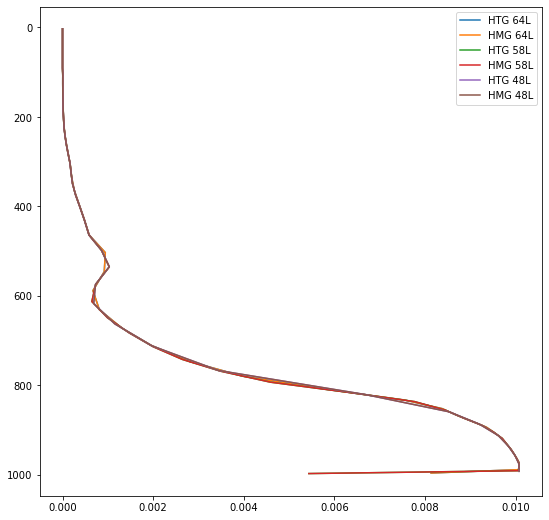

In [105]:
fig,axs = plt.subplots(1,1, figsize=(9,9))

varPlot = 'Q'

axs.plot(HTGcamDS_all64[varPlot].values[0,:,0,0], HTGcamDS_all64.lev.values, label='HTG 64L')
axs.plot(HMGcamDS_all64[varPlot].values[0,:,0,0], HMGcamDS_all64.lev.values, label='HMG 64L')

axs.plot(HTGcamDS_all58[varPlot].values[0,:,0,0], HTGcamDS_all58.lev.values, label='HTG 58L')
axs.plot(HMGcamDS_all58[varPlot].values[0,:,0,0], HMGcamDS_all58.lev.values, label='HMG 58L')

axs.plot(HTGcamDS_all48[varPlot].values[0,:,0,0], HTGcamDS_all48.lev.values, label='HTG 48L')
axs.plot(HMGcamDS_all48[varPlot].values[0,:,0,0], HMGcamDS_all48.lev.values, label='HMG 48L')

axs.legend()
axs.invert_yaxis()



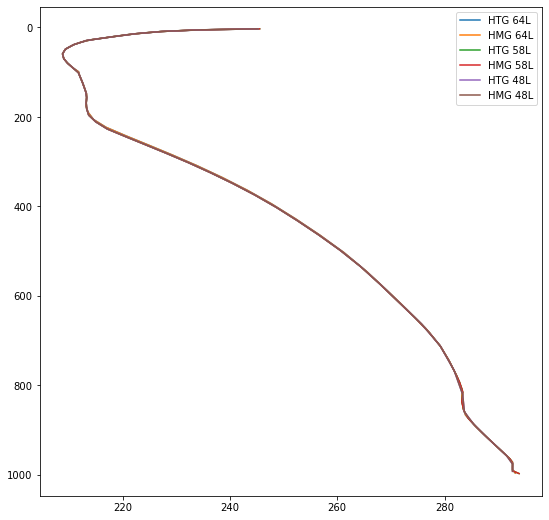

In [106]:
fig,axs = plt.subplots(1,1, figsize=(9,9))

varPlot = 'T'

axs.plot(HTGcamDS_all64[varPlot].values[0,:,0,0], HTGcamDS_all64.lev.values, label='HTG 64L')
axs.plot(HMGcamDS_all64[varPlot].values[0,:,0,0], HMGcamDS_all64.lev.values, label='HMG 64L')

axs.plot(HTGcamDS_all58[varPlot].values[0,:,0,0], HTGcamDS_all58.lev.values, label='HTG 58L')
axs.plot(HMGcamDS_all58[varPlot].values[0,:,0,0], HMGcamDS_all58.lev.values, label='HMG 58L')

axs.plot(HTGcamDS_all48[varPlot].values[0,:,0,0], HTGcamDS_all48.lev.values, label='HTG 48L')
axs.plot(HMGcamDS_all48[varPlot].values[0,:,0,0], HMGcamDS_all48.lev.values, label='HMG 48L')

axs.legend()
axs.invert_yaxis()

**Allow for a spin-up period**

In [90]:
## Discard the first 2 days as spin up... 
iTimeStart   = np.where(HMGcamDS_all64.time.values >= (HMGcamDS_all64.time.values[0] + np.timedelta64(2,'D')))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcamDS_all64.time.values))

HTGcamDS_all64 = HTGcamDS_all64.isel(time=timeArr)
HMGcamDS_all64 = HMGcamDS_all64.isel(time=timeArr)
HTGclmDS_all64 = HTGclmDS_all64.isel(time=timeArr)
HMGclmDS_all64 = HMGclmDS_all64.isel(time=timeArr)

HTGcamDS_all58 = HTGcamDS_all58.isel(time=timeArr)
HMGcamDS_all58 = HMGcamDS_all58.isel(time=timeArr)
HTGclmDS_all58 = HTGclmDS_all58.isel(time=timeArr)
HMGclmDS_all58 = HMGclmDS_all58.isel(time=timeArr)

HTGcamDS_all48 = HTGcamDS_all48.isel(time=timeArr)
HMGcamDS_all48 = HMGcamDS_all48.isel(time=timeArr)
HTGclmDS_all48 = HTGclmDS_all48.isel(time=timeArr)
HMGclmDS_all48 = HMGclmDS_all48.isel(time=timeArr)

HTGcamDS_all32 = HTGcamDS_all32.isel(time=timeArr)
HMGcamDS_all32 = HMGcamDS_all32.isel(time=timeArr)
HTGclmDS_all32 = HTGclmDS_all32.isel(time=timeArr)
HMGclmDS_all32 = HMGclmDS_all32.isel(time=timeArr)


In [91]:
## Add a few parameters from CLM to the CAM DS's
HTGcamDS_all64['ZETA_CLM']  = (HTGclmDS_all64['ZETA'])
HTGcamDS_all64['USTAR_CLM'] = (HTGclmDS_all64['USTAR'])
HTGcamDS_all64['WSTAR_CLM'] = (HTGclmDS_all64['WSTAR'])

HMGcamDS_all64['ZETA_CLM']  = (HMGclmDS_all64['ZETA'])
HMGcamDS_all64['USTAR_CLM'] = (HMGclmDS_all64['USTAR'])
HMGcamDS_all64['WSTAR_CLM'] = (HMGclmDS_all64['WSTAR'])


HTGcamDS_all58['ZETA_CLM']  = (HTGclmDS_all58['ZETA'])
HTGcamDS_all58['USTAR_CLM'] = (HTGclmDS_all58['USTAR'])
HTGcamDS_all58['WSTAR_CLM'] = (HTGclmDS_all58['WSTAR'])

HMGcamDS_all58['ZETA_CLM']  = (HMGclmDS_all58['ZETA'])
HMGcamDS_all58['USTAR_CLM'] = (HMGclmDS_all58['USTAR'])
HMGcamDS_all58['WSTAR_CLM'] = (HMGclmDS_all58['WSTAR'])


HTGcamDS_all48['ZETA_CLM']  = (HTGclmDS_all48['ZETA'])
HTGcamDS_all48['USTAR_CLM'] = (HTGclmDS_all48['USTAR'])
HTGcamDS_all48['WSTAR_CLM'] = (HTGclmDS_all48['WSTAR'])

HMGcamDS_all48['ZETA_CLM']  = (HMGclmDS_all48['ZETA'])
HMGcamDS_all48['USTAR_CLM'] = (HMGclmDS_all48['USTAR'])
HMGcamDS_all48['WSTAR_CLM'] = (HMGclmDS_all48['WSTAR'])


HTGcamDS_all32['ZETA_CLM']  = (HTGclmDS_all32['ZETA'])
HTGcamDS_all32['USTAR_CLM'] = (HTGclmDS_all32['USTAR'])
HTGcamDS_all32['WSTAR_CLM'] = (HTGclmDS_all32['WSTAR'])

HMGcamDS_all32['ZETA_CLM']  = (HMGclmDS_all32['ZETA'])
HMGcamDS_all32['USTAR_CLM'] = (HMGclmDS_all32['USTAR'])
HMGcamDS_all32['WSTAR_CLM'] = (HMGclmDS_all32['WSTAR'])


**Get PBLH as function of max dVar/dz**

In [92]:
## Need to use metPy conda env
import metpy.calc as mpc
from metpy.units import units

In [93]:
def PBLHasMaxDZ(DS, pbl_var): 
    # Convert HMGcamDS_all to height (nabbed from Rich's script)
    p0 = DS['P0'].values[0]
    
    plevm = DS['hyam']*p0 + DS['hybm']*DS['PS'].isel(lat=0,lon=0) # Mid level
    plevm.attrs['units'] = "Pa"

    # Height with standard atmosphere
    zlevm      = plevm
    zlevm_vals = 1000.*np.asarray(mpc.pressure_to_height_std(plevm)) # Units of [m] after multiplied 
    zlevm      = plevm.copy(deep=True)
    zlevm[:,:] = zlevm_vals
    
    pvar        = DS[pbl_var].isel(lat=0,lon=0)
    pvar['lev'] = zlevm[0,:].values
    dvardz      = pvar.differentiate("lev") # Find field gradient wrt HEIGHT!

    dvardz.loc[:,200:]   = 0.  # Restrict to a specificheight region
    dvardz.loc[:,:3000.] = 0

    nT = np.shape(dvardz)[0]
    PBLdepth = np.full([nT], np.nan)

    for iT in range(nT):
        iLevs  = np.where((zlevm[iT,:]>=200) & (zlevm[iT,:]<=3000))[0]
        maxLev = np.where(dvardz[iT,iLevs]==np.nanmax(dvardz[iT,iLevs]))[0]
        PBLdepth[iT] = zlevm[iT,iLevs[maxLev[0]]]
    
    return PBLdepth

In [94]:
PBLdepth_hmg64 = PBLHasMaxDZ(HMGcamDS_all64, 'T')
PBLdepth_htg64 = PBLHasMaxDZ(HTGcamDS_all64, 'T')
print('Done with 64L')

PBLdepth_hmg58 = PBLHasMaxDZ(HMGcamDS_all58, 'T')
PBLdepth_htg58 = PBLHasMaxDZ(HTGcamDS_all58, 'T')
print('Done with 58L')

PBLdepth_hmg48 = PBLHasMaxDZ(HMGcamDS_all48, 'T')
PBLdepth_htg48 = PBLHasMaxDZ(HTGcamDS_all48, 'T')
print('Done with 48L')

PBLdepth_hmg32 = PBLHasMaxDZ(HMGcamDS_all32, 'T')
PBLdepth_htg32 = PBLHasMaxDZ(HTGcamDS_all32, 'T')
print('Done with 32L')



KeyboardInterrupt: 

In [15]:
# Add above to each dataset
HMGcamDS_all64['PBLdepth'] = (('time'), PBLdepth_hmg64)
HTGcamDS_all64['PBLdepth'] = (('time'), PBLdepth_htg64)

HMGcamDS_all58['PBLdepth'] = (('time'), PBLdepth_hmg58)
HTGcamDS_all58['PBLdepth'] = (('time'), PBLdepth_htg58)

HMGcamDS_all48['PBLdepth'] = (('time'), PBLdepth_hmg48)
HTGcamDS_all48['PBLdepth'] = (('time'), PBLdepth_htg48)

HMGcamDS_all32['PBLdepth'] = (('time'), PBLdepth_hmg32)
HTGcamDS_all32['PBLdepth'] = (('time'), PBLdepth_htg32)


## Timeseries plots

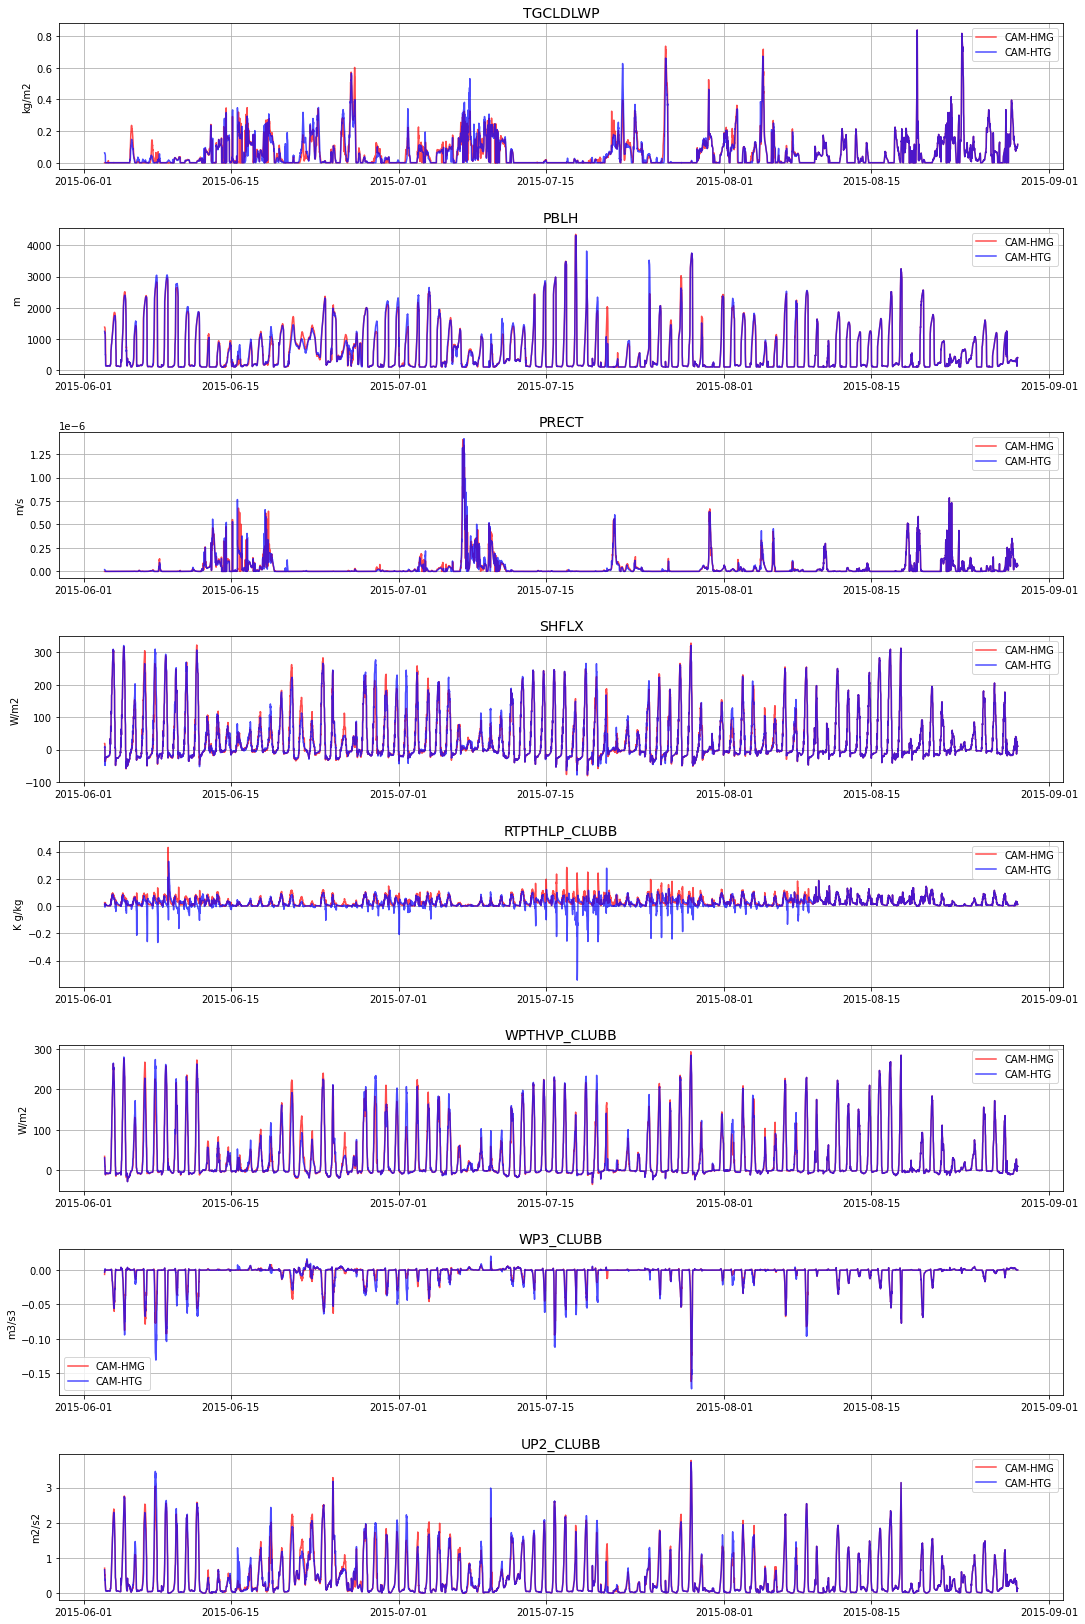

In [8]:
## Merge it all into one giant plot! 
## -----------------------------------------------------

# ATM_varNames   = np.asarray(['PBLH','SHFLX','LHFLX','PRECT'])
ATM_varNames   = np.asarray(['TGCLDLWP','PBLH','PRECT','SHFLX'])

#ATM_varNames3D = np.asarray(['THLP2_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB'])
ATM_varNames3D = np.asarray(['RTPTHLP_CLUBB','WPTHVP_CLUBB','WP3_CLUBB','UP2_CLUBB'])


nPlots = len(ATM_varNames)+len(ATM_varNames3D)
fig,axs = plt.subplots(nPlots,1, figsize=(18,29))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)


for iVar in range(len(ATM_varNames)):
        
    axs[iVar].plot(HMGcamDS_all58['time'].values, np.squeeze(HMGcamDS_all58[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS_all58['time'].values, np.squeeze(HTGcamDS_all58[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS_58[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].grid()


for iVar in range(len(ATM_varNames3D)):
    iPlt = iVar+len(ATM_varNames)
      
    if ATM_varNames3D[iVar]=='WP3_CLUBB':
        axs[iPlt].plot(HMGcamDS_all58['time'].values, np.squeeze(HMGcamDS_all58[ATM_varNames3D[iVar]].values)[:,-2],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iPlt].plot(HTGcamDS_all58['time'].values, np.squeeze(HTGcamDS_all58[ATM_varNames3D[iVar]].values)[:,-2],
                      'b-', alpha=0.7, label='CAM-HTG')        
    else: 
        axs[iPlt].plot(HMGcamDS_all58['time'].values, np.squeeze(HMGcamDS_all58[ATM_varNames3D[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iPlt].plot(HTGcamDS_all58['time'].values, np.squeeze(HTGcamDS_all58[ATM_varNames3D[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iPlt].set_title(ATM_varNames3D[iVar],fontsize=14)
    axs[iPlt].set_ylabel(HMGcamDS_58[ATM_varNames3D[iVar]].units)
    axs[iPlt].legend()
    axs[iPlt].grid()
    

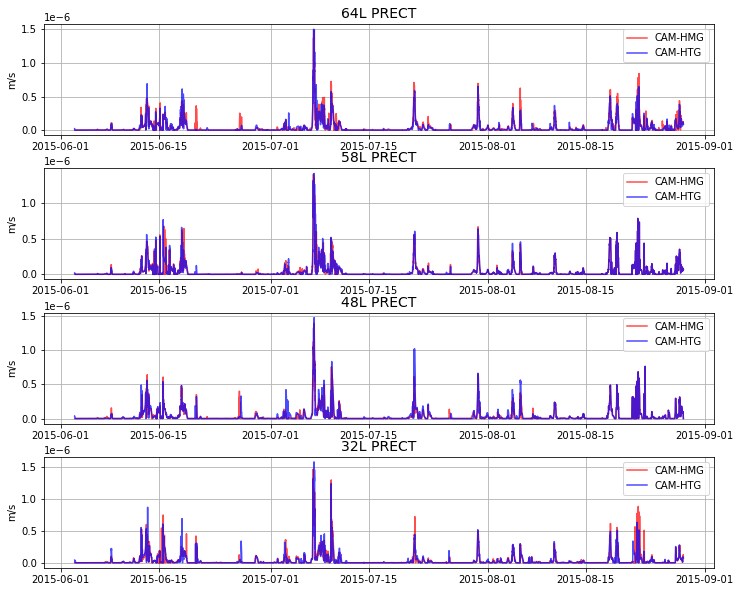

In [104]:
fig,axs = plt.subplots(4,1, figsize=(12,10))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.3)

ATM_varName = 'PRECT'

# Plot 64 levels
axs[0].plot(HMGcamDS_all64['time'].values, np.squeeze(HMGcamDS_all64[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[0].plot(HTGcamDS_all64['time'].values, np.squeeze(HTGcamDS_all64[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[0].set_title('64L '+ATM_varName,fontsize=14)
axs[0].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[0].legend()
axs[0].grid()
    
# Plot 58 levels
axs[1].plot(HMGcamDS_all58['time'].values, np.squeeze(HMGcamDS_all58[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[1].plot(HTGcamDS_all58['time'].values, np.squeeze(HTGcamDS_all58[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[1].set_title('58L '+ATM_varName,fontsize=14)
axs[1].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[1].legend()
axs[1].grid()

# Plot 48 levels
axs[2].plot(HMGcamDS_all48['time'].values, np.squeeze(HMGcamDS_all48[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[2].plot(HTGcamDS_all48['time'].values, np.squeeze(HTGcamDS_all48[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[2].set_title('48L '+ATM_varName,fontsize=14)
axs[2].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[2].legend()
axs[2].grid()


# Plot 48 levels
axs[3].plot(HMGcamDS_all32['time'].values, np.squeeze(HMGcamDS_all32[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[3].plot(HTGcamDS_all32['time'].values, np.squeeze(HTGcamDS_all32[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[3].set_title('32L '+ATM_varName,fontsize=14)
axs[3].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[3].legend()
axs[3].grid()




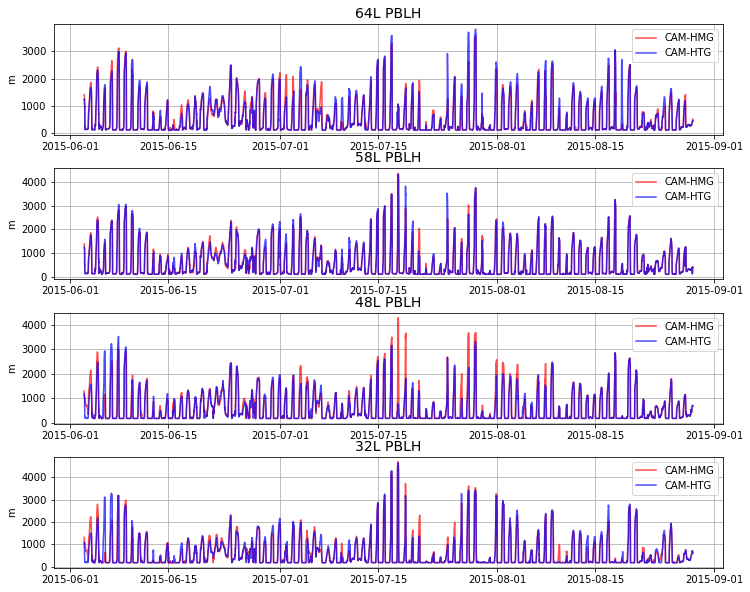

In [105]:
fig,axs = plt.subplots(4,1, figsize=(12,10))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.3)

ATM_varName = 'PBLH'

# Plot 64 levels
axs[0].plot(HMGcamDS_all64['time'].values, np.squeeze(HMGcamDS_all64[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[0].plot(HTGcamDS_all64['time'].values, np.squeeze(HTGcamDS_all64[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[0].set_title('64L '+ATM_varName,fontsize=14)
axs[0].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[0].legend()
axs[0].grid()
    
# Plot 58 levels
axs[1].plot(HMGcamDS_all58['time'].values, np.squeeze(HMGcamDS_all58[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[1].plot(HTGcamDS_all58['time'].values, np.squeeze(HTGcamDS_all58[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[1].set_title('58L '+ATM_varName,fontsize=14)
axs[1].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[1].legend()
axs[1].grid()

# Plot 48 levels
axs[2].plot(HMGcamDS_all48['time'].values, np.squeeze(HMGcamDS_all48[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[2].plot(HTGcamDS_all48['time'].values, np.squeeze(HTGcamDS_all48[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[2].set_title('48L '+ATM_varName,fontsize=14)
axs[2].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[2].legend()
axs[2].grid()

# Plot 32 levels
axs[3].plot(HMGcamDS_all32['time'].values, np.squeeze(HMGcamDS_all32[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[3].plot(HTGcamDS_all32['time'].values, np.squeeze(HTGcamDS_all32[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[3].set_title('32L '+ATM_varName,fontsize=14)
axs[3].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[3].legend()
axs[3].grid()




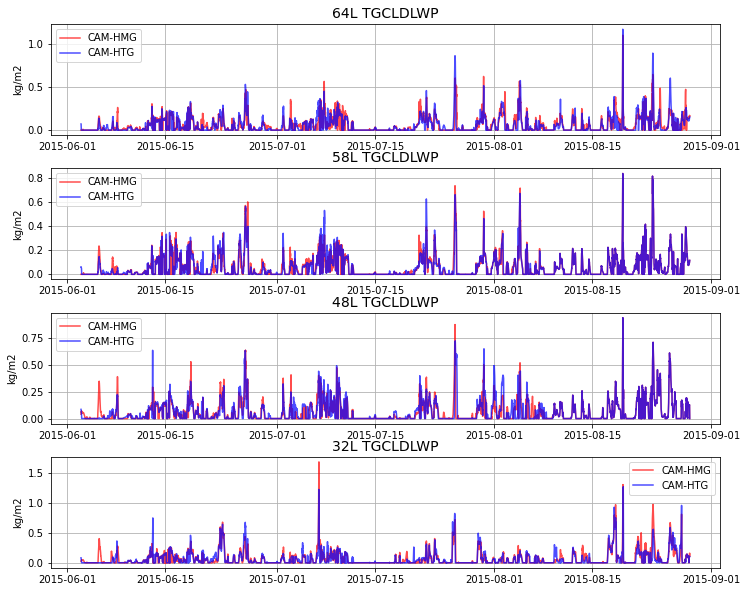

In [106]:
fig,axs = plt.subplots(4,1, figsize=(12,10))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.3)

ATM_varName = 'TGCLDLWP'

# Plot 64 levels
axs[0].plot(HMGcamDS_all64['time'].values, np.squeeze(HMGcamDS_all64[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[0].plot(HTGcamDS_all64['time'].values, np.squeeze(HTGcamDS_all64[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[0].set_title('64L '+ATM_varName,fontsize=14)
axs[0].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[0].legend()
axs[0].grid()
    
# Plot 58 levels
axs[1].plot(HMGcamDS_all58['time'].values, np.squeeze(HMGcamDS_all58[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[1].plot(HTGcamDS_all58['time'].values, np.squeeze(HTGcamDS_all58[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[1].set_title('58L '+ATM_varName,fontsize=14)
axs[1].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[1].legend()
axs[1].grid()

# Plot 48 levels
axs[2].plot(HMGcamDS_all48['time'].values, np.squeeze(HMGcamDS_all48[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[2].plot(HTGcamDS_all48['time'].values, np.squeeze(HTGcamDS_all48[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[2].set_title('48L '+ATM_varName,fontsize=14)
axs[2].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[2].legend()
axs[2].grid()

# Plot 32 levels
axs[3].plot(HMGcamDS_all32['time'].values, np.squeeze(HMGcamDS_all32[ATM_varName].values),
              'r-', alpha=0.7, label='CAM-HMG')
axs[3].plot(HTGcamDS_all32['time'].values, np.squeeze(HTGcamDS_all32[ATM_varName].values),
              'b-', alpha=0.7, label='CAM-HTG')

axs[3].set_title('32L '+ATM_varName,fontsize=14)
axs[3].set_ylabel(HMGcamDS_64[ATM_varName].units)
axs[3].legend()
axs[3].grid()



## Mean diurnal cycle

In [16]:
# Get means a function of hour of day
hourlyMean_HMG_64 = HMGcamDS_all64.groupby("time.hour").mean()
hourlyMean_HTG_64 = HTGcamDS_all64.groupby("time.hour").mean()

hourlyMean_HMG_58 = HMGcamDS_all58.groupby("time.hour").mean()
hourlyMean_HTG_58 = HTGcamDS_all58.groupby("time.hour").mean()

hourlyMean_HMG_48 = HMGcamDS_all48.groupby("time.hour").mean()
hourlyMean_HTG_48 = HTGcamDS_all48.groupby("time.hour").mean()

hourlyMean_HMG_32 = HMGcamDS_all32.groupby("time.hour").mean()
hourlyMean_HTG_32 = HTGcamDS_all32.groupby("time.hour").mean()


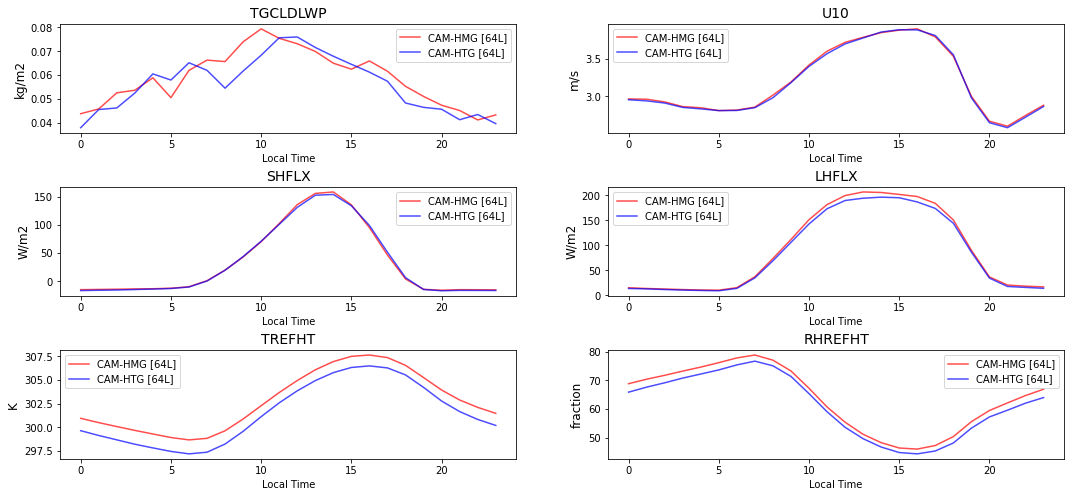

In [33]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

# ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','U10'])
ATM_varNames = np.asarray(['TGCLDLWP','U10','SHFLX','LHFLX','TREFHT','RHREFHT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    # Make it show in local time 
    doubleVar_HMG_64 = np.concatenate([np.squeeze(hourlyMean_HMG_64[ATM_varNames[iVar]].values)[:],np.squeeze(hourlyMean_HMG_64[ATM_varNames[iVar]].values)[:]])
    doubleVar_HTG_64 = np.concatenate([np.squeeze(hourlyMean_HTG_64[ATM_varNames[iVar]].values)[:],np.squeeze(hourlyMean_HTG_64[ATM_varNames[iVar]].values)[:]])
    doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])
       
    axs[iVar].plot(doubleHour[5:29], doubleVar_HMG_64[5:29],
                  'r-', alpha=0.7, label='CAM-HMG [64L]')
    axs[iVar].plot(doubleHour[5:29], doubleVar_HTG_64[5:29],
                  'b-', alpha=0.7, label='CAM-HTG [64L]')
    
#     axs[iVar].plot(hourlyMean_HMG['hour'].values, np.squeeze(hourlyMean_HMG[ATM_varNames[iVar]].values),
#                   'r-', alpha=0.7, label='CAM-HMG')
#     axs[iVar].plot(hourlyMean_HTG['hour'].values, np.squeeze(hourlyMean_HTG[ATM_varNames[iVar]].values),
#                   'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].legend()
    axs[iVar].set_xlabel('Local Time')
    
    if ATM_varNames[iVar]!='TBOT':
        axs[iVar].set_ylabel(HMGcamDS_64[ATM_varNames[iVar]].units, fontsize=12)
    else:
        axs[iVar].set_ylabel(HMGcamDS_64['T'].units, fontsize=12)
        

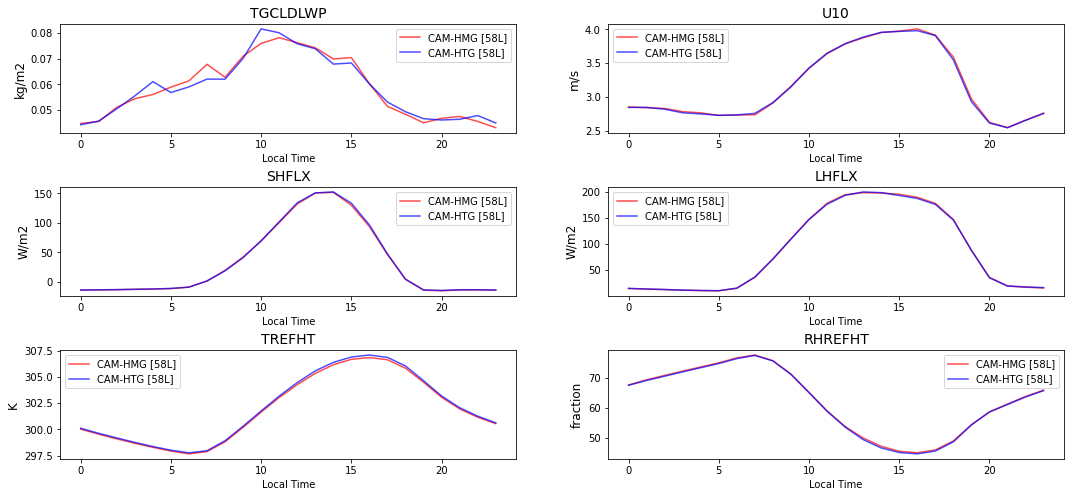

In [34]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.5)

# ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','U10'])
ATM_varNames = np.asarray(['TGCLDLWP','U10','SHFLX','LHFLX','TREFHT','RHREFHT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    # Make it show in local time 
    doubleVar_HMG_58 = np.concatenate([np.squeeze(hourlyMean_HMG_58[ATM_varNames[iVar]].values)[:],np.squeeze(hourlyMean_HMG_58[ATM_varNames[iVar]].values)[:]])
    doubleVar_HTG_58 = np.concatenate([np.squeeze(hourlyMean_HTG_58[ATM_varNames[iVar]].values)[:],np.squeeze(hourlyMean_HTG_58[ATM_varNames[iVar]].values)[:]])
    doubleHour    = np.concatenate([hourlyMean_HMG_58['hour'].values-5,hourlyMean_HMG_58['hour'].values-5+24])
       
    axs[iVar].plot(doubleHour[5:29], doubleVar_HMG_58[5:29],
                  'r-', alpha=0.7, label='CAM-HMG [58L]')
    axs[iVar].plot(doubleHour[5:29], doubleVar_HTG_58[5:29],
                  'b-', alpha=0.7, label='CAM-HTG [58L]')
    
#     axs[iVar].plot(hourlyMean_HMG['hour'].values, np.squeeze(hourlyMean_HMG[ATM_varNames[iVar]].values),
#                   'r-', alpha=0.7, label='CAM-HMG')
#     axs[iVar].plot(hourlyMean_HTG['hour'].values, np.squeeze(hourlyMean_HTG[ATM_varNames[iVar]].values),
#                   'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].legend()
    axs[iVar].set_xlabel('Local Time')
    
    if ATM_varNames[iVar]!='TBOT':
        axs[iVar].set_ylabel(HMGcamDS_64[ATM_varNames[iVar]].units, fontsize=12)
    else:
        axs[iVar].set_ylabel(HMGcamDS_64['T'].units, fontsize=12)
        

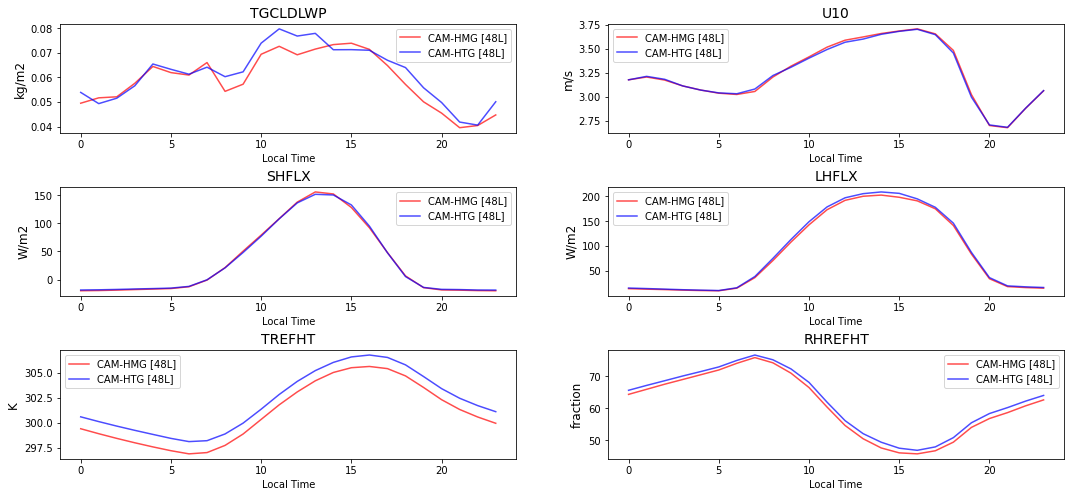

In [35]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.5)

# ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','U10'])
ATM_varNames = np.asarray(['TGCLDLWP','U10','SHFLX','LHFLX','TREFHT','RHREFHT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    # Make it show in local time 
    doubleVar_HMG_48 = np.concatenate([np.squeeze(hourlyMean_HMG_48[ATM_varNames[iVar]].values)[:],np.squeeze(hourlyMean_HMG_48[ATM_varNames[iVar]].values)[:]])
    doubleVar_HTG_48 = np.concatenate([np.squeeze(hourlyMean_HTG_48[ATM_varNames[iVar]].values)[:],np.squeeze(hourlyMean_HTG_48[ATM_varNames[iVar]].values)[:]])
    doubleHour    = np.concatenate([hourlyMean_HMG_48['hour'].values-5,hourlyMean_HMG_58['hour'].values-5+24])
       
    axs[iVar].plot(doubleHour[5:29], doubleVar_HMG_48[5:29],
                  'r-', alpha=0.7, label='CAM-HMG [48L]')
    axs[iVar].plot(doubleHour[5:29], doubleVar_HTG_48[5:29],
                  'b-', alpha=0.7, label='CAM-HTG [48L]')
    
#     axs[iVar].plot(hourlyMean_HMG['hour'].values, np.squeeze(hourlyMean_HMG[ATM_varNames[iVar]].values),
#                   'r-', alpha=0.7, label='CAM-HMG')
#     axs[iVar].plot(hourlyMean_HTG['hour'].values, np.squeeze(hourlyMean_HTG[ATM_varNames[iVar]].values),
#                   'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].legend()
    axs[iVar].set_xlabel('Local Time')
    
    if ATM_varNames[iVar]!='TBOT':
        axs[iVar].set_ylabel(HMGcamDS_64[ATM_varNames[iVar]].units, fontsize=12)
    else:
        axs[iVar].set_ylabel(HMGcamDS_64['T'].units, fontsize=12)
        

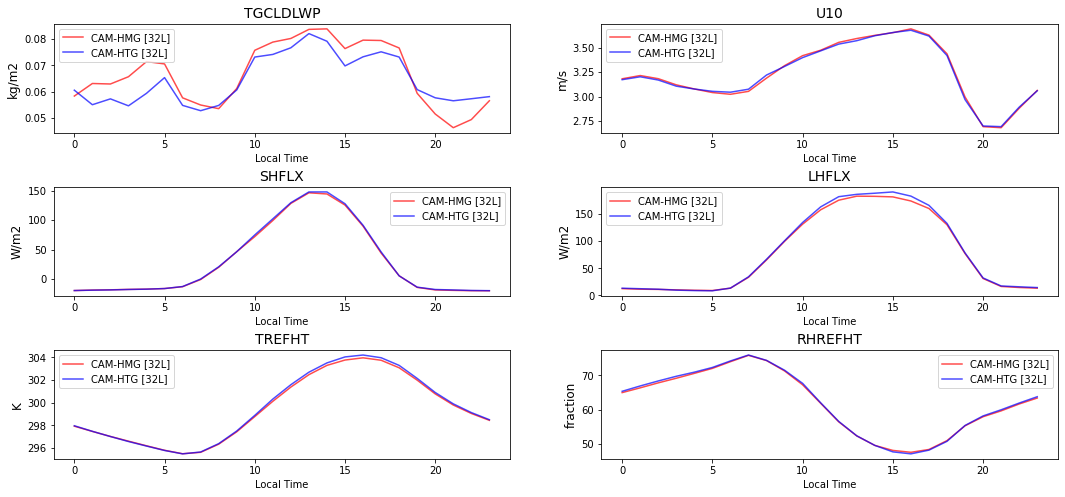

In [36]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.5)

# ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','U10'])
ATM_varNames = np.asarray(['TGCLDLWP','U10','SHFLX','LHFLX','TREFHT','RHREFHT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    # Make it show in local time 
    doubleVar_HMG_32 = np.concatenate([np.squeeze(hourlyMean_HMG_32[ATM_varNames[iVar]].values)[:],np.squeeze(hourlyMean_HMG_32[ATM_varNames[iVar]].values)[:]])
    doubleVar_HTG_32 = np.concatenate([np.squeeze(hourlyMean_HTG_32[ATM_varNames[iVar]].values)[:],np.squeeze(hourlyMean_HTG_32[ATM_varNames[iVar]].values)[:]])
    doubleHour    = np.concatenate([hourlyMean_HMG_32['hour'].values-5,hourlyMean_HMG_32['hour'].values-5+24])
       
    axs[iVar].plot(doubleHour[5:29], doubleVar_HMG_32[5:29],
                  'r-', alpha=0.7, label='CAM-HMG [32L]')
    axs[iVar].plot(doubleHour[5:29], doubleVar_HTG_32[5:29],
                  'b-', alpha=0.7, label='CAM-HTG [32L]')
    
#     axs[iVar].plot(hourlyMean_HMG['hour'].values, np.squeeze(hourlyMean_HMG[ATM_varNames[iVar]].values),
#                   'r-', alpha=0.7, label='CAM-HMG')
#     axs[iVar].plot(hourlyMean_HTG['hour'].values, np.squeeze(hourlyMean_HTG[ATM_varNames[iVar]].values),
#                   'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].legend()
    axs[iVar].set_xlabel('Local Time')
    
    if ATM_varNames[iVar]!='TBOT':
        axs[iVar].set_ylabel(HMGcamDS_64[ATM_varNames[iVar]].units, fontsize=12)
    else:
        axs[iVar].set_ylabel(HMGcamDS_64['T'].units, fontsize=12)
        

Text(0.5, 0, 'Local Hour')

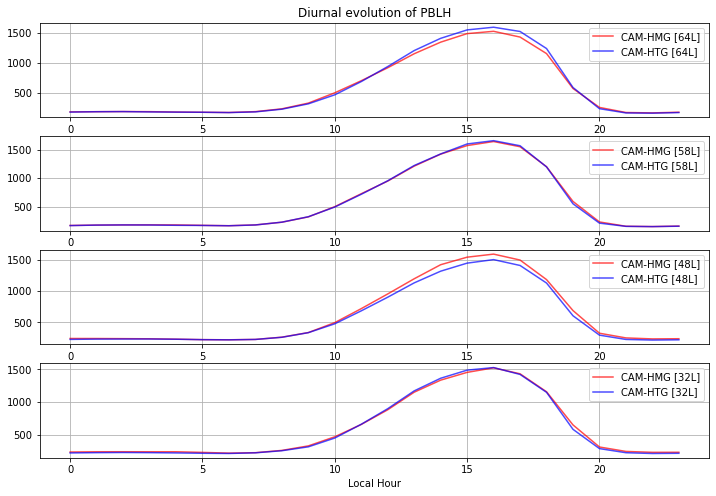

In [110]:
fig,axs = plt.subplots(4,1, figsize=(12,8))
axs = axs.ravel()

# Plot 64 levels
doubleVar_HMG_64 = np.concatenate([np.squeeze(hourlyMean_HMG_64['PBLH'].values)[:],np.squeeze(hourlyMean_HMG_64['PBLH'].values)[:]])
doubleVar_HTG_64 = np.concatenate([np.squeeze(hourlyMean_HTG_64['PBLH'].values)[:],np.squeeze(hourlyMean_HTG_64['PBLH'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[0].plot(doubleHour[5:29], doubleVar_HMG_64[5:29],
              'r-', alpha=0.7, label='CAM-HMG [64L]')
axs[0].plot(doubleHour[5:29], doubleVar_HTG_64[5:29],
              'b-', alpha=0.7, label='CAM-HTG [64L]')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Diurnal evolution of PBLH')

# Plot 58 levels
doubleVar_HMG_58 = np.concatenate([np.squeeze(hourlyMean_HMG_58['PBLH'].values)[:],np.squeeze(hourlyMean_HMG_58['PBLH'].values)[:]])
doubleVar_HTG_58 = np.concatenate([np.squeeze(hourlyMean_HTG_58['PBLH'].values)[:],np.squeeze(hourlyMean_HTG_58['PBLH'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[1].plot(doubleHour[5:29], doubleVar_HMG_58[5:29],
              'r-', alpha=0.7, label='CAM-HMG [58L]')
axs[1].plot(doubleHour[5:29], doubleVar_HTG_58[5:29],
              'b-', alpha=0.7, label='CAM-HTG [58L]')
axs[1].legend()
axs[1].grid()


# Plot 48 levels
doubleVar_HMG_48 = np.concatenate([np.squeeze(hourlyMean_HMG_48['PBLH'].values)[:],np.squeeze(hourlyMean_HMG_48['PBLH'].values)[:]])
doubleVar_HTG_48 = np.concatenate([np.squeeze(hourlyMean_HTG_48['PBLH'].values)[:],np.squeeze(hourlyMean_HTG_48['PBLH'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[2].plot(doubleHour[5:29], doubleVar_HMG_48[5:29],
              'r-', alpha=0.7, label='CAM-HMG [48L]')
axs[2].plot(doubleHour[5:29], doubleVar_HTG_48[5:29],
              'b-', alpha=0.7, label='CAM-HTG [48L]')
axs[2].legend()
axs[2].grid()
axs[2].set_xlabel('Local Hour')


# Plot 32 levels
doubleVar_HMG_32 = np.concatenate([np.squeeze(hourlyMean_HMG_32['PBLH'].values)[:],np.squeeze(hourlyMean_HMG_32['PBLH'].values)[:]])
doubleVar_HTG_32 = np.concatenate([np.squeeze(hourlyMean_HTG_32['PBLH'].values)[:],np.squeeze(hourlyMean_HTG_32['PBLH'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_32['hour'].values-5,hourlyMean_HMG_32['hour'].values-5+24])

axs[3].plot(doubleHour[5:29], doubleVar_HMG_32[5:29],
              'r-', alpha=0.7, label='CAM-HMG [32L]')
axs[3].plot(doubleHour[5:29], doubleVar_HTG_32[5:29],
              'b-', alpha=0.7, label='CAM-HTG [32L]')
axs[3].legend()
axs[3].grid()
axs[3].set_xlabel('Local Hour')


Text(0.5, 0, 'Local Hour')

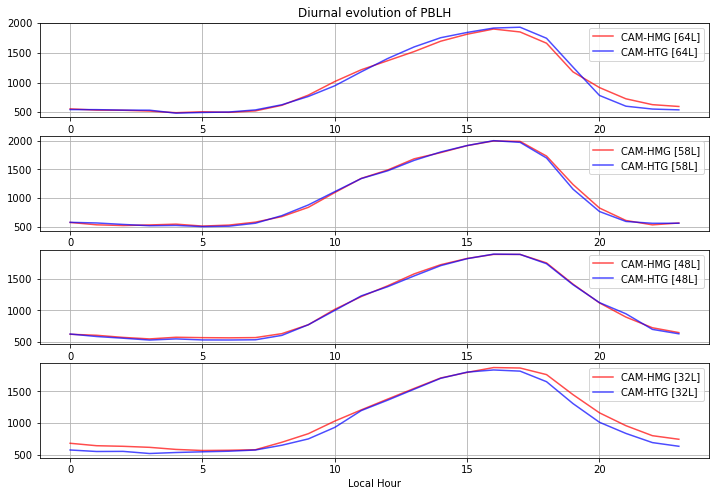

In [17]:
fig,axs = plt.subplots(4,1, figsize=(12,8))
axs = axs.ravel()

# Plot 64 levels
doubleVar_HMG_64 = np.concatenate([np.squeeze(hourlyMean_HMG_64['PBLdepth'].values)[:],np.squeeze(hourlyMean_HMG_64['PBLdepth'].values)[:]])
doubleVar_HTG_64 = np.concatenate([np.squeeze(hourlyMean_HTG_64['PBLdepth'].values)[:],np.squeeze(hourlyMean_HTG_64['PBLdepth'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[0].plot(doubleHour[5:29], doubleVar_HMG_64[5:29],
              'r-', alpha=0.7, label='CAM-HMG [64L]')
axs[0].plot(doubleHour[5:29], doubleVar_HTG_64[5:29],
              'b-', alpha=0.7, label='CAM-HTG [64L]')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Diurnal evolution of PBLH')

# Plot 58 levels
doubleVar_HMG_58 = np.concatenate([np.squeeze(hourlyMean_HMG_58['PBLdepth'].values)[:],np.squeeze(hourlyMean_HMG_58['PBLdepth'].values)[:]])
doubleVar_HTG_58 = np.concatenate([np.squeeze(hourlyMean_HTG_58['PBLdepth'].values)[:],np.squeeze(hourlyMean_HTG_58['PBLdepth'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[1].plot(doubleHour[5:29], doubleVar_HMG_58[5:29],
              'r-', alpha=0.7, label='CAM-HMG [58L]')
axs[1].plot(doubleHour[5:29], doubleVar_HTG_58[5:29],
              'b-', alpha=0.7, label='CAM-HTG [58L]')
axs[1].legend()
axs[1].grid()


# Plot 48 levels
doubleVar_HMG_48 = np.concatenate([np.squeeze(hourlyMean_HMG_48['PBLdepth'].values)[:],np.squeeze(hourlyMean_HMG_48['PBLdepth'].values)[:]])
doubleVar_HTG_48 = np.concatenate([np.squeeze(hourlyMean_HTG_48['PBLdepth'].values)[:],np.squeeze(hourlyMean_HTG_48['PBLdepth'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[2].plot(doubleHour[5:29], doubleVar_HMG_48[5:29],
              'r-', alpha=0.7, label='CAM-HMG [48L]')
axs[2].plot(doubleHour[5:29], doubleVar_HTG_48[5:29],
              'b-', alpha=0.7, label='CAM-HTG [48L]')
axs[2].legend()
axs[2].grid()
axs[2].set_xlabel('Local Hour')


# Plot 32 levels
doubleVar_HMG_32 = np.concatenate([np.squeeze(hourlyMean_HMG_32['PBLdepth'].values)[:],np.squeeze(hourlyMean_HMG_32['PBLdepth'].values)[:]])
doubleVar_HTG_32 = np.concatenate([np.squeeze(hourlyMean_HTG_32['PBLdepth'].values)[:],np.squeeze(hourlyMean_HTG_32['PBLdepth'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_32['hour'].values-5,hourlyMean_HMG_32['hour'].values-5+24])

axs[3].plot(doubleHour[5:29], doubleVar_HMG_32[5:29],
              'r-', alpha=0.7, label='CAM-HMG [32L]')
axs[3].plot(doubleHour[5:29], doubleVar_HTG_32[5:29],
              'b-', alpha=0.7, label='CAM-HTG [32L]')
axs[3].legend()
axs[3].grid()
axs[3].set_xlabel('Local Hour')



Text(0.5, 0, 'Local Hour')

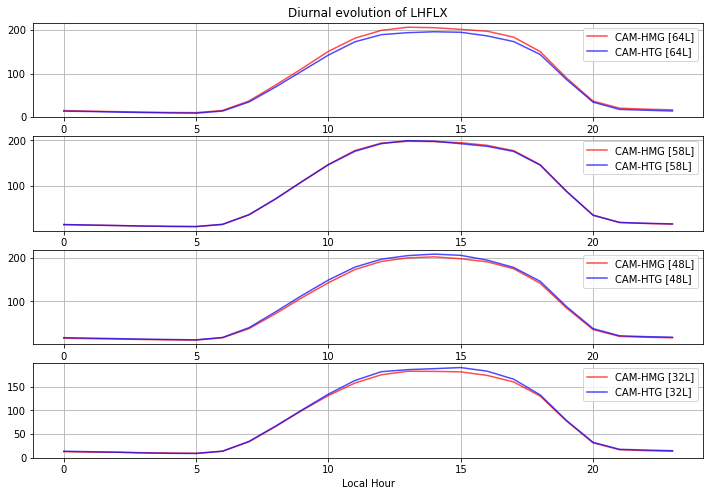

In [112]:
fig,axs = plt.subplots(4,1, figsize=(12,8))
axs = axs.ravel()

# Plot 64 levels
doubleVar_HMG_64 = np.concatenate([np.squeeze(hourlyMean_HMG_64['LHFLX'].values)[:],np.squeeze(hourlyMean_HMG_64['LHFLX'].values)[:]])
doubleVar_HTG_64 = np.concatenate([np.squeeze(hourlyMean_HTG_64['LHFLX'].values)[:],np.squeeze(hourlyMean_HTG_64['LHFLX'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[0].plot(doubleHour[5:29], doubleVar_HMG_64[5:29],
              'r-', alpha=0.7, label='CAM-HMG [64L]')
axs[0].plot(doubleHour[5:29], doubleVar_HTG_64[5:29],
              'b-', alpha=0.7, label='CAM-HTG [64L]')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Diurnal evolution of LHFLX')

# Plot 58 levels
doubleVar_HMG_58 = np.concatenate([np.squeeze(hourlyMean_HMG_58['LHFLX'].values)[:],np.squeeze(hourlyMean_HMG_58['LHFLX'].values)[:]])
doubleVar_HTG_58 = np.concatenate([np.squeeze(hourlyMean_HTG_58['LHFLX'].values)[:],np.squeeze(hourlyMean_HTG_58['LHFLX'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[1].plot(doubleHour[5:29], doubleVar_HMG_58[5:29],
              'r-', alpha=0.7, label='CAM-HMG [58L]')
axs[1].plot(doubleHour[5:29], doubleVar_HTG_58[5:29],
              'b-', alpha=0.7, label='CAM-HTG [58L]')
axs[1].legend()
axs[1].grid()


# Plot 48 levels
doubleVar_HMG_48 = np.concatenate([np.squeeze(hourlyMean_HMG_48['LHFLX'].values)[:],np.squeeze(hourlyMean_HMG_48['LHFLX'].values)[:]])
doubleVar_HTG_48 = np.concatenate([np.squeeze(hourlyMean_HTG_48['LHFLX'].values)[:],np.squeeze(hourlyMean_HTG_48['LHFLX'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[2].plot(doubleHour[5:29], doubleVar_HMG_48[5:29],
              'r-', alpha=0.7, label='CAM-HMG [48L]')
axs[2].plot(doubleHour[5:29], doubleVar_HTG_48[5:29],
              'b-', alpha=0.7, label='CAM-HTG [48L]')
axs[2].legend()
axs[2].grid()
axs[2].set_xlabel('Local Hour')


# Plot 32 levels
doubleVar_HMG_32 = np.concatenate([np.squeeze(hourlyMean_HMG_32['LHFLX'].values)[:],np.squeeze(hourlyMean_HMG_32['LHFLX'].values)[:]])
doubleVar_HTG_32 = np.concatenate([np.squeeze(hourlyMean_HTG_32['LHFLX'].values)[:],np.squeeze(hourlyMean_HTG_32['LHFLX'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_32['hour'].values-5,hourlyMean_HMG_32['hour'].values-5+24])

axs[3].plot(doubleHour[5:29], doubleVar_HMG_32[5:29],
              'r-', alpha=0.7, label='CAM-HMG [32L]')
axs[3].plot(doubleHour[5:29], doubleVar_HTG_32[5:29],
              'b-', alpha=0.7, label='CAM-HTG [32L]')
axs[3].legend()
axs[3].grid()
axs[3].set_xlabel('Local Hour')


Text(0.5, 0, 'Local Hour')

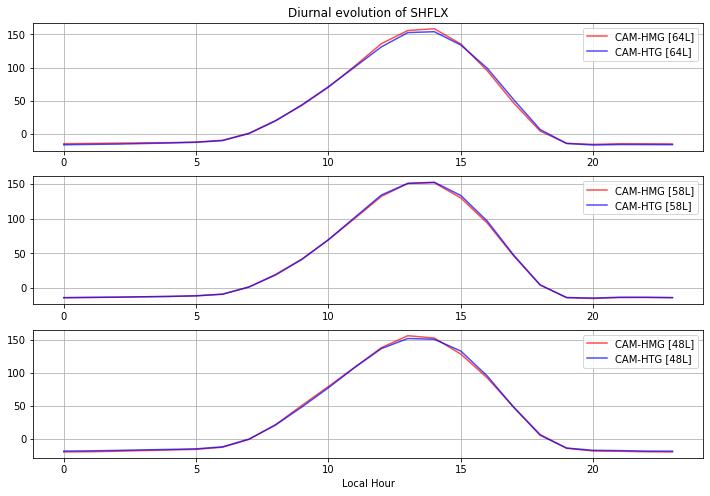

In [26]:
fig,axs = plt.subplots(3,1, figsize=(12,8))
axs = axs.ravel()

# Plot 64 levels
doubleVar_HMG_64 = np.concatenate([np.squeeze(hourlyMean_HMG_64['SHFLX'].values)[:],np.squeeze(hourlyMean_HMG_64['SHFLX'].values)[:]])
doubleVar_HTG_64 = np.concatenate([np.squeeze(hourlyMean_HTG_64['SHFLX'].values)[:],np.squeeze(hourlyMean_HTG_64['SHFLX'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[0].plot(doubleHour[5:29], doubleVar_HMG_64[5:29],
              'r-', alpha=0.7, label='CAM-HMG [64L]')
axs[0].plot(doubleHour[5:29], doubleVar_HTG_64[5:29],
              'b-', alpha=0.7, label='CAM-HTG [64L]')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Diurnal evolution of SHFLX')

# Plot 58 levels
doubleVar_HMG_58 = np.concatenate([np.squeeze(hourlyMean_HMG_58['SHFLX'].values)[:],np.squeeze(hourlyMean_HMG_58['SHFLX'].values)[:]])
doubleVar_HTG_58 = np.concatenate([np.squeeze(hourlyMean_HTG_58['SHFLX'].values)[:],np.squeeze(hourlyMean_HTG_58['SHFLX'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[1].plot(doubleHour[5:29], doubleVar_HMG_58[5:29],
              'r-', alpha=0.7, label='CAM-HMG [58L]')
axs[1].plot(doubleHour[5:29], doubleVar_HTG_58[5:29],
              'b-', alpha=0.7, label='CAM-HTG [58L]')
axs[1].legend()
axs[1].grid()


# Plot 48 levels
doubleVar_HMG_48 = np.concatenate([np.squeeze(hourlyMean_HMG_48['SHFLX'].values)[:],np.squeeze(hourlyMean_HMG_48['SHFLX'].values)[:]])
doubleVar_HTG_48 = np.concatenate([np.squeeze(hourlyMean_HTG_48['SHFLX'].values)[:],np.squeeze(hourlyMean_HTG_48['SHFLX'].values)[:]])
doubleHour    = np.concatenate([hourlyMean_HMG_64['hour'].values-5,hourlyMean_HMG_64['hour'].values-5+24])

axs[2].plot(doubleHour[5:29], doubleVar_HMG_48[5:29],
              'r-', alpha=0.7, label='CAM-HMG [48L]')
axs[2].plot(doubleHour[5:29], doubleVar_HTG_48[5:29],
              'b-', alpha=0.7, label='CAM-HTG [48L]')
axs[2].legend()
axs[2].grid()
axs[2].set_xlabel('Local Hour')




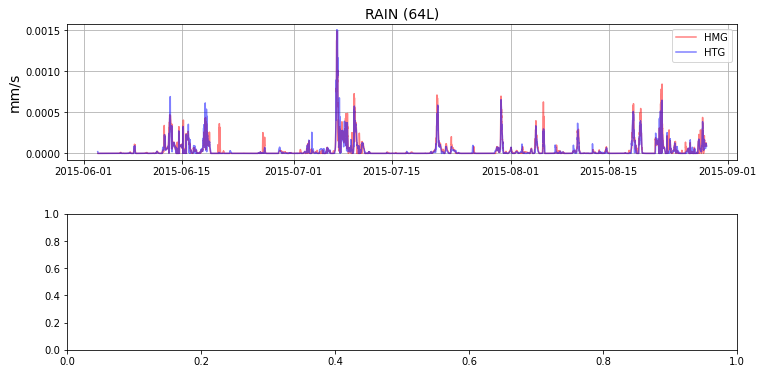

In [98]:
fig,axs = plt.subplots(2,1, figsize=(12,6))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

axs[0].plot(HMGclmDS_all64['time'].values, np.squeeze(HMGclmDS_all64.RAIN.values), 'r-', alpha=0.5, label='HMG')
axs[0].plot(HTGclmDS_all64['time'].values, np.squeeze(HTGclmDS_all64.RAIN.values), 'b-', alpha=0.5, label='HTG')
axs[0].legend()
axs[0].set_ylabel(HTGclmDS_all64.RAIN.units,fontsize=14)
axs[0].set_title('RAIN (64L)',fontsize=14)
# axs[0].set_ylim([15,45])
axs[0].grid()



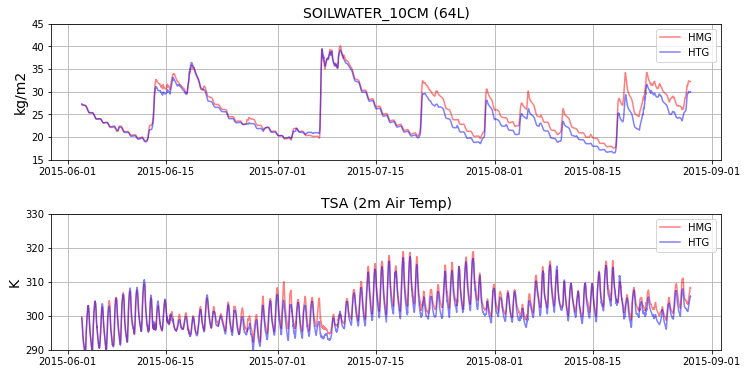

In [95]:
fig,axs = plt.subplots(2,1, figsize=(12,6))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

axs[0].plot(HMGclmDS_all64['time'].values, np.squeeze(HMGclmDS_all64.SOILWATER_10CM.values), 'r-', alpha=0.5, label='HMG')
axs[0].plot(HTGclmDS_all64['time'].values, np.squeeze(HTGclmDS_all64.SOILWATER_10CM.values), 'b-', alpha=0.5, label='HTG')
axs[0].legend()
axs[0].set_ylabel(HTGclmDS_all64.SOILWATER_10CM.units,fontsize=14)
axs[0].set_title('SOILWATER_10CM (64L)',fontsize=14)
axs[0].set_ylim([15,45])
axs[0].grid()

axs[1].plot(HMGclmDS_all64['time'].values, np.squeeze(HMGclmDS_all64.TSA.values), 'r-', alpha=0.5, label='HMG')
axs[1].plot(HTGclmDS_all64['time'].values, np.squeeze(HTGclmDS_all64.TSA.values), 'b-', alpha=0.5, label='HTG')
axs[1].legend()
axs[1].set_ylabel(HTGclmDS_all64.TSA.units,fontsize=14)
axs[1].set_title('TSA (2m Air Temp)',fontsize=14)
axs[1].set_ylim([290,330])
axs[1].grid()



## Look at days where PBL deeper in HTG vs. HMG
* Include other criteria for separating days. For example, Nate's found that LWP is a better descriminator than PBLH in the LES simulations. 

In [18]:
## Convert to local times...
HMGcamDS_all64_local = HMGcamDS_all64.copy(deep=True)
HTGcamDS_all64_local = HTGcamDS_all64.copy(deep=True)

HMGcamDS_all58_local = HMGcamDS_all58.copy(deep=True)
HTGcamDS_all58_local = HTGcamDS_all58.copy(deep=True)

HMGcamDS_all48_local = HMGcamDS_all48.copy(deep=True)
HTGcamDS_all48_local = HTGcamDS_all48.copy(deep=True)

HMGcamDS_all32_local = HMGcamDS_all32.copy(deep=True)
HTGcamDS_all32_local = HTGcamDS_all32.copy(deep=True)


# Confirmed that all the times are identical, so using the same local time arrays
localTimes = HMGcamDS_all64['time'].values - np.timedelta64(5,'h')

# Replace time dimension with local time
HMGcamDS_all64_local = HMGcamDS_all64_local.assign_coords({"time": localTimes})
HTGcamDS_all64_local = HTGcamDS_all64_local.assign_coords({"time": localTimes})

HMGcamDS_all58_local = HMGcamDS_all58_local.assign_coords({"time": localTimes})
HTGcamDS_all58_local = HTGcamDS_all58_local.assign_coords({"time": localTimes})

HMGcamDS_all48_local = HMGcamDS_all48_local.assign_coords({"time": localTimes})
HTGcamDS_all48_local = HTGcamDS_all48_local.assign_coords({"time": localTimes})

HMGcamDS_all32_local = HMGcamDS_all32_local.assign_coords({"time": localTimes})
HTGcamDS_all32_local = HTGcamDS_all32_local.assign_coords({"time": localTimes})

print('First four times in UTC:\n', HMGcamDS_all64.time.values[0:5])
print('Now in local time (CDT):\n', HMGcamDS_all64_local.time.values[0:5])


First four times in UTC:
 ['2015-06-02T23:39:45.000000000' '2015-06-02T23:59:45.000000000'
 '2015-06-03T00:19:45.000000000' '2015-06-03T00:39:45.000000000'
 '2015-06-03T00:59:45.000000000']
Now in local time (CDT):
 ['2015-06-02T18:39:45.000000000' '2015-06-02T18:59:45.000000000'
 '2015-06-02T19:19:45.000000000' '2015-06-02T19:39:45.000000000'
 '2015-06-02T19:59:45.000000000']


In [19]:
## Define difference in daily max PBLH: 

# First, get daily max values 
# 64 levels
month_day_idx                      = pd.MultiIndex.from_arrays([HMGcamDS_all64_local['time.month'].values, 
                                                                HMGcamDS_all64_local['time.day'].values])
HMGcamDS_all64_local.coords['month_day'] = ('time', month_day_idx)
HMGcamDS_all64_localDailyMax = HMGcamDS_all64_local.groupby('month_day').max()

month_day_idx                      = pd.MultiIndex.from_arrays([HTGcamDS_all64_local['time.month'].values, 
                                                                HTGcamDS_all64_local['time.day'].values])
HTGcamDS_all64_local.coords['month_day'] = ('time', month_day_idx)
HTGcamDS_all64_localDailyMax = HTGcamDS_all64_local.groupby('month_day').max()


# 58 levels 
month_day_idx                      = pd.MultiIndex.from_arrays([HMGcamDS_all58_local['time.month'].values, 
                                                                HMGcamDS_all58_local['time.day'].values])
HMGcamDS_all58_local.coords['month_day'] = ('time', month_day_idx)
HMGcamDS_all58_localDailyMax = HMGcamDS_all58_local.groupby('month_day').max()

month_day_idx                      = pd.MultiIndex.from_arrays([HTGcamDS_all58_local['time.month'].values, 
                                                                HTGcamDS_all58_local['time.day'].values])
HTGcamDS_all58_local.coords['month_day'] = ('time', month_day_idx)
HTGcamDS_all58_localDailyMax = HTGcamDS_all58_local.groupby('month_day').max()


# 48 levels 
month_day_idx                      = pd.MultiIndex.from_arrays([HMGcamDS_all48_local['time.month'].values, 
                                                                HMGcamDS_all48_local['time.day'].values])
HMGcamDS_all48_local.coords['month_day'] = ('time', month_day_idx)
HMGcamDS_all48_localDailyMax = HMGcamDS_all48_local.groupby('month_day').max()

month_day_idx                      = pd.MultiIndex.from_arrays([HTGcamDS_all48_local['time.month'].values, 
                                                                HTGcamDS_all48_local['time.day'].values])
HTGcamDS_all48_local.coords['month_day'] = ('time', month_day_idx)
HTGcamDS_all48_localDailyMax = HTGcamDS_all48_local.groupby('month_day').max()


# 32 levels 
month_day_idx                      = pd.MultiIndex.from_arrays([HMGcamDS_all32_local['time.month'].values, 
                                                                HMGcamDS_all32_local['time.day'].values])
HMGcamDS_all32_local.coords['month_day'] = ('time', month_day_idx)
HMGcamDS_all32_localDailyMax = HMGcamDS_all32_local.groupby('month_day').max()

month_day_idx                      = pd.MultiIndex.from_arrays([HTGcamDS_all32_local['time.month'].values, 
                                                                HTGcamDS_all32_local['time.day'].values])
HTGcamDS_all32_local.coords['month_day'] = ('time', month_day_idx)
HTGcamDS_all32_localDailyMax = HTGcamDS_all32_local.groupby('month_day').max()



In [11]:
# Now get the difference in peak PBLH (HTG - HMG)
diffMaxPBLH_64lev = HTGcamDS_all64_localDailyMax.PBLH.values - HMGcamDS_all64_localDailyMax.PBLH.values
diffMaxPBLH_58lev = HTGcamDS_all58_localDailyMax.PBLH.values - HMGcamDS_all58_localDailyMax.PBLH.values
diffMaxPBLH_48lev = HTGcamDS_all48_localDailyMax.PBLH.values - HMGcamDS_all48_localDailyMax.PBLH.values


In [12]:
diffCutoff = 100.0

iHTGdeeper_64 = np.where(diffMaxPBLH_64lev >=  diffCutoff)[0]
iHMGdeeper_64 = np.where(diffMaxPBLH_64lev <= -diffCutoff)[0]
             
iHTGdeeper_58 = np.where(diffMaxPBLH_58lev >=  diffCutoff)[0]
iHMGdeeper_58 = np.where(diffMaxPBLH_58lev <= -diffCutoff)[0]

iHTGdeeper_48 = np.where(diffMaxPBLH_48lev >=  diffCutoff)[0]
iHMGdeeper_48 = np.where(diffMaxPBLH_48lev <= -diffCutoff)[0]
                         

In [32]:
print('Number of days in record:                 %i' % len(diffMaxPBLH_64lev))

print()
print('----------------- 64 levels -----------------')
print('Number of days where HTG has deeper PBLH: %i, mean difference= %.2f' % (len(iHTGdeeper_64),np.nanmean(diffMaxPBLH_64lev[iHTGdeeper_64])))
print('Number of days where HMG has deeper PBLH: %i, mean difference= %.2f' % (len(iHMGdeeper_64), np.nanmean(diffMaxPBLH_64lev[iHMGdeeper_64])))
print('Number of days where difference < %4.2f:  %i' % (diffCutoff, len(diffMaxPBLH_64lev)-len(iHTGdeeper_64)-len(iHMGdeeper_64)))
print()
print('----------------- 58 levels -----------------')
print('Number of days where HTG has deeper PBLH: %i' % len(iHTGdeeper_58))
print('Number of days where HMG has deeper PBLH: %i' % len(iHMGdeeper_58))
print('Number of days where difference < %4.2f:  %i' % (diffCutoff, len(diffMaxPBLH_58lev)-len(iHTGdeeper_58)-len(iHMGdeeper_58)))
print()
print('----------------- 48 levels -----------------')
print('Number of days where HTG has deeper PBLH: %i' % len(iHTGdeeper_48))
print('Number of days where HMG has deeper PBLH: %i' % len(iHMGdeeper_48))
print('Number of days where difference < %4.2f:  %i' % (diffCutoff, len(diffMaxPBLH_48lev)-len(iHTGdeeper_48)-len(iHMGdeeper_48)))



Number of days in record:                 88

----------------- 64 levels -----------------
Number of days where HTG has deeper PBLH: 29, mean difference= 464.45
Number of days where HMG has deeper PBLH: 22, mean difference= -287.90
Number of days where difference < 100.00:  37

----------------- 58 levels -----------------
Number of days where HTG has deeper PBLH: 22
Number of days where HMG has deeper PBLH: 14
Number of days where difference < 100.00:  52

----------------- 48 levels -----------------
Number of days where HTG has deeper PBLH: 14
Number of days where HMG has deeper PBLH: 26
Number of days where difference < 100.00:  48


(16588.777604166666, 16675.76371527778)

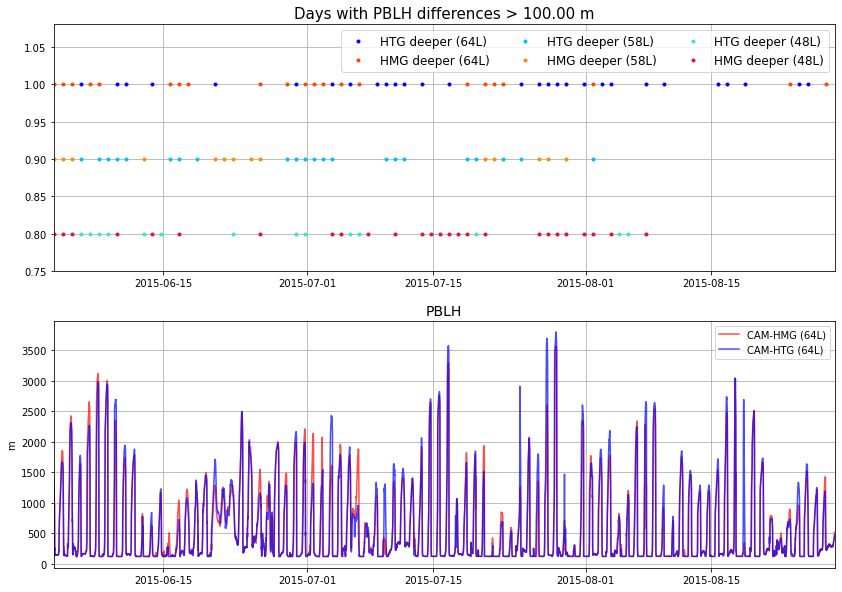

In [33]:
fig,axs = plt.subplots(2,1, figsize=(14,10))
axs     = axs.ravel()

# Plot days with HMG vs. HTG deeper PBLs, based on cutoff defined above 
dateArr                    = pd.date_range(start=HMGcamDS_all64_local['time'].values[0],
                                           end=HMGcamDS_all64_local['time'].values[-1]+np.timedelta64(1,'D')
                                           )
# 64 levels
HTGdeeper64                = np.full([len(dateArr)], np.nan)
HTGdeeper64[iHTGdeeper_64] = 1
HMGdeeper64                = np.full([len(dateArr)], np.nan)
HMGdeeper64[iHMGdeeper_64] = 1

# 58 levels
HTGdeeper58                = np.full([len(dateArr)], np.nan)
HTGdeeper58[iHTGdeeper_58] = 0.9
HMGdeeper58                = np.full([len(dateArr)], np.nan)
HMGdeeper58[iHMGdeeper_58] = 0.9

# 48 levels
HTGdeeper48                = np.full([len(dateArr)], np.nan)
HTGdeeper48[iHTGdeeper_48] = 0.8
HMGdeeper48                = np.full([len(dateArr)], np.nan)
HMGdeeper48[iHMGdeeper_48] = 0.8


axs[0].plot(dateArr, HTGdeeper64,'b.', label = 'HTG deeper (64L)')
axs[0].plot(dateArr, HMGdeeper64,'.',color='orangered', label = 'HMG deeper (64L)')

axs[0].plot(dateArr, HTGdeeper58,'.',color='deepskyblue', label = 'HTG deeper (58L)')
axs[0].plot(dateArr, HMGdeeper58,'.',color='darkorange', label = 'HMG deeper (58L)')

axs[0].plot(dateArr, HTGdeeper48,'.',color='turquoise', label = 'HTG deeper (48L)')
axs[0].plot(dateArr, HMGdeeper48,'.',color='crimson', label = 'HMG deeper (48L)')

axs[0].set_title(('Days with PBLH differences > %4.2f m' % diffCutoff),fontsize=15)
axs[0].grid()
axs[0].legend(ncol=3,fontsize=12)
axs[0].set_xlim([HMGcamDS_all64_local['time'].values[0], HMGcamDS_all64_local['time'].values[-1]])
axs[0].set_ylim([0.75,1.08])

# Plot PBLH in 58 level sims
axs[1].plot(HMGcamDS_all64_local['time'].values, np.squeeze(HMGcamDS_all64_local['PBLH'].values),
              'r-', alpha=0.7, label='CAM-HMG (64L)')
axs[1].plot(HTGcamDS_all64_local['time'].values, np.squeeze(HTGcamDS_all64_local['PBLH'].values),
              'b-', alpha=0.7, label='CAM-HTG (64L)')

axs[1].set_title('PBLH',fontsize=14)
axs[1].set_ylabel(HMGcamDS_58['PBLH'].units)
axs[1].legend()
axs[1].grid()
axs[1].set_xlim([HMGcamDS_all64_local['time'].values[0], HMGcamDS_all64_local['time'].values[-1]])


# plt.xlim([datetime.date(2015,6,2), datetime.date(2015,6,20)])
# plt.ylim([0,3000])

### Also maybe define in terms of dry vs. wet days?

In [20]:
## Define daily total PRECT: 

# # 64 levels

# PRECT defined as mean [m/s] over 20m timestep, 
#   so multiply by seconds in a 20m timestep and by 1000 mm/m to turn into  [mm/20 min]
HMGcamDS_all64_local['PRECT_mmPerDT'] = (('time','lat','lon'), HMGcamDS_all64_local.PRECT.values*1200.0*1000.0)
HTGcamDS_all64_local['PRECT_mmPerDT'] = (('time','lat','lon'), HTGcamDS_all64_local.PRECT.values*1200.0*1000.0)
# Now sum over the day to get total amount of rainfall
HMGcamDS_all64_localDailySum = HMGcamDS_all64_local.groupby('month_day').sum()
HTGcamDS_all64_localDailySum = HTGcamDS_all64_local.groupby('month_day').sum()


# # 58 levels 
HMGcamDS_all58_local['PRECT_mmPerDT'] = (('time','lat','lon'), HMGcamDS_all58_local.PRECT.values*1200.0*1000.0)
HTGcamDS_all58_local['PRECT_mmPerDT'] = (('time','lat','lon'), HTGcamDS_all58_local.PRECT.values*1200.0*1000.0)

HMGcamDS_all58_localDailySum = HMGcamDS_all58_local.groupby('month_day').sum()
HTGcamDS_all58_localDailySum = HTGcamDS_all58_local.groupby('month_day').sum()


# # 48 levels 
HMGcamDS_all48_local['PRECT_mmPerDT'] = (('time','lat','lon'), HMGcamDS_all48_local.PRECT.values*1200.0*1000.0)
HTGcamDS_all48_local['PRECT_mmPerDT'] = (('time','lat','lon'), HTGcamDS_all48_local.PRECT.values*1200.0*1000.0)

HMGcamDS_all48_localDailySum = HMGcamDS_all48_local.groupby('month_day').sum()
HTGcamDS_all48_localDailySum = HTGcamDS_all48_local.groupby('month_day').sum()


# # 32 levels 
HMGcamDS_all32_local['PRECT_mmPerDT'] = (('time','lat','lon'), HMGcamDS_all32_local.PRECT.values*1200.0*1000.0)
HTGcamDS_all32_local['PRECT_mmPerDT'] = (('time','lat','lon'), HTGcamDS_all32_local.PRECT.values*1200.0*1000.0)

HMGcamDS_all32_localDailySum = HMGcamDS_all32_local.groupby('month_day').sum()
HTGcamDS_all32_localDailySum = HTGcamDS_all32_local.groupby('month_day').sum()


In [37]:
# # Define cutoff for classifying a "dry day" [mm/day] 
# prectCutoff = 0.001
prectCutoff = 0.01


In [22]:
# # # Define cutoff for classifying a "dry day" [mm/day] 
# prectCutoff = 0.5

# ## 64 levels
# HTGcamDS_all64_local['PRECT_dailySum'] = (('month_day','lat','lon'), HTGcamDS_all64_localDailySum.PRECT_mmPerDT.values)
# HMGcamDS_all64_local['PRECT_dailySum'] = (('month_day','lat','lon'), HMGcamDS_all64_localDailySum.PRECT_mmPerDT.values)

# dryDays64 = np.where((HTGcamDS_all64_local.PRECT_dailySum.values < prectCutoff) & 
#                      (HMGcamDS_all64_local.PRECT_dailySum.values < prectCutoff))[0]

# wetDays64 = np.where((HTGcamDS_all64_local.PRECT_dailySum.values >= prectCutoff) & 
#                      (HMGcamDS_all64_local.PRECT_dailySum.values >= prectCutoff))[0]

# flagDays64_1 = np.where((HTGcamDS_all64_local.PRECT_dailySum.values < prectCutoff) & 
#                         (HMGcamDS_all64_local.PRECT_dailySum.values >= prectCutoff))[0]

# flagDays64_2 = np.where((HTGcamDS_all64_local.PRECT_dailySum.values >= prectCutoff) & 
#                         (HMGcamDS_all64_local.PRECT_dailySum.values < prectCutoff))[0]

# dryDays_HTG64 = HTGcamDS_all64_local.isel(month_day = dryDays64)
# wetDays_HTG64 = HTGcamDS_all64_local.isel(month_day = wetDays64)
# dryDays_HMG64 = HMGcamDS_all64_local.isel(month_day = dryDays64)
# wetDays_HMG64 = HMGcamDS_all64_local.isel(month_day = wetDays64)

# print('Number of days where HMG/HTG differ in wet/dry classification (left out of analysis): ', 
#       len(flagDays64_1)+len(flagDays64_2))


# ## 58 levels
# HTGcamDS_all58_local['PRECT_dailySum'] = (('month_day','lat','lon'), HTGcamDS_all58_localDailySum.PRECT_mmPerDT.values)
# HMGcamDS_all58_local['PRECT_dailySum'] = (('month_day','lat','lon'), HMGcamDS_all58_localDailySum.PRECT_mmPerDT.values)

# dryDays58 = np.where((HTGcamDS_all58_local.PRECT_dailySum.values < prectCutoff) & 
#                      (HMGcamDS_all58_local.PRECT_dailySum.values < prectCutoff))[0]
# wetDays58 = np.where((HTGcamDS_all58_local.PRECT_dailySum.values >= prectCutoff) & 
#                      (HMGcamDS_all58_local.PRECT_dailySum.values >= prectCutoff))[0]

# flagDays58_1 = np.where((HTGcamDS_all58_local.PRECT_dailySum.values < prectCutoff) & 
#                         (HMGcamDS_all58_local.PRECT_dailySum.values >= prectCutoff))[0]

# flagDays58_2 = np.where((HTGcamDS_all58_local.PRECT_dailySum.values >= prectCutoff) & 
#                         (HMGcamDS_all58_local.PRECT_dailySum.values < prectCutoff))[0]

# dryDays_HTG58 = HTGcamDS_all58_local.isel(month_day = dryDays58)
# wetDays_HTG58 = HTGcamDS_all58_local.isel(month_day = wetDays58)
# dryDays_HMG58 = HMGcamDS_all58_local.isel(month_day = dryDays58)
# wetDays_HMG58 = HMGcamDS_all58_local.isel(month_day = wetDays58)

# print('Number of days where HMG/HTG differ in wet/dry classification (left out of analysis): ', 
#       len(flagDays58_1)+len(flagDays58_2))



# ## 48 levels
# HTGcamDS_all48_local['PRECT_dailySum'] = (('month_day','lat','lon'), HTGcamDS_all48_localDailySum.PRECT_mmPerDT.values)
# HMGcamDS_all48_local['PRECT_dailySum'] = (('month_day','lat','lon'), HMGcamDS_all48_localDailySum.PRECT_mmPerDT.values)

# dryDays48 = np.where((HTGcamDS_all48_local.PRECT_dailySum.values < prectCutoff) & 
#                      (HMGcamDS_all48_local.PRECT_dailySum.values < prectCutoff))[0]
# wetDays48 = np.where((HTGcamDS_all48_local.PRECT_dailySum.values >= prectCutoff) & 
#                      (HMGcamDS_all48_local.PRECT_dailySum.values >= prectCutoff))[0]

# flagDays48_1 = np.where((HTGcamDS_all48_local.PRECT_dailySum.values < prectCutoff) & 
#                         (HMGcamDS_all48_local.PRECT_dailySum.values >= prectCutoff))[0]

# flagDays48_2 = np.where((HTGcamDS_all48_local.PRECT_dailySum.values >= prectCutoff) & 
#                         (HMGcamDS_all48_local.PRECT_dailySum.values < prectCutoff))[0]

# dryDays_HTG48 = HTGcamDS_all48_local.isel(month_day = dryDays48)
# wetDays_HTG48 = HTGcamDS_all48_local.isel(month_day = wetDays48)
# dryDays_HMG48 = HMGcamDS_all48_local.isel(month_day = dryDays48)
# wetDays_HMG48 = HMGcamDS_all48_local.isel(month_day = wetDays48)

# print('Number of days where HMG/HTG differ in wet/dry classification (left out of analysis): ', 
#       len(flagDays48_1)+len(flagDays48_2))


# ## 32 levels
# HTGcamDS_all32_local['PRECT_dailySum'] = (('month_day','lat','lon'), HTGcamDS_all32_localDailySum.PRECT_mmPerDT.values)
# HMGcamDS_all32_local['PRECT_dailySum'] = (('month_day','lat','lon'), HMGcamDS_all32_localDailySum.PRECT_mmPerDT.values)

# dryDays32 = np.where((HTGcamDS_all32_local.PRECT_dailySum.values < prectCutoff) & 
#                      (HMGcamDS_all32_local.PRECT_dailySum.values < prectCutoff))[0]
# wetDays32 = np.where((HTGcamDS_all32_local.PRECT_dailySum.values >= prectCutoff) & 
#                      (HMGcamDS_all32_local.PRECT_dailySum.values >= prectCutoff))[0]

# flagDays32_1 = np.where((HTGcamDS_all32_local.PRECT_dailySum.values < prectCutoff) & 
#                         (HMGcamDS_all32_local.PRECT_dailySum.values >= prectCutoff))[0]

# flagDays32_2 = np.where((HTGcamDS_all32_local.PRECT_dailySum.values >= prectCutoff) & 
#                         (HMGcamDS_all32_local.PRECT_dailySum.values < prectCutoff))[0]

# dryDays_HTG32 = HTGcamDS_all32_local.isel(month_day = dryDays32)
# wetDays_HTG32 = HTGcamDS_all32_local.isel(month_day = wetDays32)
# dryDays_HMG32 = HMGcamDS_all32_local.isel(month_day = dryDays32)
# wetDays_HMG32 = HMGcamDS_all32_local.isel(month_day = wetDays32)

# print('Number of days where HMG/HTG differ in wet/dry classification (left out of analysis): ', 
#       len(flagDays32_1)+len(flagDays32_2))


Number of days where HMG/HTG differ in wet/dry classification (left out of analysis):  6
Number of days where HMG/HTG differ in wet/dry classification (left out of analysis):  3
Number of days where HMG/HTG differ in wet/dry classification (left out of analysis):  6
Number of days where HMG/HTG differ in wet/dry classification (left out of analysis):  5


In [38]:
## 64 Levels 
# First, get month/days that qualify as dry days 
dryDaysSum64 = np.where((HTGcamDS_all64_localDailySum.PRECT_mmPerDT.values < prectCutoff) & 
                        (HMGcamDS_all64_localDailySum.PRECT_mmPerDT.values < prectCutoff))[0]
dryDaySums64_HTG64 = HTGcamDS_all64_localDailySum.isel(month_day = dryDaysSum64)
# Next, get the times in the full array that line up with those dry days above 
iDry64 = []
for iTime in range(len(dryDaySums64_HTG64.month_day.values)):
    iKeepTimes = np.where((HTGcamDS_all64_local['time.month']==dryDaySums64_HTG64.month_day_level_0.values[iTime]) & 
                          (HTGcamDS_all64_local['time.day']==dryDaySums64_HTG64.month_day_level_1.values[iTime]))[0]    
    iDry64 = np.append(iDry64, iKeepTimes).astype(int)
# Now select only those times in the local time array
dryDays_HTG64 = HTGcamDS_all64_local.isel(time=iDry64)
dryDays_HMG64 = HMGcamDS_all64_local.isel(time=iDry64)

#Do the same for wet days 
wetDaysSum64 = np.where((HTGcamDS_all64_localDailySum.PRECT_mmPerDT.values >= prectCutoff) & 
                        (HMGcamDS_all64_localDailySum.PRECT_mmPerDT.values >= prectCutoff))[0]
wetDaySums64_HTG64 = HTGcamDS_all64_localDailySum.isel(month_day = wetDaysSum64)
iWet64 = []
for iTime in range(len(wetDaySums64_HTG64.month_day.values)):
    iKeepTimes = np.where((HTGcamDS_all64_local['time.month']==wetDaySums64_HTG64.month_day_level_0.values[iTime]) & 
                          (HTGcamDS_all64_local['time.day']==wetDaySums64_HTG64.month_day_level_1.values[iTime]))[0]    
    iWet64 = np.append(iWet64, iKeepTimes).astype(int)
# Now select only those times in the local time array
wetDays_HTG64 = HTGcamDS_all64_local.isel(time=iWet64)
wetDays_HMG64 = HMGcamDS_all64_local.isel(time=iWet64)


print('64L:    # Dry days %i \n         # Wet days %i' % (len(dryDaySums64_HTG64.month_day.values), 
                                                          len(wetDaySums64_HTG64.month_day.values)))


64L:    # Dry days 13 
         # Wet days 68


In [39]:
## 58 Levels 
# First, get month/days that qualify as dry days 
dryDaysSum58 = np.where((HTGcamDS_all58_localDailySum.PRECT_mmPerDT.values < prectCutoff) & 
                        (HMGcamDS_all58_localDailySum.PRECT_mmPerDT.values < prectCutoff))[0]
dryDaySums58_HTG58 = HTGcamDS_all58_localDailySum.isel(month_day = dryDaysSum58)
# Next, get the times in the full array that line up with those dry days above 
iDry58 = []
for iTime in range(len(dryDaySums58_HTG58.month_day.values)):
    iKeepTimes = np.where((HTGcamDS_all58_local['time.month']==dryDaySums58_HTG58.month_day_level_0.values[iTime]) & 
                          (HTGcamDS_all58_local['time.day']==dryDaySums58_HTG58.month_day_level_1.values[iTime]))[0]    
    iDry58 = np.append(iDry58, iKeepTimes).astype(int)
# Now select only those times in the local time array
dryDays_HTG58 = HTGcamDS_all58_local.isel(time=iDry58)
dryDays_HMG58 = HMGcamDS_all58_local.isel(time=iDry58)

#Do the same for wet days 
wetDaysSum58 = np.where((HTGcamDS_all58_localDailySum.PRECT_mmPerDT.values >= prectCutoff) & 
                        (HMGcamDS_all58_localDailySum.PRECT_mmPerDT.values >= prectCutoff))[0]
wetDaySums58_HTG58 = HTGcamDS_all58_localDailySum.isel(month_day = wetDaysSum58)
iWet58 = []
for iTime in range(len(wetDaySums58_HTG58.month_day.values)):
    iKeepTimes = np.where((HTGcamDS_all58_local['time.month']==wetDaySums58_HTG58.month_day_level_0.values[iTime]) & 
                          (HTGcamDS_all58_local['time.day']==wetDaySums58_HTG58.month_day_level_1.values[iTime]))[0]    
    iWet58 = np.append(iWet58, iKeepTimes).astype(int)
# Now select only those times in the local time array
wetDays_HTG58 = HTGcamDS_all58_local.isel(time=iWet58)
wetDays_HMG58 = HMGcamDS_all58_local.isel(time=iWet58)


print('58L:    # Dry days %i \n         # Wet days %i' % (len(dryDaySums58_HTG58.month_day.values), 
                                                          len(wetDaySums58_HTG58.month_day.values)))




58L:    # Dry days 12 
         # Wet days 70


In [40]:
## 48 Levels 
# First, get month/days that qualify as dry days 
dryDaysSum48 = np.where((HTGcamDS_all48_localDailySum.PRECT_mmPerDT.values < prectCutoff) & 
                        (HMGcamDS_all48_localDailySum.PRECT_mmPerDT.values < prectCutoff))[0]
dryDaySums48_HTG48 = HTGcamDS_all48_localDailySum.isel(month_day = dryDaysSum48)
# Next, get the times in the full array that line up with those dry days above 
iDry48 = []
for iTime in range(len(dryDaySums48_HTG48.month_day.values)):
    iKeepTimes = np.where((HTGcamDS_all48_local['time.month']==dryDaySums48_HTG48.month_day_level_0.values[iTime]) & 
                          (HTGcamDS_all48_local['time.day']==dryDaySums48_HTG48.month_day_level_1.values[iTime]))[0]    
    iDry48 = np.append(iDry48, iKeepTimes).astype(int)
# Now select only those times in the local time array
dryDays_HTG48 = HTGcamDS_all48_local.isel(time=iDry48)
dryDays_HMG48 = HMGcamDS_all48_local.isel(time=iDry48)

#Do the same for wet days 
wetDaysSum48 = np.where((HTGcamDS_all48_localDailySum.PRECT_mmPerDT.values >= prectCutoff) & 
                        (HMGcamDS_all48_localDailySum.PRECT_mmPerDT.values >= prectCutoff))[0]
wetDaySums48_HTG48 = HTGcamDS_all48_localDailySum.isel(month_day = wetDaysSum48)
iWet48 = []
for iTime in range(len(wetDaySums48_HTG48.month_day.values)):
    iKeepTimes = np.where((HTGcamDS_all48_local['time.month']==wetDaySums48_HTG48.month_day_level_0.values[iTime]) & 
                          (HTGcamDS_all48_local['time.day']==wetDaySums48_HTG48.month_day_level_1.values[iTime]))[0]    
    iWet48 = np.append(iWet48, iKeepTimes).astype(int)
# Now select only those times in the local time array
wetDays_HTG48 = HTGcamDS_all48_local.isel(time=iWet48)
wetDays_HMG48 = HMGcamDS_all48_local.isel(time=iWet48)


print('48:    # Dry days %i \n         # Wet days %i' % (len(dryDaySums48_HTG48.month_day.values), 
                                                          len(wetDaySums48_HTG48.month_day.values)))





48:    # Dry days 13 
         # Wet days 65


In [53]:
## 32 Levels 
# First, get month/days that qualify as dry days 
dryDaysSum32 = np.where((HTGcamDS_all32_localDailySum.PRECT_mmPerDT.values < prectCutoff) & 
                        (HMGcamDS_all32_localDailySum.PRECT_mmPerDT.values < prectCutoff))[0]
dryDaySums32_HTG32 = HTGcamDS_all32_localDailySum.isel(month_day = dryDaysSum32)
# Next, get the times in the full array that line up with those dry days above 
iDry32 = []
for iTime in range(len(dryDaySums32_HTG32.month_day.values)):
    iKeepTimes = np.where((HTGcamDS_all32_local['time.month']==dryDaySums32_HTG32.month_day_level_0.values[iTime]) & 
                          (HTGcamDS_all32_local['time.day']==dryDaySums32_HTG32.month_day_level_1.values[iTime]))[0]    
    iDry32 = np.append(iDry32, iKeepTimes).astype(int)
# Now select only those times in the local time array
dryDays_HTG32 = HTGcamDS_all32_local.isel(time=iDry32)
dryDays_HMG32 = HMGcamDS_all32_local.isel(time=iDry32)

#Do the same for wet days 
wetDaysSum32 = np.where((HTGcamDS_all32_localDailySum.PRECT_mmPerDT.values >= prectCutoff) & 
                        (HMGcamDS_all32_localDailySum.PRECT_mmPerDT.values >= prectCutoff))[0]
wetDaySums32_HTG32 = HTGcamDS_all32_localDailySum.isel(month_day = wetDaysSum32)
iWet32 = []
for iTime in range(len(wetDaySums32_HTG32.month_day.values)):
    iKeepTimes = np.where((HTGcamDS_all32_local['time.month']==wetDaySums32_HTG32.month_day_level_0.values[iTime]) & 
                          (HTGcamDS_all32_local['time.day']==wetDaySums32_HTG32.month_day_level_1.values[iTime]))[0]    
    iWet32 = np.append(iWet32, iKeepTimes).astype(int)
# Now select only those times in the local time array
wetDays_HTG32 = HTGcamDS_all32_local.isel(time=iWet32)
wetDays_HMG32 = HMGcamDS_all32_local.isel(time=iWet32)

print('32:    # Dry days %i \n         # Wet days %i' % (len(dryDaySums32_HTG32.month_day.values), 
                                                          len(wetDaySums32_HTG32.month_day.values)))


32:    # Dry days 15 
         # Wet days 67


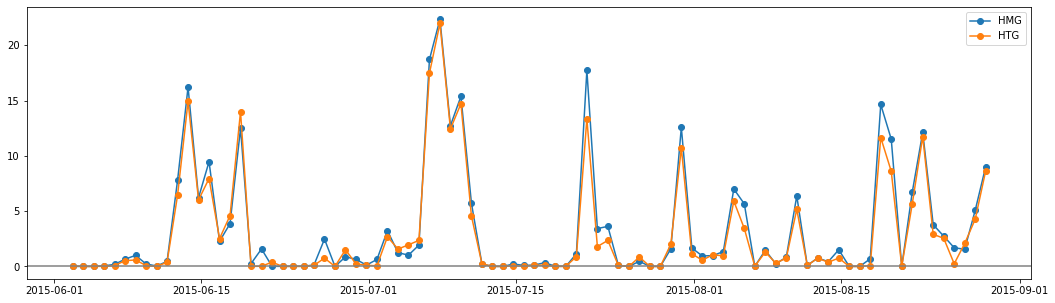

In [18]:
fig,ax1 = plt.subplots(1,1, figsize=(18,5))

dateArr                    = pd.date_range(start=HMGcamDS_all64_local['time'].values[0],
                                           end=HMGcamDS_all64_local['time'].values[-1]+np.timedelta64(1,'D')
                                           )

ax1.plot(dateArr, np.squeeze(HMGcamDS_all64_localDailySum.PRECT_mmPerDT.values),'-o',label='HMG')
ax1.plot(dateArr, np.squeeze(HTGcamDS_all64_localDailySum.PRECT_mmPerDT.values),'-o',label='HTG')
ax1.axhline(prectCutoff, color='grey')
ax1.legend()

In [42]:
# Get means a function of hour of day
hourlyMean_localDry_HMG_64 = dryDays_HMG64.groupby("time.hour").mean()
hourlyMean_localDry_HTG_64 = dryDays_HTG64.groupby("time.hour").mean()
hourlyMean_localWet_HMG_64 = wetDays_HMG64.groupby("time.hour").mean()
hourlyMean_localWet_HTG_64 = wetDays_HTG64.groupby("time.hour").mean()


hourlyMean_localDry_HMG_58 = dryDays_HMG58.groupby("time.hour").mean()
hourlyMean_localDry_HTG_58 = dryDays_HTG58.groupby("time.hour").mean()
hourlyMean_localWet_HMG_58 = wetDays_HMG58.groupby("time.hour").mean()
hourlyMean_localWet_HTG_58 = wetDays_HTG58.groupby("time.hour").mean()


hourlyMean_localDry_HMG_48 = dryDays_HMG48.groupby("time.hour").mean()
hourlyMean_localDry_HTG_48 = dryDays_HTG48.groupby("time.hour").mean()
hourlyMean_localWet_HMG_48 = wetDays_HMG48.groupby("time.hour").mean()
hourlyMean_localWet_HTG_48 = wetDays_HTG48.groupby("time.hour").mean()

hourlyMean_localDry_HMG_32 = dryDays_HMG32.groupby("time.hour").mean()
hourlyMean_localDry_HTG_32 = dryDays_HTG32.groupby("time.hour").mean()
hourlyMean_localWet_HMG_32 = wetDays_HMG32.groupby("time.hour").mean()
hourlyMean_localWet_HTG_32 = wetDays_HTG32.groupby("time.hour").mean()



Text(0.5, 1.0, 'PBLH evolution')

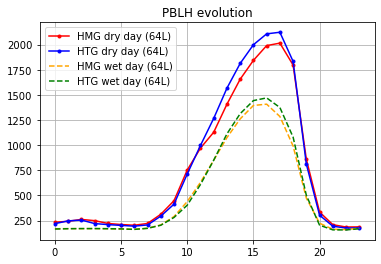

In [43]:
plt.plot(hourlyMean_localDry_HMG_64.hour.values, np.squeeze(hourlyMean_localDry_HMG_64.PBLH.values),'r.-',
        label = 'HMG dry day (64L)')
plt.plot(hourlyMean_localDry_HTG_64.hour.values, np.squeeze(hourlyMean_localDry_HTG_64.PBLH.values),'b.-',
        label = 'HTG dry day (64L)')

plt.plot(hourlyMean_localWet_HMG_64.hour.values, np.squeeze(hourlyMean_localWet_HMG_64.PBLH.values),'--',
         color='orange',
        label = 'HMG wet day (64L)')
plt.plot(hourlyMean_localWet_HTG_64.hour.values, np.squeeze(hourlyMean_localWet_HTG_64.PBLH.values),'--',
         color='green',
        label = 'HTG wet day (64L)')

plt.legend()
plt.grid()

plt.title('PBLH evolution')

         

Text(0.5, 1.0, 'PBLH (based on max dT/dz) evolution')

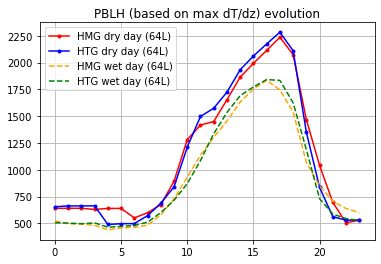

In [44]:
plt.plot(hourlyMean_localDry_HMG_64.hour.values, np.squeeze(hourlyMean_localDry_HMG_64.PBLdepth.values),'r.-',
        label = 'HMG dry day (64L)')
plt.plot(hourlyMean_localDry_HTG_64.hour.values, np.squeeze(hourlyMean_localDry_HTG_64.PBLdepth.values),'b.-',
        label = 'HTG dry day (64L)')

plt.plot(hourlyMean_localWet_HMG_64.hour.values, np.squeeze(hourlyMean_localWet_HMG_64.PBLdepth.values),'--',
         color='orange',
        label = 'HMG wet day (64L)')
plt.plot(hourlyMean_localWet_HTG_64.hour.values, np.squeeze(hourlyMean_localWet_HTG_64.PBLdepth.values),'--',
         color='green',
        label = 'HTG wet day (64L)')

plt.legend()
plt.grid()

plt.title('PBLH (based on max dT/dz) evolution')

         

Text(0.5, 1.0, 'PBLH evolution')

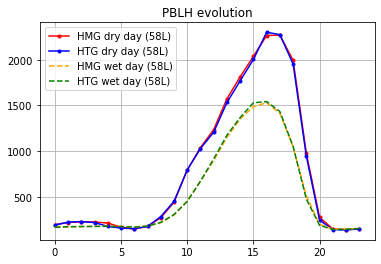

In [45]:
plt.plot(hourlyMean_localDry_HMG_58.hour.values, np.squeeze(hourlyMean_localDry_HMG_58.PBLH.values),'r.-',
        label = 'HMG dry day (58L)')
plt.plot(hourlyMean_localDry_HTG_58.hour.values, np.squeeze(hourlyMean_localDry_HTG_58.PBLH.values),'b.-',
        label = 'HTG dry day (58L)')

plt.plot(hourlyMean_localWet_HMG_58.hour.values, np.squeeze(hourlyMean_localWet_HMG_58.PBLH.values),'--',
         color='orange',
        label = 'HMG wet day (58L)')
plt.plot(hourlyMean_localWet_HTG_58.hour.values, np.squeeze(hourlyMean_localWet_HTG_58.PBLH.values),'--',
         color='green',
        label = 'HTG wet day (58L)')

plt.legend()
plt.grid()

plt.title('PBLH evolution')
  

Text(0.5, 1.0, 'PBLH (based on max dT/dz) evolution')

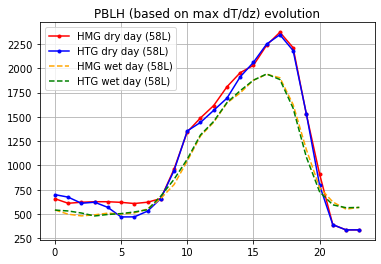

In [46]:
plt.plot(hourlyMean_localDry_HMG_58.hour.values, np.squeeze(hourlyMean_localDry_HMG_58.PBLdepth.values),'r.-',
        label = 'HMG dry day (58L)')
plt.plot(hourlyMean_localDry_HTG_58.hour.values, np.squeeze(hourlyMean_localDry_HTG_58.PBLdepth.values),'b.-',
        label = 'HTG dry day (58L)')

plt.plot(hourlyMean_localWet_HMG_58.hour.values, np.squeeze(hourlyMean_localWet_HMG_58.PBLdepth.values),'--',
         color='orange',
        label = 'HMG wet day (58L)')
plt.plot(hourlyMean_localWet_HTG_58.hour.values, np.squeeze(hourlyMean_localWet_HTG_58.PBLdepth.values),'--',
         color='green',
        label = 'HTG wet day (58L)')

plt.legend()
plt.grid()

plt.title('PBLH (based on max dT/dz) evolution')



Text(0.5, 1.0, 'PBLH evolution')

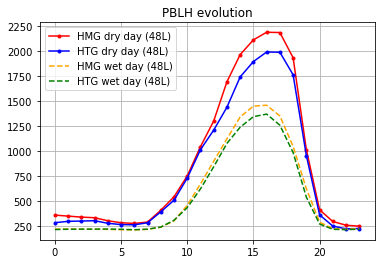

In [47]:
plt.plot(hourlyMean_localDry_HMG_48.hour.values, np.squeeze(hourlyMean_localDry_HMG_48.PBLH.values),'r.-',
        label = 'HMG dry day (48L)')
plt.plot(hourlyMean_localDry_HTG_48.hour.values, np.squeeze(hourlyMean_localDry_HTG_48.PBLH.values),'b.-',
        label = 'HTG dry day (48L)')

plt.plot(hourlyMean_localWet_HMG_48.hour.values, np.squeeze(hourlyMean_localWet_HMG_48.PBLH.values),'--',
         color='orange',
        label = 'HMG wet day (48L)')
plt.plot(hourlyMean_localWet_HTG_48.hour.values, np.squeeze(hourlyMean_localWet_HTG_48.PBLH.values),'--',
         color='green',
        label = 'HTG wet day (48L)')

plt.legend()
plt.grid()

plt.title('PBLH evolution')

         
         

Text(0.5, 1.0, 'PBLH (based on max dT/dz) evolution')

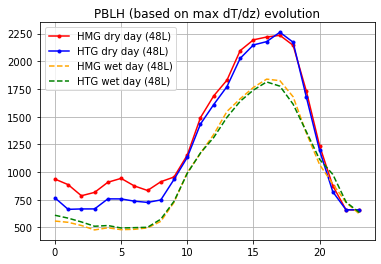

In [48]:
plt.plot(hourlyMean_localDry_HMG_48.hour.values, np.squeeze(hourlyMean_localDry_HMG_48.PBLdepth.values),'r.-',
        label = 'HMG dry day (48L)')
plt.plot(hourlyMean_localDry_HTG_48.hour.values, np.squeeze(hourlyMean_localDry_HTG_48.PBLdepth.values),'b.-',
        label = 'HTG dry day (48L)')

plt.plot(hourlyMean_localWet_HMG_48.hour.values, np.squeeze(hourlyMean_localWet_HMG_48.PBLdepth.values),'--',
         color='orange',
        label = 'HMG wet day (48L)')
plt.plot(hourlyMean_localWet_HTG_48.hour.values, np.squeeze(hourlyMean_localWet_HTG_48.PBLdepth.values),'--',
         color='green',
        label = 'HTG wet day (48L)')

plt.legend()
plt.grid()

plt.title('PBLH (based on max dT/dz) evolution')

Text(0.5, 1.0, 'PBLH evolution')

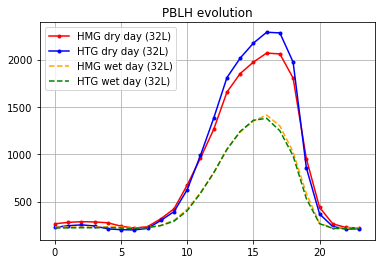

In [49]:
plt.plot(hourlyMean_localDry_HMG_32.hour.values, np.squeeze(hourlyMean_localDry_HMG_32.PBLH.values),'r.-',
        label = 'HMG dry day (32L)')
plt.plot(hourlyMean_localDry_HTG_32.hour.values, np.squeeze(hourlyMean_localDry_HTG_32.PBLH.values),'b.-',
        label = 'HTG dry day (32L)')

plt.plot(hourlyMean_localWet_HMG_32.hour.values, np.squeeze(hourlyMean_localWet_HMG_32.PBLH.values),'--',
         color='orange',
        label = 'HMG wet day (32L)')
plt.plot(hourlyMean_localWet_HTG_32.hour.values, np.squeeze(hourlyMean_localWet_HTG_32.PBLH.values),'--',
         color='green',
        label = 'HTG wet day (32L)')

plt.legend()
plt.grid()

plt.title('PBLH evolution')


Text(0.5, 1.0, 'PBLH (based on max dT/dz) evolution')

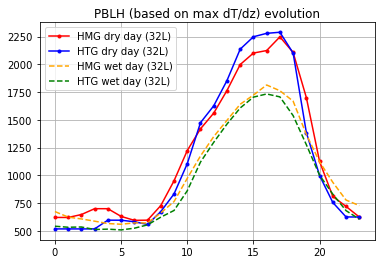

In [50]:
plt.plot(hourlyMean_localDry_HMG_32.hour.values, np.squeeze(hourlyMean_localDry_HMG_32.PBLdepth.values),'r.-',
        label = 'HMG dry day (32L)')
plt.plot(hourlyMean_localDry_HTG_32.hour.values, np.squeeze(hourlyMean_localDry_HTG_32.PBLdepth.values),'b.-',
        label = 'HTG dry day (32L)')

plt.plot(hourlyMean_localWet_HMG_32.hour.values, np.squeeze(hourlyMean_localWet_HMG_32.PBLdepth.values),'--',
         color='orange',
        label = 'HMG wet day (32L)')
plt.plot(hourlyMean_localWet_HTG_32.hour.values, np.squeeze(hourlyMean_localWet_HTG_32.PBLdepth.values),'--',
         color='green',
        label = 'HTG wet day (32L)')

plt.legend()
plt.grid()

plt.title('PBLH (based on max dT/dz) evolution')

In [206]:
HTGcamDS_all32.RVMTEND_CLUBB.long_name

'Water vapor tendency'

### What about mornig profiles on just dry days?

In [54]:
## Get morning-mean arrays (8a-11a)

# 64 L
iMornings_HMG64 = np.where((hourlyMean_localDry_HMG_64.hour>=8) & 
                           (hourlyMean_localDry_HMG_64.hour<11))[0]
iMornings_HTG64 = np.where((hourlyMean_localDry_HTG_64.hour>=8) & 
                           (hourlyMean_localDry_HTG_64.hour<11))[0]

hourlyMean_localDryMorning_HMG_64 = hourlyMean_localDry_HMG_64.isel(hour=iMornings_HMG64).mean(dim='hour')
hourlyMean_localDryMorning_HTG_64 = hourlyMean_localDry_HTG_64.isel(hour=iMornings_HTG64).mean(dim='hour')


# 58 L
iMornings_HMG58 = np.where((hourlyMean_localDry_HMG_58.hour>=8) & 
                           (hourlyMean_localDry_HMG_58.hour<11))[0]
iMornings_HTG58 = np.where((hourlyMean_localDry_HTG_58.hour>=8) & 
                           (hourlyMean_localDry_HTG_58.hour<11))[0]

hourlyMean_localDryMorning_HMG_58 = hourlyMean_localDry_HMG_58.isel(hour=iMornings_HMG58).mean(dim='hour')
hourlyMean_localDryMorning_HTG_58 = hourlyMean_localDry_HTG_58.isel(hour=iMornings_HTG58).mean(dim='hour')


# 58 L
iMornings_HMG48 = np.where((hourlyMean_localDry_HMG_48.hour>=8) & 
                           (hourlyMean_localDry_HMG_48.hour<11))[0]
iMornings_HTG48 = np.where((hourlyMean_localDry_HTG_48.hour>=8) & 
                           (hourlyMean_localDry_HTG_48.hour<11))[0]

hourlyMean_localDryMorning_HMG_48 = hourlyMean_localDry_HMG_48.isel(hour=iMornings_HMG48).mean(dim='hour')
hourlyMean_localDryMorning_HTG_48 = hourlyMean_localDry_HTG_48.isel(hour=iMornings_HTG48).mean(dim='hour')


# 58 L
iMornings_HMG32 = np.where((hourlyMean_localDry_HMG_32.hour>=8) & 
                           (hourlyMean_localDry_HMG_32.hour<11))[0]
iMornings_HTG32 = np.where((hourlyMean_localDry_HTG_32.hour>=8) & 
                           (hourlyMean_localDry_HTG_32.hour<11))[0]

hourlyMean_localDryMorning_HMG_32 = hourlyMean_localDry_HMG_32.isel(hour=iMornings_HMG32).mean(dim='hour')
hourlyMean_localDryMorning_HTG_32 = hourlyMean_localDry_HTG_32.isel(hour=iMornings_HTG32).mean(dim='hour')



(0.0, 0.06)

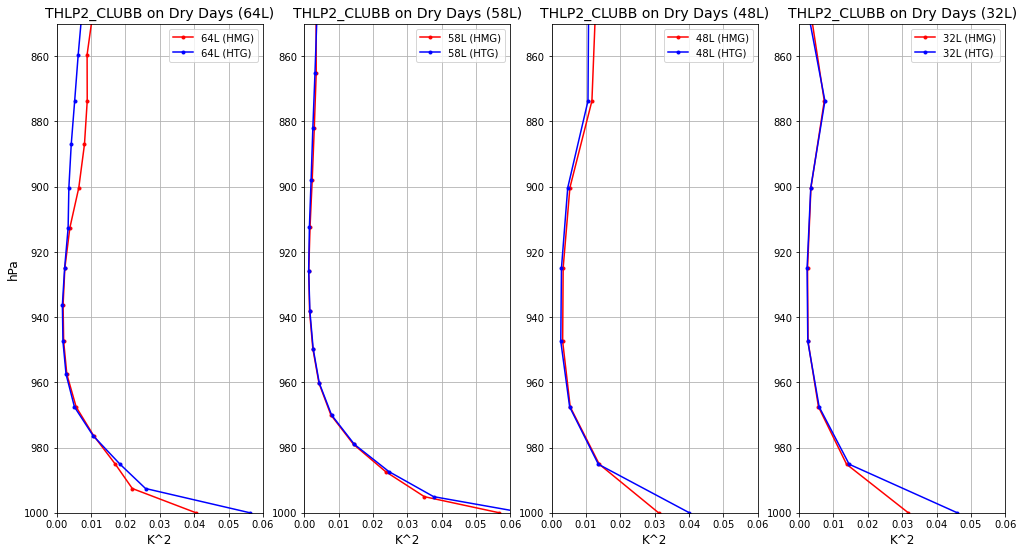

In [58]:
## Plot vertical profiles 

varSel = 'THLP2_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_xlim([0.0, 0.06])
axs[1].set_xlim([0.0, 0.06])
axs[2].set_xlim([0.0, 0.06])
axs[3].set_xlim([0.0, 0.06])


(0.0, 0.15)

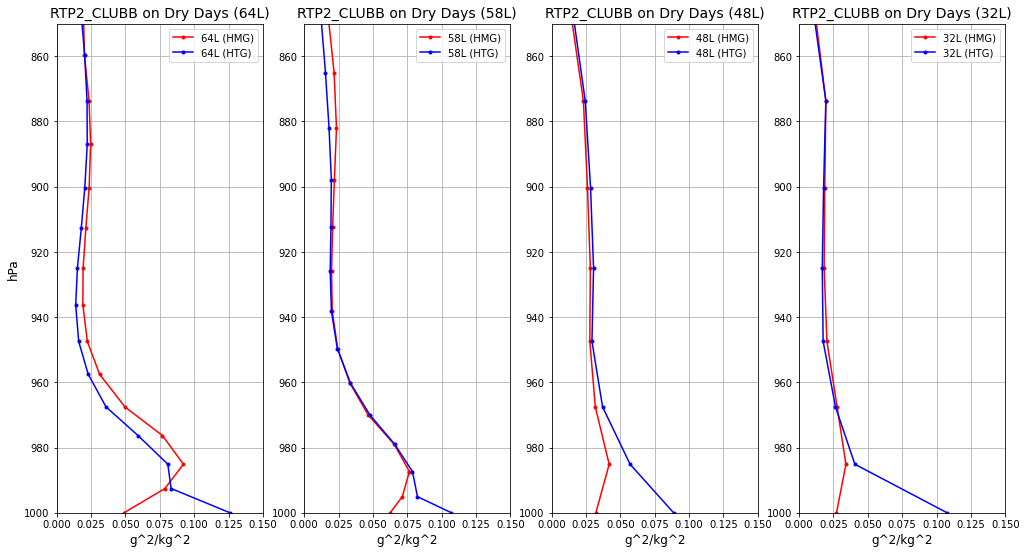

In [59]:
## Plot vertical profiles 

varSel = 'RTP2_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_xlim([0.0, 0.15])
axs[1].set_xlim([0.0, 0.15])
axs[2].set_xlim([0.0, 0.15])
axs[3].set_xlim([0.0, 0.15])


(-0.02, 0.05)

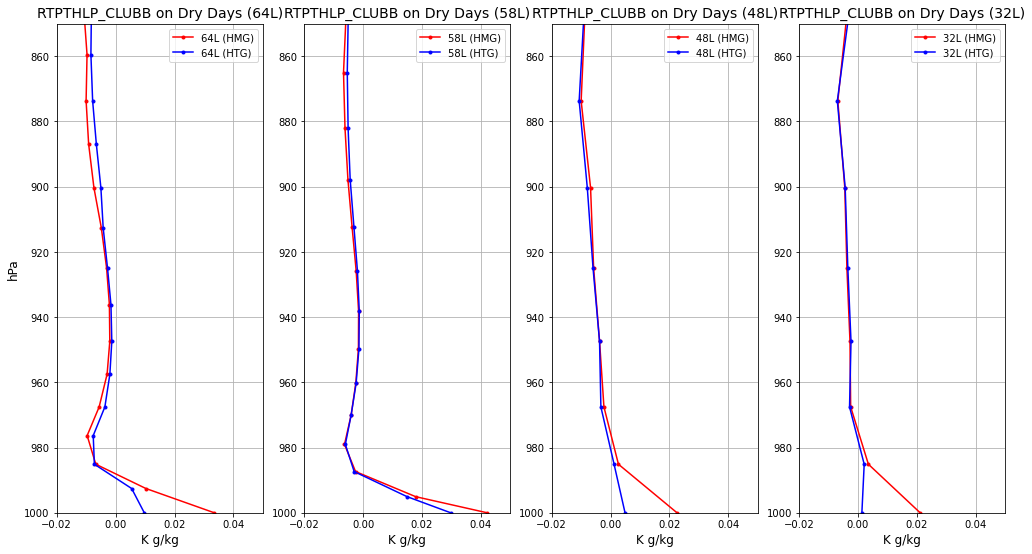

In [60]:
## Plot vertical profiles 

varSel = 'RTPTHLP_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_xlim([-0.02, 0.05])
axs[1].set_xlim([-0.02, 0.05])
axs[2].set_xlim([-0.02, 0.05])
axs[3].set_xlim([-0.02, 0.05])



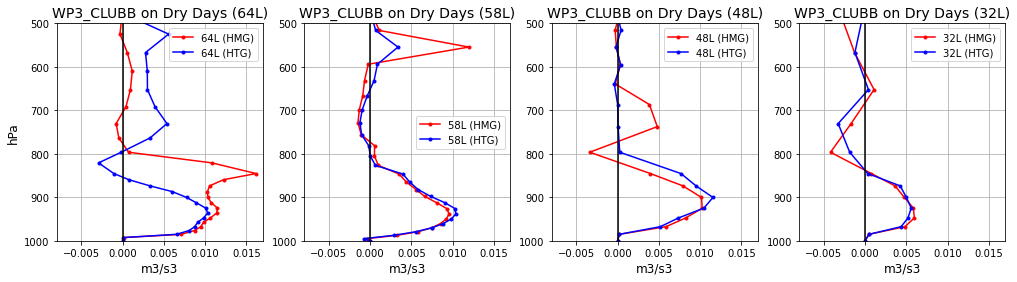

In [86]:
## Plot vertical profiles 

varSel = 'WP3_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,4))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

# axs[0].set_xlim([-0.008, 0.009])
# axs[1].set_xlim([-0.008, 0.009])
# axs[2].set_xlim([-0.008, 0.009])
# axs[3].set_xlim([-0.008, 0.009])

axs[0].set_xlim([-0.008, 0.017])
axs[1].set_xlim([-0.008, 0.017])
axs[2].set_xlim([-0.008, 0.017])
axs[3].set_xlim([-0.008, 0.017])

axs[0].axvline(0, color='k')
axs[1].axvline(0, color='k')
axs[2].axvline(0, color='k')
axs[3].axvline(0, color='k')


(0.0, 0.25)

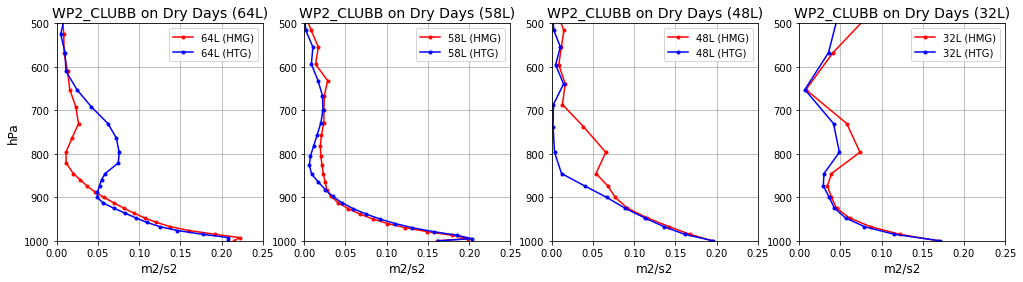

In [74]:
## Plot vertical profiles 

varSel = 'WP2_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,4))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

# axs[0].set_xlim([0, 0.17])
# axs[1].set_xlim([0, 0.17])
# axs[2].set_xlim([0, 0.17])
# axs[3].set_xlim([0, 0.17])
axs[0].set_xlim([0, 0.25])
axs[1].set_xlim([0, 0.25])
axs[2].set_xlim([0, 0.25])
axs[3].set_xlim([0, 0.25])



(0.0, 0.3)

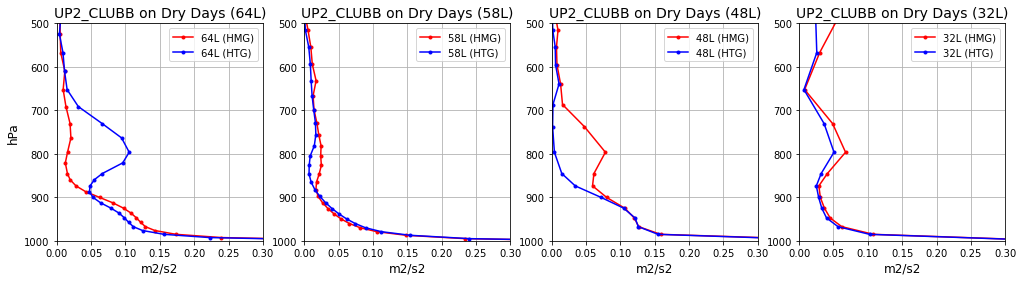

In [72]:
## Plot vertical profiles 

varSel = 'UP2_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,4))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

axs[0].set_xlim([0, 0.3])
axs[1].set_xlim([0, 0.3])
axs[2].set_xlim([0, 0.3])
axs[3].set_xlim([0, 0.3])




(0.0, 0.3)

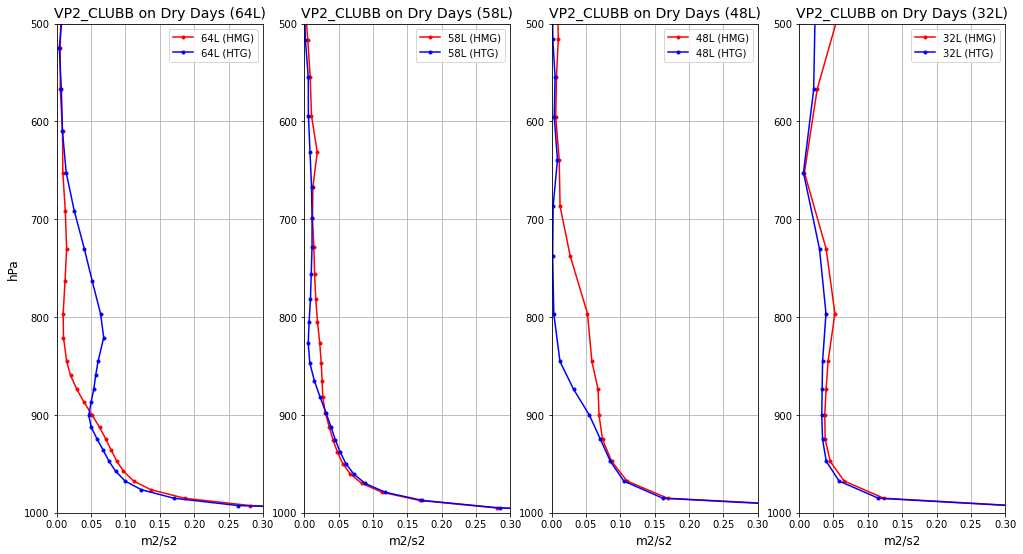

In [68]:
## Plot vertical profiles 

varSel = 'VP2_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

axs[0].set_xlim([0, 0.3])
axs[1].set_xlim([0, 0.3])
axs[2].set_xlim([0, 0.3])
axs[3].set_xlim([0, 0.3])





(-0.055, 0.065)

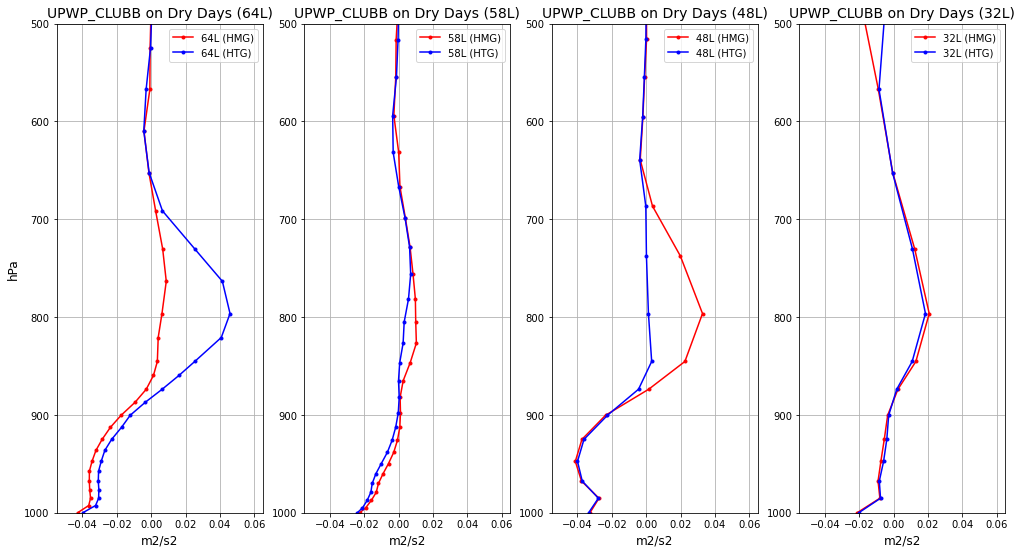

In [70]:
## Plot vertical profiles 

varSel = 'UPWP_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

# axs[0].set_xlim([-0.025, 0.065])
# axs[1].set_xlim([-0.025, 0.065])
# axs[2].set_xlim([-0.025, 0.065])
# axs[3].set_xlim([-0.025, 0.065])
axs[0].set_xlim([-0.055, 0.065])
axs[1].set_xlim([-0.055, 0.065])
axs[2].set_xlim([-0.055, 0.065])
axs[3].set_xlim([-0.055, 0.065])




(1000.0, 850.0)

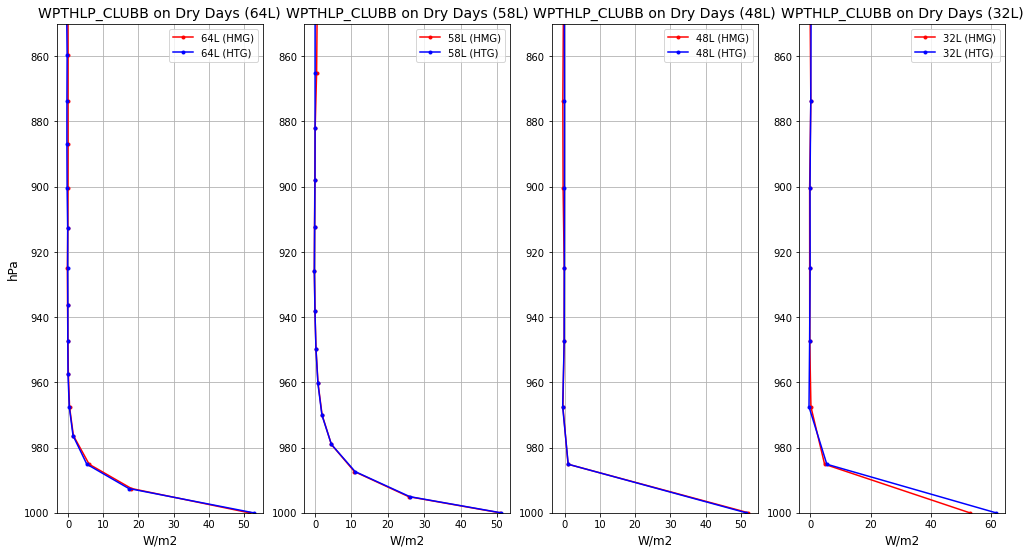

In [183]:
## Plot vertical profiles 

varSel = 'WPTHLP_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,850])
axs[1].set_ylim([1000,850])
axs[2].set_ylim([1000,850])
axs[3].set_ylim([1000,850])

# axs[0].set_xlim([-0.025, 0.065])
# axs[1].set_xlim([-0.025, 0.065])
# axs[2].set_xlim([-0.025, 0.065])
# axs[3].set_xlim([-0.025, 0.065])


(1000.0, 800.0)

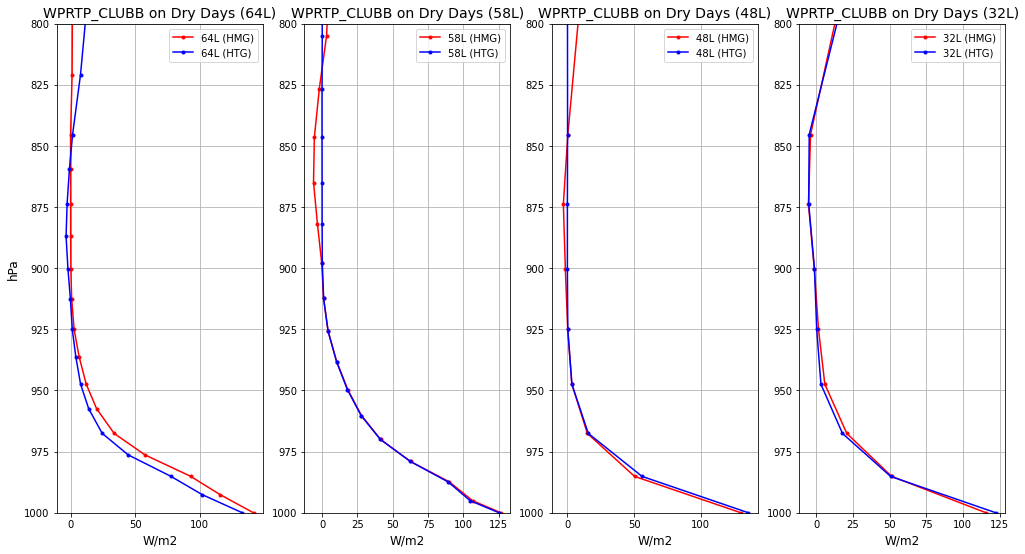

In [186]:
## Plot vertical profiles 

varSel = 'WPRTP_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,800])
axs[1].set_ylim([1000,800])
axs[2].set_ylim([1000,800])
axs[3].set_ylim([1000,800])

# axs[0].set_xlim([-0.025, 0.065])
# axs[1].set_xlim([-0.025, 0.065])
# axs[2].set_xlim([-0.025, 0.065])
# axs[3].set_xlim([-0.025, 0.065])



(1000.0, 800.0)

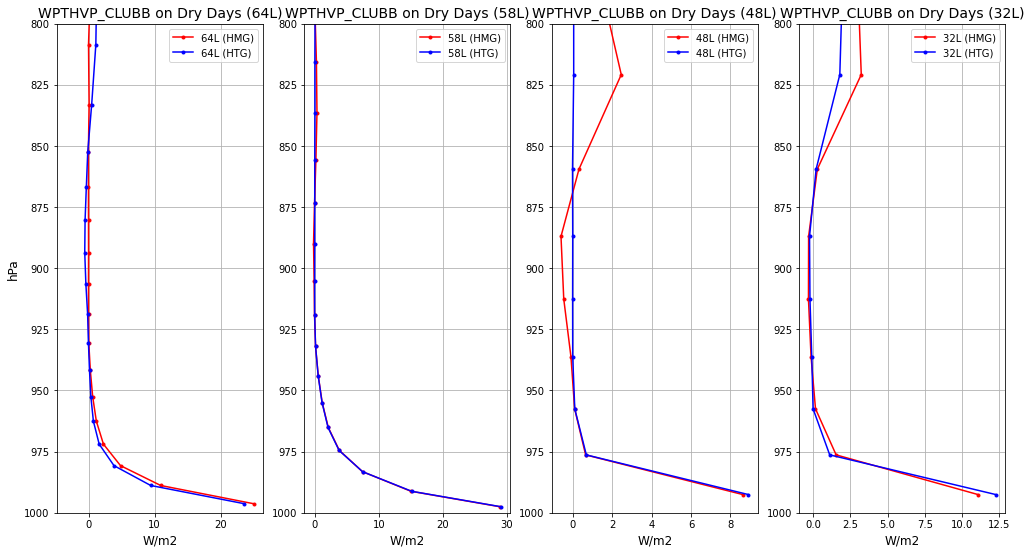

In [187]:
## Plot vertical profiles 

varSel = 'WPTHVP_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.lev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.lev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.lev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.lev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.lev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.lev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.lev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.lev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,800])
axs[1].set_ylim([1000,800])
axs[2].set_ylim([1000,800])
axs[3].set_ylim([1000,800])

# axs[0].set_xlim([-0.025, 0.065])
# axs[1].set_xlim([-0.025, 0.065])
# axs[2].set_xlim([-0.025, 0.065])
# axs[3].set_xlim([-0.025, 0.065])




(-3e-08, 2e-07)

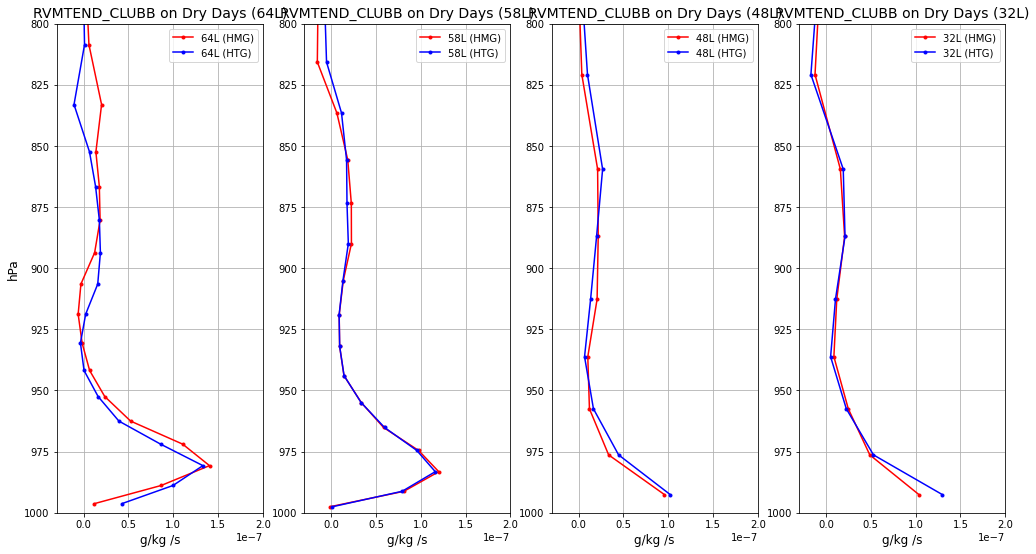

In [75]:
## Plot vertical profiles 

varSel = 'RVMTEND_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.lev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.lev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.lev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.lev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.lev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.lev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.lev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.lev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,800])
axs[1].set_ylim([1000,800])
axs[2].set_ylim([1000,800])
axs[3].set_ylim([1000,800])

axs[0].set_xlim([-0.3e-7, 2e-7])
axs[1].set_xlim([-0.3e-7, 2e-7])
axs[2].set_xlim([-0.3e-7, 2e-7])
axs[3].set_xlim([-0.3e-7, 2e-7])



(1000.0, 800.0)

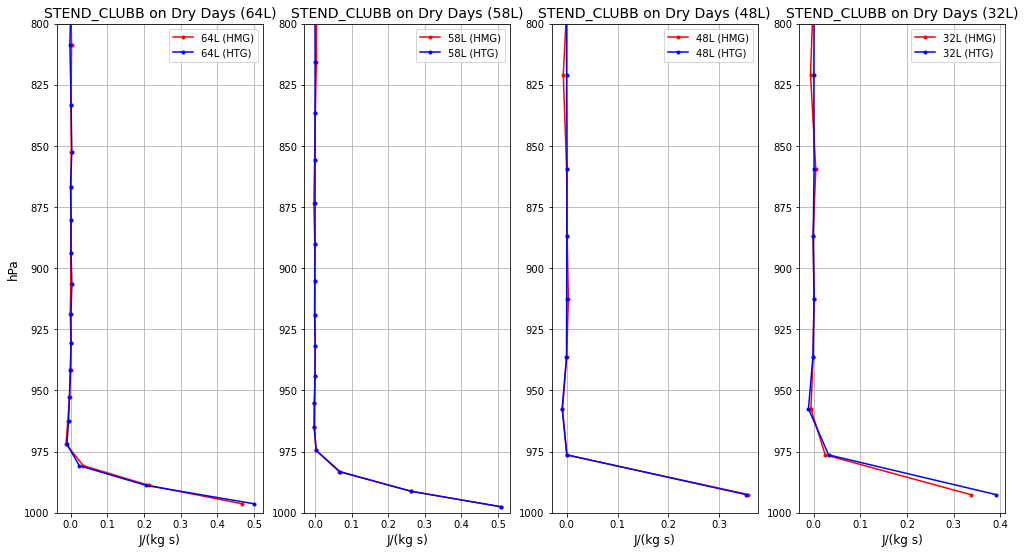

In [192]:
## Plot vertical profiles 

varSel = 'STEND_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.lev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.lev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.lev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.lev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.lev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.lev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.lev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.lev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,800])
axs[1].set_ylim([1000,800])
axs[2].set_ylim([1000,800])
axs[3].set_ylim([1000,800])

# axs[0].set_xlim([-0.3e-7, 2e-7])
# axs[1].set_xlim([-0.3e-7, 2e-7])
# axs[2].set_xlim([-0.3e-7, 2e-7])
# axs[3].set_xlim([-0.3e-7, 2e-7])




(265.0, 305.0)

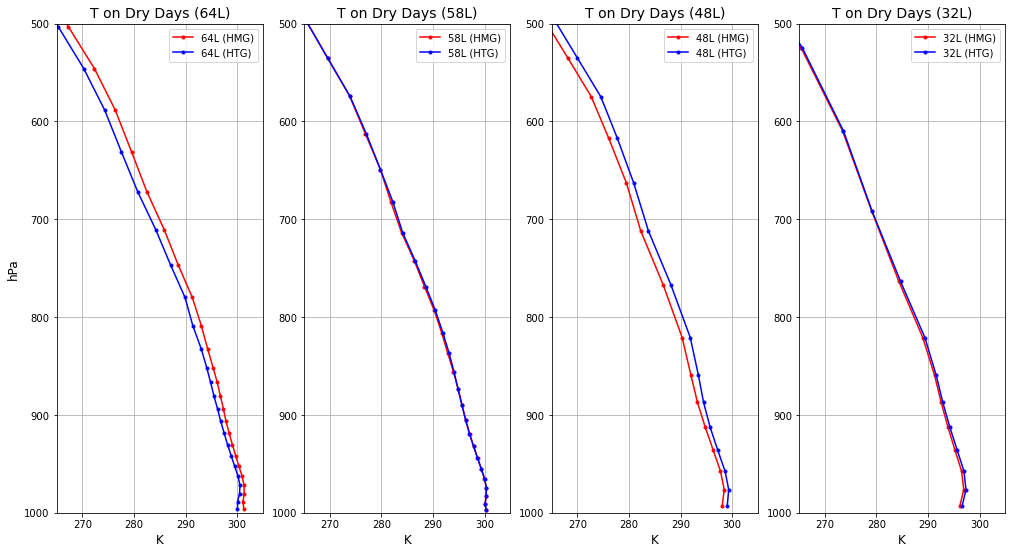

In [84]:
## Plot vertical profiles 

varSel = 'T'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.lev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.lev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.lev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.lev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.lev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.lev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.lev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.lev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

axs[0].set_xlim([265, 305])
axs[1].set_xlim([265, 305])
axs[2].set_xlim([265, 305])
axs[3].set_xlim([265, 305])


(0.0, 0.02)

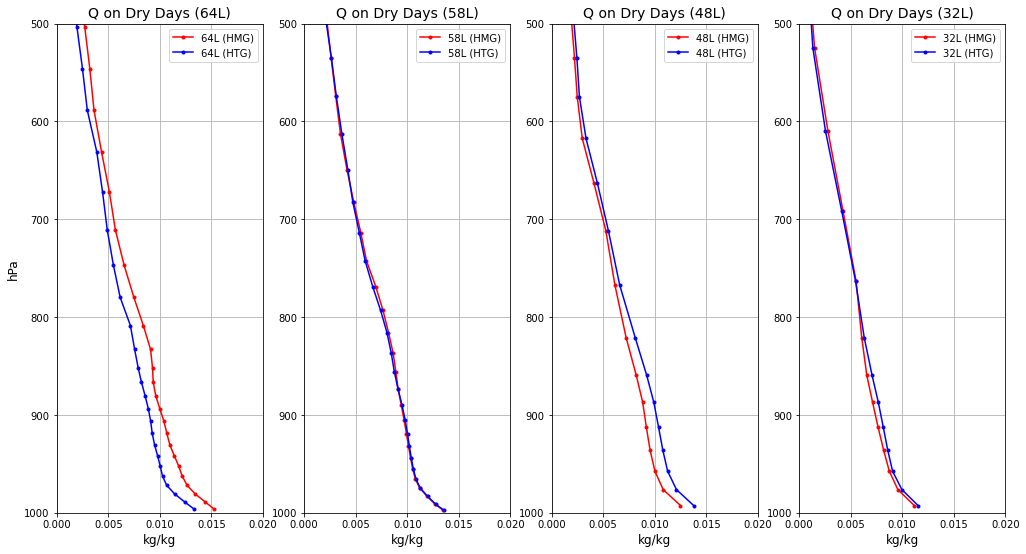

In [85]:
## Plot vertical profiles 

varSel = 'Q'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.lev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.lev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.lev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.lev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.lev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.lev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.lev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.lev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

axs[0].set_xlim([0.0, 0.02])
axs[1].set_xlim([0.0, 0.02])
axs[2].set_xlim([0.0, 0.02])
axs[3].set_xlim([0.0, 0.02])



(0.0, 10.0)

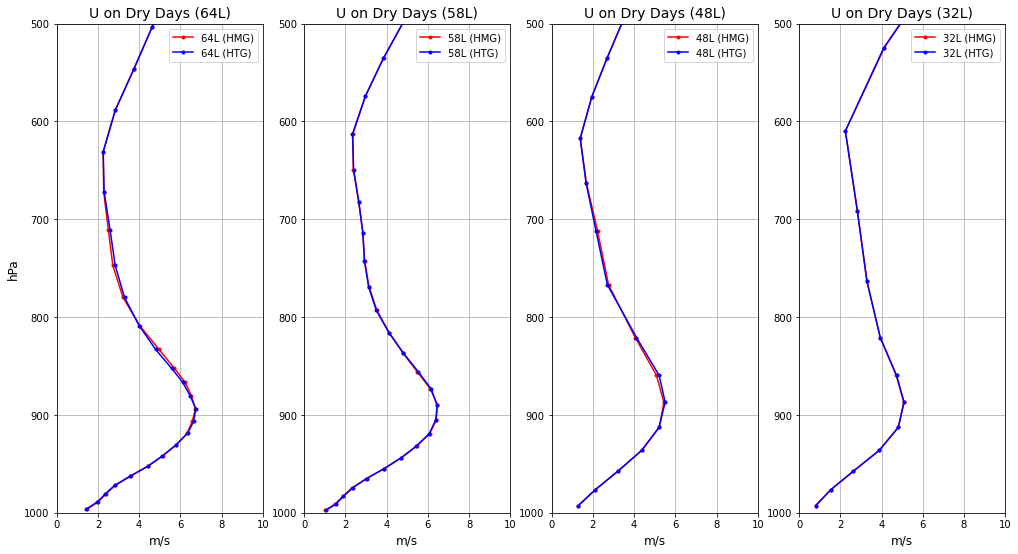

In [80]:
## Plot vertical profiles 

varSel = 'U'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.lev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.lev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.lev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.lev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.lev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.lev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.lev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.lev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

axs[0].set_xlim([0.0, 10])
axs[1].set_xlim([0.0, 10])
axs[2].set_xlim([0.0, 10])
axs[3].set_xlim([0.0, 10])


(1000.0, 500.0)

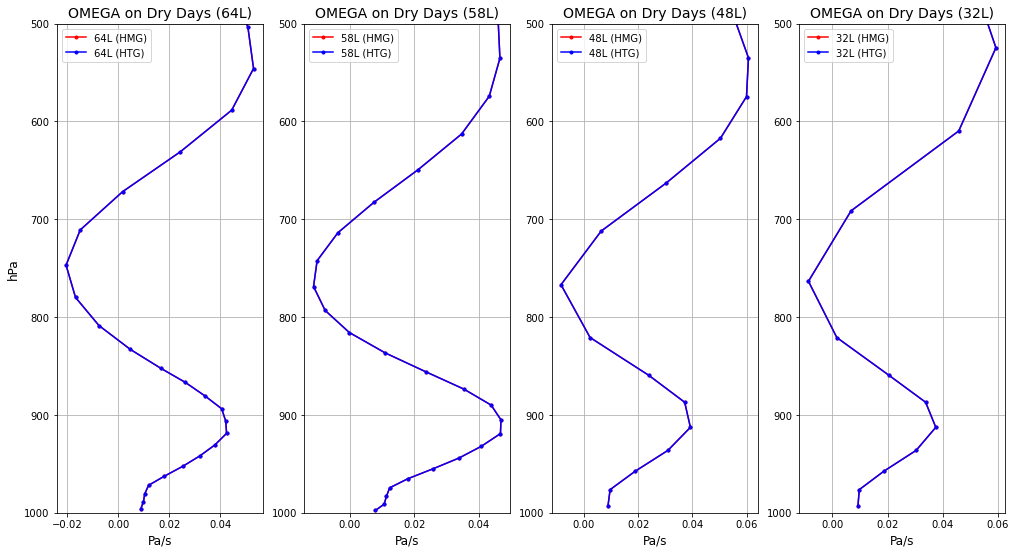

In [81]:
## Plot vertical profiles 

varSel = 'OMEGA'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HMG_64[varSel].values), 
         hourlyMean_localDryMorning_HMG_64.lev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(hourlyMean_localDryMorning_HTG_64[varSel].values), 
         hourlyMean_localDryMorning_HTG_64.lev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' on Dry Days (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HMG_58[varSel].values), 
         hourlyMean_localDryMorning_HMG_58.lev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(hourlyMean_localDryMorning_HTG_58[varSel].values), 
         hourlyMean_localDryMorning_HTG_58.lev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' on Dry Days (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HMG_48[varSel].values), 
         hourlyMean_localDryMorning_HMG_48.lev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(hourlyMean_localDryMorning_HTG_48[varSel].values), 
         hourlyMean_localDryMorning_HTG_48.lev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' on Dry Days (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HMG_32[varSel].values), 
         hourlyMean_localDryMorning_HMG_32.lev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(hourlyMean_localDryMorning_HTG_32[varSel].values), 
         hourlyMean_localDryMorning_HTG_32.lev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' on Dry Days (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

# axs[0].set_xlim([0.0, 10])
# axs[1].set_xlim([0.0, 10])
# axs[2].set_xlim([0.0, 10])
# axs[3].set_xlim([0.0, 10])



### Are there any coherent explanations for behavior?

In [47]:
## Get morning-mean arrays (8a-11a)
iMornings_HMG64 = np.where((HMGcamDS_all64_local.indexes['time'].hour>=8) & 
                           (HMGcamDS_all64_local.indexes['time'].hour<11))[0]
iMornings_HTG64 = np.where((HTGcamDS_all64_local.indexes['time'].hour>=8) & 
                           (HTGcamDS_all64_local.indexes['time'].hour<11))[0]

HMGcamDS_all64_localMorning = HMGcamDS_all64_local.isel(time=iMornings_HMG64).mean(dim='time')
HTGcamDS_all64_localMorning = HTGcamDS_all64_local.isel(time=iMornings_HTG64).mean(dim='time')


iMornings_HMG58 = np.where((HMGcamDS_all58_local.indexes['time'].hour>=8) & 
                           (HMGcamDS_all58_local.indexes['time'].hour<11))[0]
iMornings_HTG58 = np.where((HTGcamDS_all58_local.indexes['time'].hour>=8) & 
                           (HTGcamDS_all58_local.indexes['time'].hour<11))[0]

HMGcamDS_all58_localMorning = HMGcamDS_all58_local.isel(time=iMornings_HMG58).mean(dim='time')
HTGcamDS_all58_localMorning = HTGcamDS_all58_local.isel(time=iMornings_HTG58).mean(dim='time')


iMornings_HMG48 = np.where((HMGcamDS_all48_local.indexes['time'].hour>=8) & 
                           (HMGcamDS_all48_local.indexes['time'].hour<11))[0]
iMornings_HTG48 = np.where((HTGcamDS_all48_local.indexes['time'].hour>=8) & 
                           (HTGcamDS_all48_local.indexes['time'].hour<11))[0]

HMGcamDS_all48_localMorning = HMGcamDS_all48_local.isel(time=iMornings_HMG48).mean(dim='time')
HTGcamDS_all48_localMorning = HTGcamDS_all48_local.isel(time=iMornings_HTG48).mean(dim='time')



iMornings_HMG32 = np.where((HMGcamDS_all32_local.indexes['time'].hour>=8) & 
                           (HMGcamDS_all32_local.indexes['time'].hour<11))[0]
iMornings_HTG32 = np.where((HTGcamDS_all32_local.indexes['time'].hour>=8) & 
                           (HTGcamDS_all32_local.indexes['time'].hour<11))[0]

HMGcamDS_all32_localMorning = HMGcamDS_all32_local.isel(time=iMornings_HMG32).mean(dim='time')
HTGcamDS_all32_localMorning = HTGcamDS_all32_local.isel(time=iMornings_HTG32).mean(dim='time')


(0.0, 0.05)

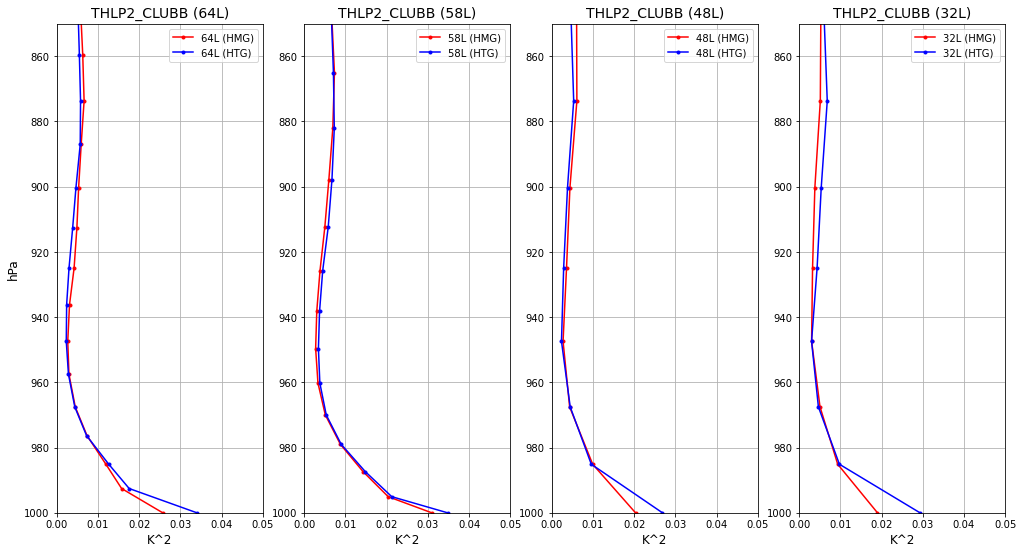

In [121]:
## Plot vertical profiles 

varSel = 'THLP2_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_xlim([0.0, 0.05])
axs[1].set_xlim([0.0, 0.05])
axs[2].set_xlim([0.0, 0.05])
axs[3].set_xlim([0.0, 0.05])


(0.0, 0.15)

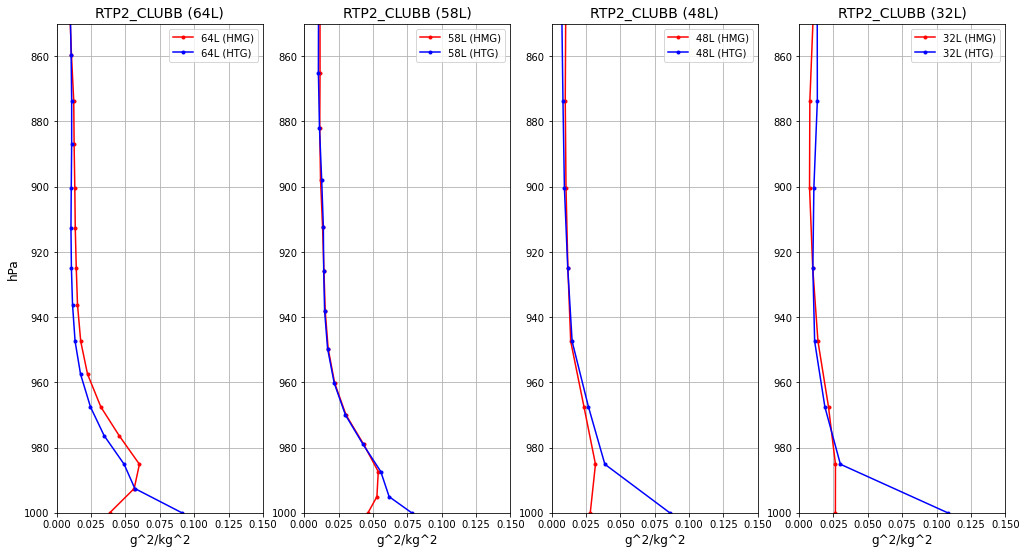

In [125]:
## Plot vertical profiles 

varSel = 'RTP2_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_xlim([0.0, 0.15])
axs[1].set_xlim([0.0, 0.15])
axs[2].set_xlim([0.0, 0.15])
axs[3].set_xlim([0.0, 0.15])

(-0.01, 0.04)

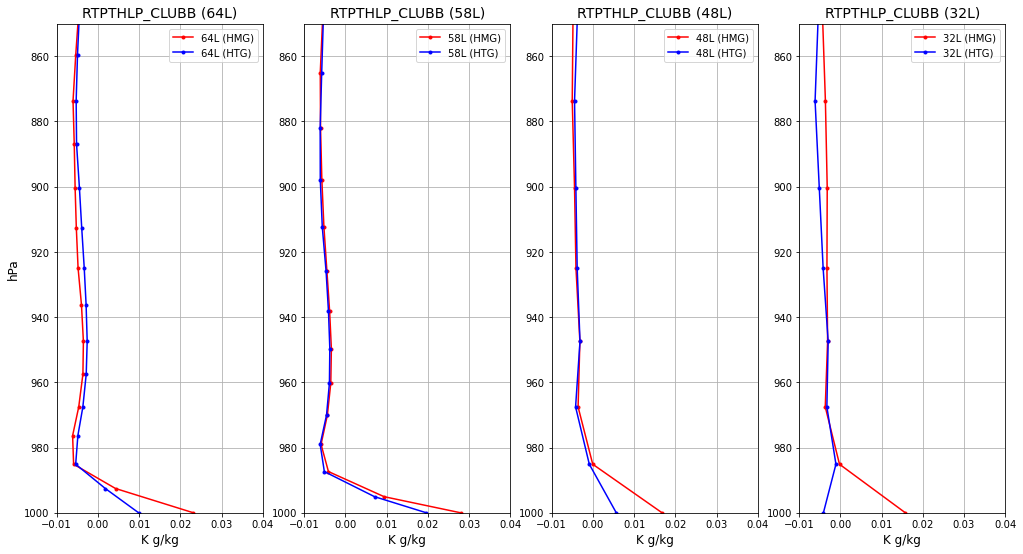

In [128]:
## Plot vertical profiles 

varSel = 'RTPTHLP_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()


axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()


axs[0].set_xlim([-0.01, 0.04])
axs[1].set_xlim([-0.01, 0.04])
axs[2].set_xlim([-0.01, 0.04])
axs[3].set_xlim([-0.01, 0.04])


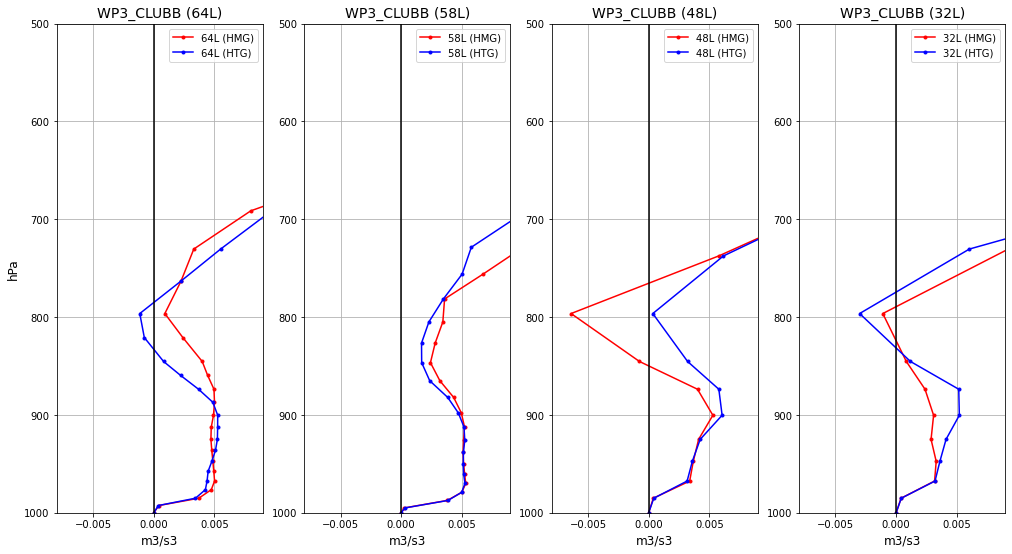

In [168]:
## Plot vertical profiles 

varSel = 'WP3_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.ilev.values,'b.-',label='48L (HTG)')
axs[2].set_ylim([850,1000])
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

# axs[0].set_ylim([1000,500])
# axs[1].set_ylim([1000,500])
# axs[2].set_ylim([1000,500])
# axs[3].set_ylim([1000,500])

# axs[0].set_xlim([-0.9e-2, 6e-2])
# axs[1].set_xlim([-0.9e-2, 6e-2])
# axs[2].set_xlim([-0.9e-2, 6e-2])
# axs[3].set_xlim([-0.9e-2, 6e-2])

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

axs[0].set_xlim([-0.008, 0.009])
axs[1].set_xlim([-0.008, 0.009])
axs[2].set_xlim([-0.008, 0.009])
axs[3].set_xlim([-0.008, 0.009])

axs[0].axvline(0, color='k')
axs[1].axvline(0, color='k')
axs[2].axvline(0, color='k')
axs[3].axvline(0, color='k')


(0.0, 0.17)

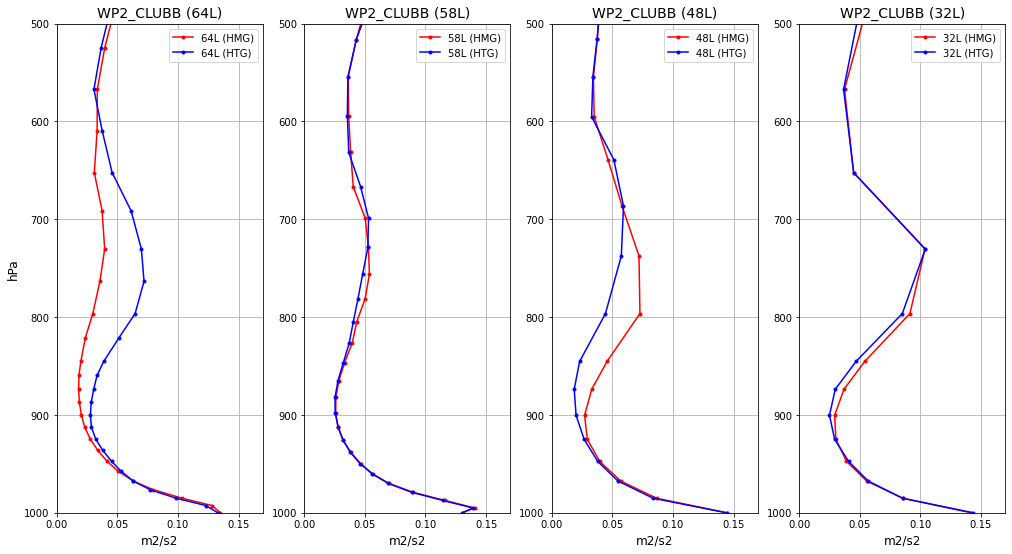

In [171]:
## Plot vertical profiles 

varSel = 'WP2_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.ilev.values,'b.-',label='48L (HTG)')
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

# axs[0].set_xlim([0, 0.2])
# axs[1].set_xlim([0, 0.2])
# axs[2].set_xlim([0, 0.2])
# axs[3].set_xlim([0, 0.2])

axs[0].set_xlim([0, 0.17])
axs[1].set_xlim([0, 0.17])
axs[2].set_xlim([0, 0.17])
axs[3].set_xlim([0, 0.17])


(0.0, 0.3)

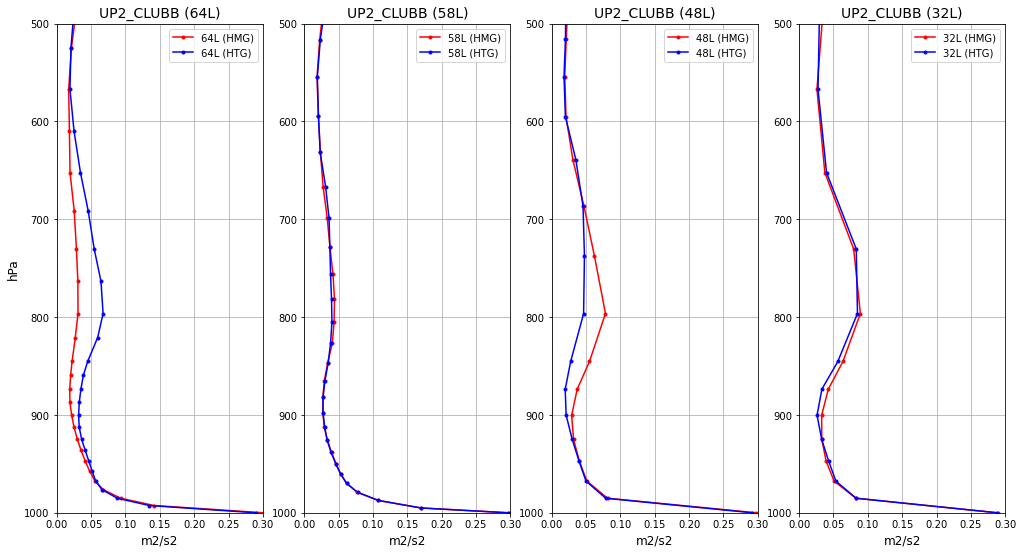

In [174]:
## Plot vertical profiles 

varSel = 'UP2_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.ilev.values,'b.-',label='48L (HTG)')
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

axs[0].set_xlim([0, 0.3])
axs[1].set_xlim([0, 0.3])
axs[2].set_xlim([0, 0.3])
axs[3].set_xlim([0, 0.3])


(0.0, 0.32)

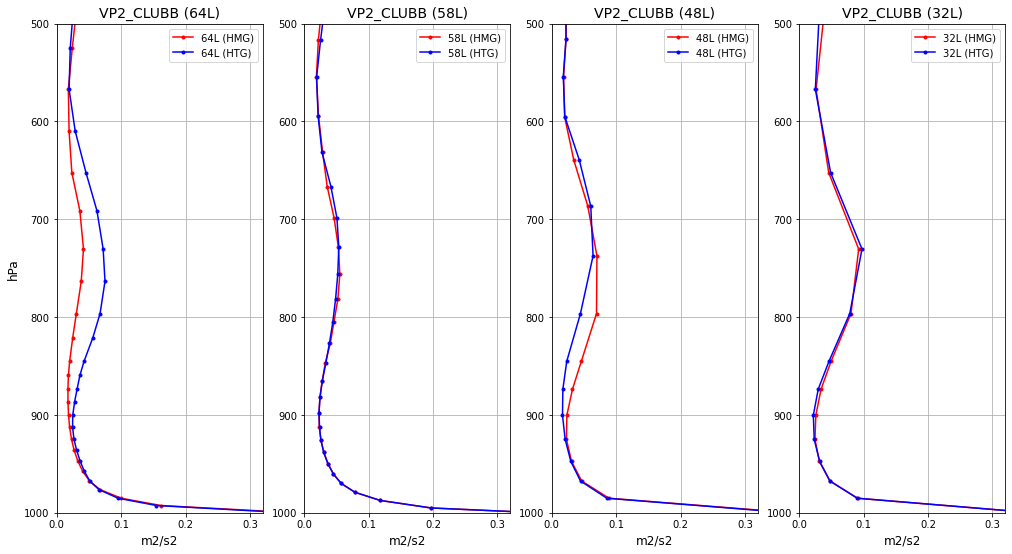

In [127]:
## Plot vertical profiles 

varSel = 'VP2_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.ilev.values,'b.-',label='48L (HTG)')
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

axs[0].set_xlim([0, 0.32])
axs[1].set_xlim([0, 0.32])
axs[2].set_xlim([0, 0.32])
axs[3].set_xlim([0, 0.32])



(-0.025, 0.065)

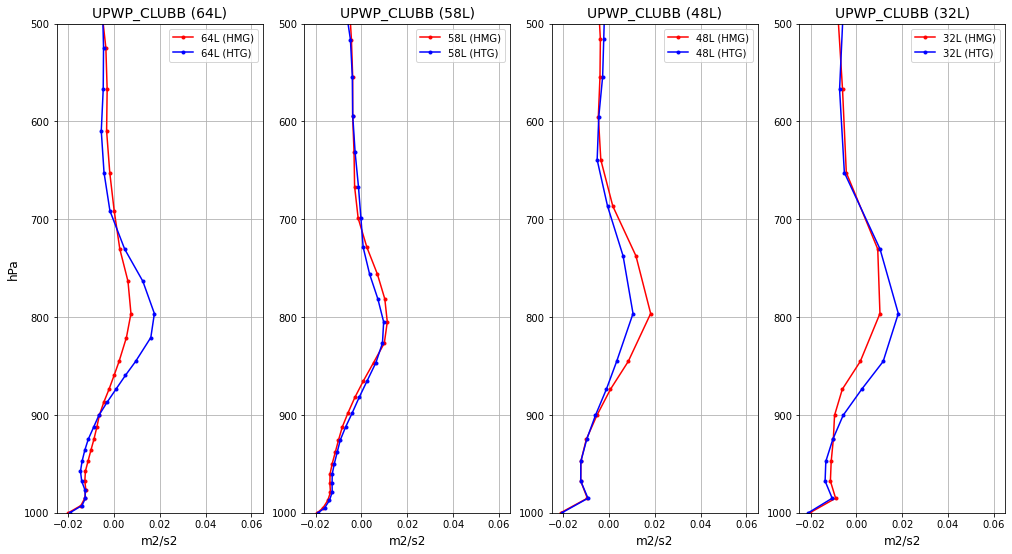

In [180]:
## Plot vertical profiles 

varSel = 'UPWP_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.ilev.values,'b.-',label='48L (HTG)')
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

axs[0].set_ylim([1000,500])
axs[1].set_ylim([1000,500])
axs[2].set_ylim([1000,500])
axs[3].set_ylim([1000,500])

# axs[0].set_xlim([-0.025, 0.023])
# axs[1].set_xlim([-0.025, 0.023])
# axs[2].set_xlim([-0.025, 0.023])
# axs[3].set_xlim([-0.025, 0.023])
axs[0].set_xlim([-0.025, 0.065])
axs[1].set_xlim([-0.025, 0.065])
axs[2].set_xlim([-0.025, 0.065])
axs[3].set_xlim([-0.025, 0.065])



(1000.0, 800.0)

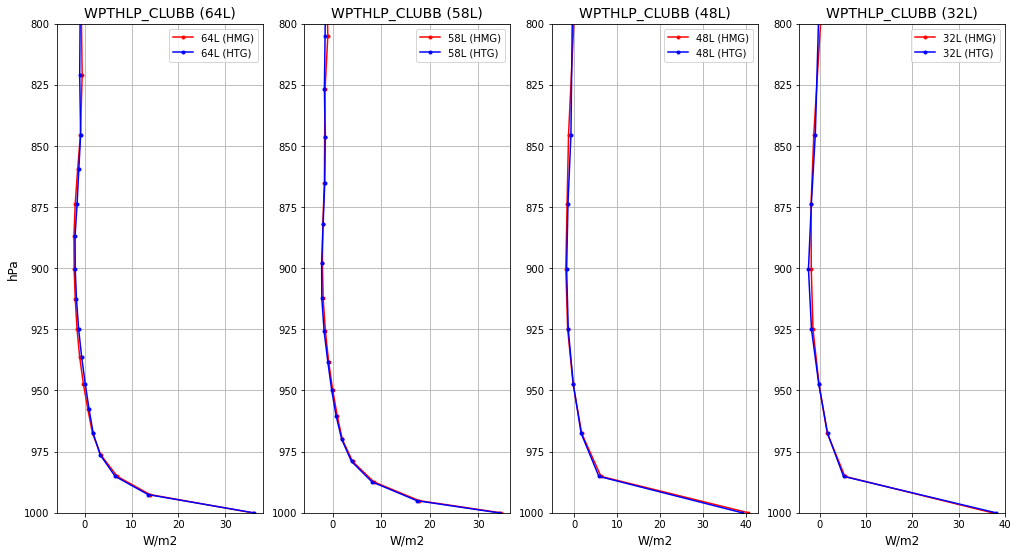

In [144]:
## Plot vertical profiles 

varSel = 'WPTHLP_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.ilev.values,'b.-',label='48L (HTG)')
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

# Not much of a difference in middle atmosphere, so reducing height to 800 hPa
axs[0].set_ylim([1000,800])
axs[1].set_ylim([1000,800])
axs[2].set_ylim([1000,800])
axs[3].set_ylim([1000,800])

# axs[0].set_xlim([-0.025, 0.023])
# axs[1].set_xlim([-0.025, 0.023])
# axs[2].set_xlim([-0.025, 0.023])
# axs[3].set_xlim([-0.025, 0.023])


(0.0, 100.0)

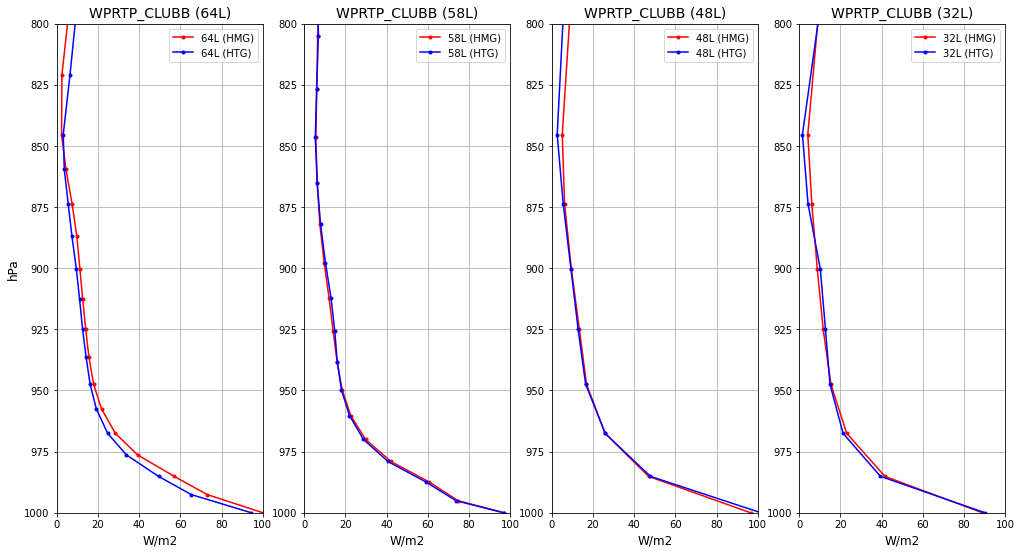

In [143]:
## Plot vertical profiles 

varSel = 'WPRTP_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.ilev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.ilev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.ilev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.ilev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.ilev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.ilev.values,'b.-',label='48L (HTG)')
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.ilev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.ilev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

# Not much of a difference in middle atmosphere, so reducing height to 800 hPa
axs[0].set_ylim([1000,800])
axs[1].set_ylim([1000,800])
axs[2].set_ylim([1000,800])
axs[3].set_ylim([1000,800])

axs[0].set_xlim([0, 100])
axs[1].set_xlim([0, 100])
axs[2].set_xlim([0, 100])
axs[3].set_xlim([0, 100])



(-2.0, 22.0)

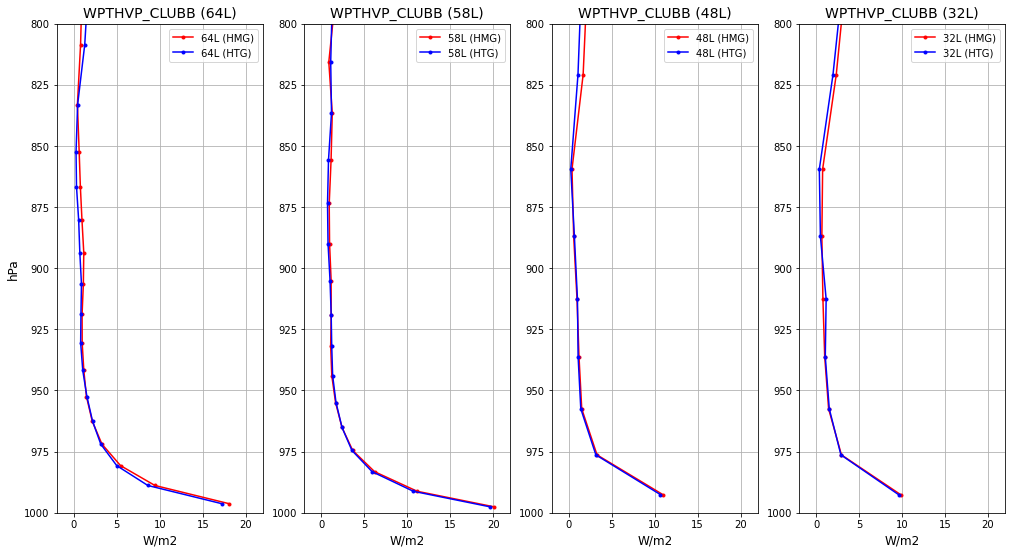

In [142]:
## Plot vertical profiles 

varSel = 'WPTHVP_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.lev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.lev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.lev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.lev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.lev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.lev.values,'b.-',label='48L (HTG)')
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.lev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.lev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

# Not much of a difference in middle atmosphere, so reducing height to 800 hPa
axs[0].set_ylim([1000,800])
axs[1].set_ylim([1000,800])
axs[2].set_ylim([1000,800])
axs[3].set_ylim([1000,800])

axs[0].set_xlim([-2,22])
axs[1].set_xlim([-2,22])
axs[2].set_xlim([-2,22])
axs[3].set_xlim([-2,22])



(1000.0, 800.0)

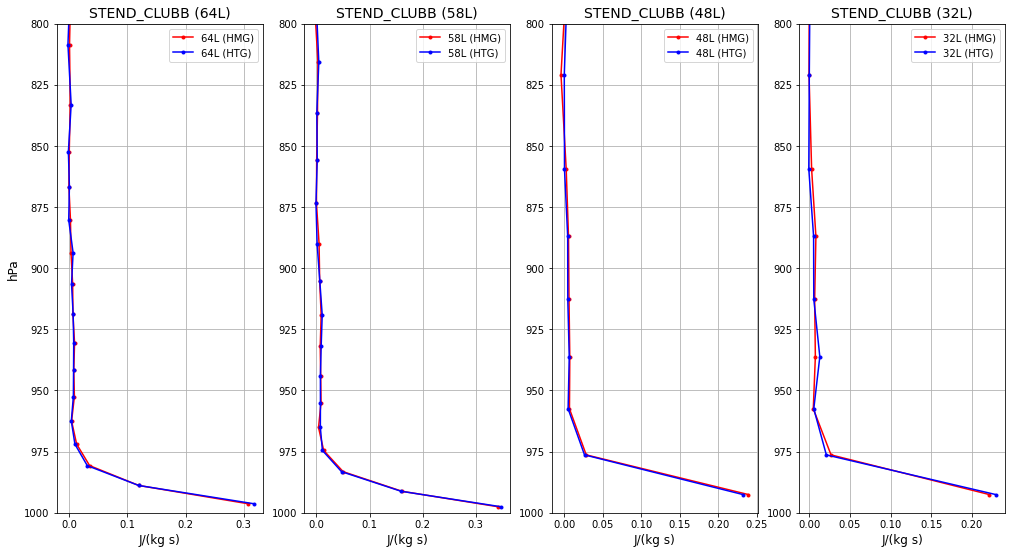

In [141]:
## Plot vertical profiles 

varSel = 'STEND_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.lev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.lev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.lev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.lev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.lev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.lev.values,'b.-',label='48L (HTG)')
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.lev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.lev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

# Not much of a difference in middle atmosphere, so reducing height to 800 hPa
axs[0].set_ylim([1000,800])
axs[1].set_ylim([1000,800])
axs[2].set_ylim([1000,800])
axs[3].set_ylim([1000,800])

# axs[0].set_xlim([-2,22])
# axs[1].set_xlim([-2,22])
# axs[2].set_xlim([-2,22])
# axs[3].set_xlim([-2,22])


(-3e-08, 2e-07)

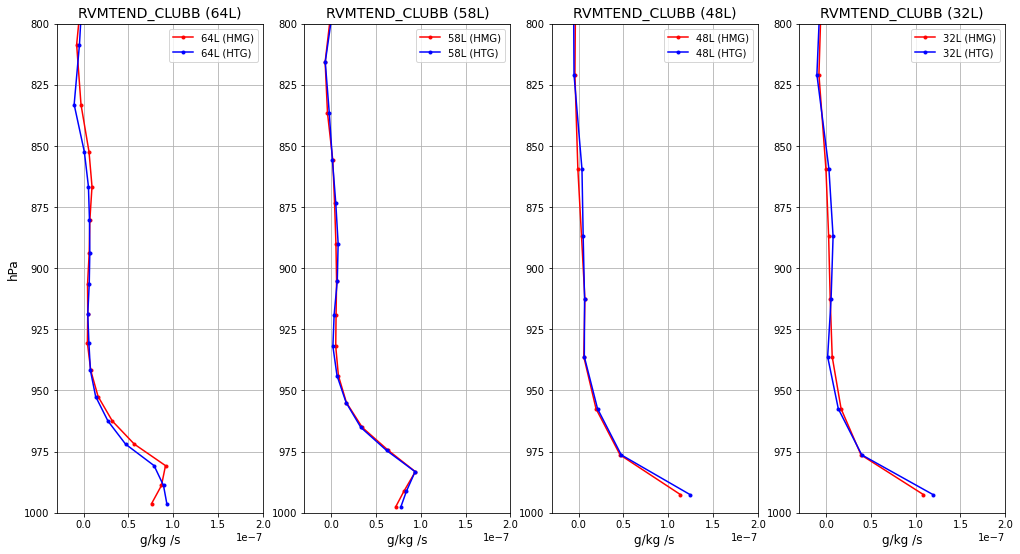

In [191]:
## Plot vertical profiles 

varSel = 'RVMTEND_CLUBB'

fig,axs = plt.subplots(1,4, figsize=(17,9))
axs = axs.ravel()

axs[0].plot(np.squeeze(HMGcamDS_all64_localMorning[varSel].values), 
         HMGcamDS_all64_localMorning.lev.values,'r.-',label='64L (HMG)')
axs[0].plot(np.squeeze(HTGcamDS_all64_localMorning[varSel].values), 
         HTGcamDS_all64_localMorning.lev.values,'b.-',label='64L (HTG)')
axs[0].set_ylim([850,1000])
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_title(varSel+' (64L)',fontsize=14)
axs[0].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[0].set_ylabel('hPa',fontsize=12)
axs[0].grid()

axs[1].plot(np.squeeze(HMGcamDS_all58_localMorning[varSel].values), 
         HMGcamDS_all58_localMorning.lev.values,'r.-',label='58L (HMG)')
axs[1].plot(np.squeeze(HTGcamDS_all58_localMorning[varSel].values), 
         HTGcamDS_all58_localMorning.lev.values,'b.-',label='58L (HTG)')
axs[1].set_ylim([850,1000])
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_title(varSel+' (58L)',fontsize=14)
axs[1].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[1].grid()

axs[2].plot(np.squeeze(HMGcamDS_all48_localMorning[varSel].values), 
         HMGcamDS_all48_localMorning.lev.values,'r.-',label='48L (HMG)')
axs[2].plot(np.squeeze(HTGcamDS_all48_localMorning[varSel].values), 
         HTGcamDS_all48_localMorning.lev.values,'b.-',label='48L (HTG)')
axs[2].invert_yaxis()
axs[2].legend()
axs[2].set_title(varSel+' (48L)',fontsize=14)
axs[2].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[2].grid()

axs[3].plot(np.squeeze(HMGcamDS_all32_localMorning[varSel].values), 
         HMGcamDS_all32_localMorning.lev.values,'r.-',label='32L (HMG)')
axs[3].plot(np.squeeze(HTGcamDS_all32_localMorning[varSel].values), 
         HTGcamDS_all32_localMorning.lev.values,'b.-',label='32L (HTG)')
axs[3].set_ylim([850,1000])
axs[3].invert_yaxis()
axs[3].legend()
axs[3].set_title(varSel+' (32L)',fontsize=14)
axs[3].set_xlabel(HMGcamDS_all64[varSel].units,fontsize=12)
axs[3].grid()

# Not much of a difference in middle atmosphere, so reducing height to 800 hPa
axs[0].set_ylim([1000,800])
axs[1].set_ylim([1000,800])
axs[2].set_ylim([1000,800])
axs[3].set_ylim([1000,800])

axs[0].set_xlim([-0.3e-7, 2e-7])
axs[1].set_xlim([-0.3e-7, 2e-7])
axs[2].set_xlim([-0.3e-7, 2e-7])
axs[3].set_xlim([-0.3e-7, 2e-7])



### Separate days based on which (HMG/HTG) has a deeper PBLH

In [ ]:
## Get morning-mean arrays (8a-11a)
iMornings_HMG64 = np.where((HMGcamDS_all64_local.indexes['time'].hour>=8) & 
                           (HMGcamDS_all64_local.indexes['time'].hour<11))[0]
iMornings_HTG64 = np.where((HTGcamDS_all64_local.indexes['time'].hour>=8) & 
                           (HTGcamDS_all64_local.indexes['time'].hour<11))[0]

HMGcamDS_all64_localMorning = HMGcamDS_all64_local.isel(time=iMornings_HMG64).groupby('month_day').mean()
HTGcamDS_all64_localMorning = HTGcamDS_all64_local.isel(time=iMornings_HTG64).groupby('month_day').mean()


iMornings_HMG58 = np.where((HMGcamDS_all58_local.indexes['time'].hour>=8) & 
                           (HMGcamDS_all58_local.indexes['time'].hour<11))[0]
iMornings_HTG58 = np.where((HTGcamDS_all58_local.indexes['time'].hour>=8) & 
                           (HTGcamDS_all58_local.indexes['time'].hour<11))[0]

HMGcamDS_all58_localMorning = HMGcamDS_all58_local.isel(time=iMornings_HMG58).groupby('month_day').mean()
HTGcamDS_all58_localMorning = HTGcamDS_all58_local.isel(time=iMornings_HTG58).groupby('month_day').mean()


iMornings_HMG48 = np.where((HMGcamDS_all48_local.indexes['time'].hour>=8) & 
                           (HMGcamDS_all48_local.indexes['time'].hour<11))[0]
iMornings_HTG48 = np.where((HTGcamDS_all48_local.indexes['time'].hour>=8) & 
                           (HTGcamDS_all48_local.indexes['time'].hour<11))[0]

HMGcamDS_all48_localMorning = HMGcamDS_all48_local.isel(time=iMornings_HMG48).groupby('month_day').mean()
HTGcamDS_all48_localMorning = HTGcamDS_all48_local.isel(time=iMornings_HTG48).groupby('month_day').mean()



In [61]:
## Add info on whether or not it's an HTG or HMG deeper PBLH day 
#   Note, first day doesn't have a morning mean (starts too late in the day, so ignore first value)

# 64 levels
HTGcamDS_all64_localMorning['PBLHmax_HTG'] = (('month_day'),HTGdeeper64[1::])
HTGcamDS_all64_localMorning['PBLHmax_HMG'] = (('month_day'),HMGdeeper64[1::])

HMGcamDS_all64_localMorning['PBLHmax_HTG'] = (('month_day'),HTGdeeper64[1::])
HMGcamDS_all64_localMorning['PBLHmax_HMG'] = (('month_day'),HMGdeeper64[1::])

HTGcamDS_all64_localMorning['PRECT_dailySum'] = (('month_day'),
                                                 np.squeeze(HTGcamDS_all64_localDailySum.PRECT_mmPerDT.values)[1::])
HMGcamDS_all64_localMorning['PRECT_dailySum'] = (('month_day'),
                                                 np.squeeze(HMGcamDS_all64_localDailySum.PRECT_mmPerDT.values)[1::])


# 58 levels
HTGcamDS_all58_localMorning['PBLHmax_HTG'] = (('month_day'),HTGdeeper58[1::])
HTGcamDS_all58_localMorning['PBLHmax_HMG'] = (('month_day'),HMGdeeper58[1::])

HMGcamDS_all58_localMorning['PBLHmax_HTG'] = (('month_day'),HTGdeeper58[1::])
HMGcamDS_all58_localMorning['PBLHmax_HMG'] = (('month_day'),HMGdeeper58[1::])

HTGcamDS_all58_localMorning['PRECT_dailySum'] = (('month_day'),
                                                 np.squeeze(HTGcamDS_all58_localDailySum.PRECT_mmPerDT.values)[1::])
HMGcamDS_all58_localMorning['PRECT_dailySum'] = (('month_day'),
                                                 np.squeeze(HMGcamDS_all58_localDailySum.PRECT_mmPerDT.values)[1::])


# 48 levels
HTGcamDS_all48_localMorning['PBLHmax_HTG'] = (('month_day'),HTGdeeper48[1::])
HTGcamDS_all48_localMorning['PBLHmax_HMG'] = (('month_day'),HMGdeeper48[1::])


HMGcamDS_all48_localMorning['PBLHmax_HTG'] = (('month_day'),HTGdeeper48[1::])
HMGcamDS_all48_localMorning['PBLHmax_HMG'] = (('month_day'),HMGdeeper48[1::])

HTGcamDS_all48_localMorning['PRECT_dailySum'] = (('month_day'),
                                                 np.squeeze(HTGcamDS_all48_localDailySum.PRECT_mmPerDT.values)[1::])
HMGcamDS_all48_localMorning['PRECT_dailySum'] = (('month_day'),
                                                 np.squeeze(HMGcamDS_all48_localDailySum.PRECT_mmPerDT.values)[1::])



In [36]:
## Select days where PBL is deeper in either HTG or HMG 

# 64 levels
HTGdeeper_64_localMorningHTG = HTGcamDS_all64_localMorning.isel(month_day = np.where(np.isfinite(HTGcamDS_all64_localMorning.PBLHmax_HTG.values))[0]).mean(dim='month_day')
HTGdeeper_64_localMorningHMG = HMGcamDS_all64_localMorning.isel(month_day = np.where(np.isfinite(HMGcamDS_all64_localMorning.PBLHmax_HTG.values))[0]).mean(dim='month_day')

HMGdeeper_64_localMorningHTG = HTGcamDS_all64_localMorning.isel(month_day = np.where(np.isfinite(HTGcamDS_all64_localMorning.PBLHmax_HMG.values))[0]).mean(dim='month_day')
HMGdeeper_64_localMorningHMG = HMGcamDS_all64_localMorning.isel(month_day = np.where(np.isfinite(HMGcamDS_all64_localMorning.PBLHmax_HMG.values))[0]).mean(dim='month_day')

allDays_64_localMorningHTG   = HTGcamDS_all64_localMorning.mean(dim='month_day')
allDays_64_localMorningHMG   = HMGcamDS_all64_localMorning.mean(dim='month_day')


# 58 levels
HTGdeeper_58_localMorningHTG = HTGcamDS_all58_localMorning.isel(month_day = np.where(np.isfinite(HTGcamDS_all58_localMorning.PBLHmax_HTG.values))[0]).mean(dim='month_day')
HTGdeeper_58_localMorningHMG = HMGcamDS_all58_localMorning.isel(month_day = np.where(np.isfinite(HMGcamDS_all58_localMorning.PBLHmax_HTG.values))[0]).mean(dim='month_day')

HMGdeeper_58_localMorningHTG = HTGcamDS_all58_localMorning.isel(month_day = np.where(np.isfinite(HTGcamDS_all58_localMorning.PBLHmax_HMG.values))[0]).mean(dim='month_day')
HMGdeeper_58_localMorningHMG = HMGcamDS_all58_localMorning.isel(month_day = np.where(np.isfinite(HMGcamDS_all58_localMorning.PBLHmax_HMG.values))[0]).mean(dim='month_day')

allDays_58_localMorningHTG   = HTGcamDS_all58_localMorning.mean(dim='month_day')
allDays_58_localMorningHMG   = HMGcamDS_all58_localMorning.mean(dim='month_day')


# 48 levels
HTGdeeper_48_localMorningHTG = HTGcamDS_all48_localMorning.isel(month_day = np.where(np.isfinite(HTGcamDS_all48_localMorning.PBLHmax_HTG.values))[0]).mean(dim='month_day')
HTGdeeper_48_localMorningHMG = HMGcamDS_all48_localMorning.isel(month_day = np.where(np.isfinite(HMGcamDS_all48_localMorning.PBLHmax_HTG.values))[0]).mean(dim='month_day')

HMGdeeper_48_localMorningHTG = HTGcamDS_all48_localMorning.isel(month_day = np.where(np.isfinite(HTGcamDS_all48_localMorning.PBLHmax_HMG.values))[0]).mean(dim='month_day')
HMGdeeper_48_localMorningHMG = HMGcamDS_all48_localMorning.isel(month_day = np.where(np.isfinite(HMGcamDS_all48_localMorning.PBLHmax_HMG.values))[0]).mean(dim='month_day')

allDays_48_localMorningHTG   = HTGcamDS_all48_localMorning.mean(dim='month_day')
allDays_48_localMorningHMG   = HMGcamDS_all48_localMorning.mean(dim='month_day')



In [37]:
## Print some means? 

print(' ------------------- CLDTOT Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.CLDTOT.values[0], 
                                               HMGdeeper_64_localMorningHTG.CLDTOT.values[0],
                                               allDays_64_localMorningHTG.CLDTOT.values[0]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.CLDTOT.values[0], 
                                               HMGdeeper_64_localMorningHMG.CLDTOT.values[0],
                                               allDays_64_localMorningHMG.CLDTOT.values[0]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.CLDTOT.values[0], 
                                               HMGdeeper_58_localMorningHTG.CLDTOT.values[0],
                                               allDays_58_localMorningHTG.CLDTOT.values[0]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.CLDTOT.values[0], 
                                               HMGdeeper_58_localMorningHMG.CLDTOT.values[0],
                                               allDays_58_localMorningHMG.CLDTOT.values[0]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.CLDTOT.values[0], 
                                               HMGdeeper_48_localMorningHTG.CLDTOT.values[0],
                                               allDays_48_localMorningHTG.CLDTOT.values[0]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.CLDTOT.values[0], 
                                               HMGdeeper_48_localMorningHMG.CLDTOT.values[0],
                                               allDays_48_localMorningHMG.CLDTOT.values[0]))
print()
print(' ------------------- CLDLOW Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.CLDLOW.values[0], 
                                               HMGdeeper_64_localMorningHTG.CLDLOW.values[0],
                                               allDays_64_localMorningHTG.CLDLOW.values[0]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.CLDLOW.values[0], 
                                               HMGdeeper_64_localMorningHMG.CLDLOW.values[0],
                                               allDays_64_localMorningHMG.CLDLOW.values[0]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.CLDLOW.values[0], 
                                               HMGdeeper_58_localMorningHTG.CLDLOW.values[0],
                                               allDays_58_localMorningHTG.CLDLOW.values[0]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.CLDLOW.values[0], 
                                               HMGdeeper_58_localMorningHMG.CLDLOW.values[0],
                                               allDays_58_localMorningHMG.CLDLOW.values[0]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.CLDLOW.values[0], 
                                               HMGdeeper_48_localMorningHTG.CLDLOW.values[0],
                                               allDays_48_localMorningHTG.CLDLOW.values[0]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.CLDLOW.values[0], 
                                               HMGdeeper_48_localMorningHMG.CLDLOW.values[0],
                                               allDays_48_localMorningHMG.CLDLOW.values[0]))

print()
print(' ------------------- CLDMED Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.CLDMED.values[0], 
                                               HMGdeeper_64_localMorningHTG.CLDMED.values[0],
                                               allDays_64_localMorningHTG.CLDMED.values[0]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.CLDMED.values[0], 
                                               HMGdeeper_64_localMorningHMG.CLDMED.values[0],
                                               allDays_64_localMorningHMG.CLDMED.values[0]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.CLDMED.values[0], 
                                               HMGdeeper_58_localMorningHTG.CLDMED.values[0],
                                               allDays_58_localMorningHTG.CLDMED.values[0]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.CLDMED.values[0], 
                                               HMGdeeper_58_localMorningHMG.CLDMED.values[0],
                                               allDays_58_localMorningHMG.CLDMED.values[0]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.CLDMED.values[0], 
                                               HMGdeeper_48_localMorningHTG.CLDMED.values[0],
                                               allDays_48_localMorningHTG.CLDMED.values[0]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.CLDMED.values[0], 
                                               HMGdeeper_48_localMorningHMG.CLDMED.values[0],
                                               allDays_48_localMorningHMG.CLDMED.values[0]))

print()
print(' ------------------- CLDHGH Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.CLDHGH.values[0], 
                                               HMGdeeper_64_localMorningHTG.CLDHGH.values[0],
                                               allDays_64_localMorningHTG.CLDHGH.values[0]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.CLDHGH.values[0], 
                                               HMGdeeper_64_localMorningHMG.CLDHGH.values[0],
                                               allDays_64_localMorningHMG.CLDHGH.values[0]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.CLDHGH.values[0], 
                                               HMGdeeper_58_localMorningHTG.CLDHGH.values[0],
                                               allDays_58_localMorningHTG.CLDHGH.values[0]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.CLDHGH.values[0], 
                                               HMGdeeper_58_localMorningHMG.CLDHGH.values[0],
                                               allDays_58_localMorningHMG.CLDHGH.values[0]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.CLDHGH.values[0], 
                                               HMGdeeper_48_localMorningHTG.CLDHGH.values[0],
                                               allDays_48_localMorningHTG.CLDHGH.values[0]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.CLDHGH.values[0], 
                                               HMGdeeper_48_localMorningHMG.CLDHGH.values[0],
                                               allDays_48_localMorningHMG.CLDHGH.values[0]))

print()
print(' ------------------- TGCLDLWP Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.TGCLDLWP.values[0], 
                                               HMGdeeper_64_localMorningHTG.TGCLDLWP.values[0],
                                               allDays_64_localMorningHTG.TGCLDLWP.values[0]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.TGCLDLWP.values[0], 
                                               HMGdeeper_64_localMorningHMG.TGCLDLWP.values[0],
                                               allDays_64_localMorningHMG.TGCLDLWP.values[0]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.TGCLDLWP.values[0], 
                                               HMGdeeper_58_localMorningHTG.TGCLDLWP.values[0],
                                               allDays_58_localMorningHTG.TGCLDLWP.values[0]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.TGCLDLWP.values[0], 
                                               HMGdeeper_58_localMorningHMG.TGCLDLWP.values[0],
                                               allDays_58_localMorningHMG.TGCLDLWP.values[0]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.TGCLDLWP.values[0], 
                                               HMGdeeper_48_localMorningHTG.TGCLDLWP.values[0],
                                               allDays_48_localMorningHTG.TGCLDLWP.values[0]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.TGCLDLWP.values[0], 
                                               HMGdeeper_48_localMorningHMG.TGCLDLWP.values[0],
                                               allDays_48_localMorningHMG.TGCLDLWP.values[0]))


 ------------------- CLDTOT Morning Mean ------------------- 
             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days
64L (HTG):          0.999                     0.999                     0.964
64L (HMG):          0.998                     0.994                     0.936

58L (HTG):          0.855                     0.999                     0.905
58L (HMG):          0.849                     0.999                     0.962

48L (HTG):          1.000                     0.991                     0.927
48L (HMG):          1.000                     0.909                     0.960

 ------------------- CLDLOW Morning Mean ------------------- 
             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days
64L (HTG):          0.217                     0.015                     0.137
64L (HMG):          0.005                     0.029                     0.090

58L (HTG):          0.041                     0.165                     0.077
58L (HMG):

In [38]:
print(' ------------------- SHFLX Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.SHFLX.values[0], 
                                               HMGdeeper_64_localMorningHTG.SHFLX.values[0],
                                               allDays_64_localMorningHTG.SHFLX.values[0]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.SHFLX.values[0], 
                                               HMGdeeper_64_localMorningHMG.SHFLX.values[0],
                                               allDays_64_localMorningHMG.SHFLX.values[0]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.SHFLX.values[0], 
                                               HMGdeeper_58_localMorningHTG.SHFLX.values[0],
                                               allDays_58_localMorningHTG.SHFLX.values[0]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.SHFLX.values[0], 
                                               HMGdeeper_58_localMorningHMG.SHFLX.values[0],
                                               allDays_58_localMorningHMG.SHFLX.values[0]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.SHFLX.values[0], 
                                               HMGdeeper_48_localMorningHTG.SHFLX.values[0],
                                               allDays_48_localMorningHTG.SHFLX.values[0]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.SHFLX.values[0], 
                                               HMGdeeper_48_localMorningHMG.SHFLX.values[0],
                                               allDays_48_localMorningHMG.SHFLX.values[0]))
print()

print(' ------------------- LHFLX Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.LHFLX.values[0], 
                                               HMGdeeper_64_localMorningHTG.LHFLX.values[0],
                                               allDays_64_localMorningHTG.LHFLX.values[0]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.LHFLX.values[0], 
                                               HMGdeeper_64_localMorningHMG.LHFLX.values[0],
                                               allDays_64_localMorningHMG.LHFLX.values[0]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.LHFLX.values[0], 
                                               HMGdeeper_58_localMorningHTG.LHFLX.values[0],
                                               allDays_58_localMorningHTG.LHFLX.values[0]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.LHFLX.values[0], 
                                               HMGdeeper_58_localMorningHMG.LHFLX.values[0],
                                               allDays_58_localMorningHMG.LHFLX.values[0]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.LHFLX.values[0], 
                                               HMGdeeper_48_localMorningHTG.LHFLX.values[0],
                                               allDays_48_localMorningHTG.LHFLX.values[0]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.LHFLX.values[0], 
                                               HMGdeeper_48_localMorningHMG.LHFLX.values[0],
                                               allDays_48_localMorningHMG.LHFLX.values[0]))
print()



print(' ------------------- EF Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.LHFLX.values[0]/(HTGdeeper_64_localMorningHTG.LHFLX.values[0]+HTGdeeper_64_localMorningHTG.SHFLX.values[0]), 
                                               HMGdeeper_64_localMorningHTG.LHFLX.values[0]/(HMGdeeper_64_localMorningHTG.LHFLX.values[0]+HMGdeeper_64_localMorningHTG.SHFLX.values[0]),
                                               allDays_64_localMorningHTG.LHFLX.values[0]/(allDays_64_localMorningHTG.LHFLX.values[0]+allDays_64_localMorningHTG.SHFLX.values[0])))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.LHFLX.values[0]/(HTGdeeper_64_localMorningHMG.LHFLX.values[0]+HTGdeeper_64_localMorningHMG.SHFLX.values[0]), 
                                               HMGdeeper_64_localMorningHMG.LHFLX.values[0]/(HMGdeeper_64_localMorningHMG.LHFLX.values[0]+HMGdeeper_64_localMorningHMG.SHFLX.values[0]),
                                               allDays_64_localMorningHMG.LHFLX.values[0]/(allDays_64_localMorningHMG.LHFLX.values[0]+allDays_64_localMorningHMG.SHFLX.values[0])))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.LHFLX.values[0]/(HTGdeeper_58_localMorningHTG.LHFLX.values[0]+HTGdeeper_58_localMorningHTG.SHFLX.values[0]), 
                                               HMGdeeper_58_localMorningHTG.LHFLX.values[0]/(HMGdeeper_58_localMorningHTG.LHFLX.values[0]+HMGdeeper_58_localMorningHTG.SHFLX.values[0]),
                                               allDays_58_localMorningHTG.LHFLX.values[0]/(allDays_58_localMorningHTG.LHFLX.values[0]+allDays_58_localMorningHTG.SHFLX.values[0])))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.LHFLX.values[0]/(HTGdeeper_58_localMorningHMG.LHFLX.values[0]+HTGdeeper_58_localMorningHMG.SHFLX.values[0]), 
                                               HMGdeeper_58_localMorningHMG.LHFLX.values[0]/(HMGdeeper_58_localMorningHMG.LHFLX.values[0]+HMGdeeper_58_localMorningHMG.SHFLX.values[0]),
                                               allDays_58_localMorningHMG.LHFLX.values[0]/(allDays_58_localMorningHMG.LHFLX.values[0]+allDays_58_localMorningHMG.SHFLX.values[0])))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.LHFLX.values[0]/(HTGdeeper_48_localMorningHTG.LHFLX.values[0]+HTGdeeper_48_localMorningHTG.SHFLX.values[0]), 
                                               HMGdeeper_48_localMorningHTG.LHFLX.values[0]/(HMGdeeper_48_localMorningHTG.LHFLX.values[0]+HMGdeeper_48_localMorningHTG.SHFLX.values[0]),
                                               allDays_48_localMorningHTG.LHFLX.values[0]/(allDays_48_localMorningHTG.LHFLX.values[0]+allDays_48_localMorningHTG.SHFLX.values[0])))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.LHFLX.values[0]/(HTGdeeper_48_localMorningHMG.LHFLX.values[0]+HTGdeeper_48_localMorningHMG.SHFLX.values[0]), 
                                               HMGdeeper_48_localMorningHMG.LHFLX.values[0]/(HMGdeeper_48_localMorningHMG.LHFLX.values[0]+HMGdeeper_48_localMorningHMG.SHFLX.values[0]),
                                               allDays_48_localMorningHMG.LHFLX.values[0]/(allDays_48_localMorningHMG.LHFLX.values[0]+allDays_48_localMorningHMG.SHFLX.values[0])))
print()



 ------------------- SHFLX Morning Mean ------------------- 
             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days
64L (HTG):         -4.888                     9.202                     7.893
64L (HMG):         -8.645                    13.435                     7.499

58L (HTG):         15.196                     2.667                     8.498
58L (HMG):         13.796                     5.643                    10.910

48L (HTG):          4.026                     4.160                    10.366
48L (HMG):          3.511                    11.149                    10.737

 ------------------- LHFLX Morning Mean ------------------- 
             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days
64L (HTG):         54.054                    81.274                    73.672
64L (HMG):         49.680                    78.909                    68.404

58L (HTG):         75.575                    76.885                    79.592
58L (HMG):  

In [39]:
print(' ------------------- ZETA Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.ZETA_CLM.values[0], 
                                               HMGdeeper_64_localMorningHTG.ZETA_CLM.values[0],
                                               allDays_64_localMorningHTG.ZETA_CLM.values[0]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.ZETA_CLM.values[0], 
                                               HMGdeeper_64_localMorningHMG.ZETA_CLM.values[0],
                                               allDays_64_localMorningHMG.ZETA_CLM.values[0]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.ZETA_CLM.values[0], 
                                               HMGdeeper_58_localMorningHTG.ZETA_CLM.values[0],
                                               allDays_58_localMorningHTG.ZETA_CLM.values[0]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.ZETA_CLM.values[0], 
                                               HMGdeeper_58_localMorningHMG.ZETA_CLM.values[0],
                                               allDays_58_localMorningHMG.ZETA_CLM.values[0]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.ZETA_CLM.values[0], 
                                               HMGdeeper_48_localMorningHTG.ZETA_CLM.values[0],
                                               allDays_48_localMorningHTG.ZETA_CLM.values[0]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.ZETA_CLM.values[0], 
                                               HMGdeeper_48_localMorningHMG.ZETA_CLM.values[0],
                                               allDays_48_localMorningHMG.ZETA_CLM.values[0]))
print()

print(' ------------------- USTAR Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.USTAR_CLM.values[0], 
                                               HMGdeeper_64_localMorningHTG.USTAR_CLM.values[0],
                                               allDays_64_localMorningHTG.USTAR_CLM.values[0]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.USTAR_CLM.values[0], 
                                               HMGdeeper_64_localMorningHMG.USTAR_CLM.values[0],
                                               allDays_64_localMorningHMG.USTAR_CLM.values[0]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.USTAR_CLM.values[0], 
                                               HMGdeeper_58_localMorningHTG.USTAR_CLM.values[0],
                                               allDays_58_localMorningHTG.USTAR_CLM.values[0]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.USTAR_CLM.values[0], 
                                               HMGdeeper_58_localMorningHMG.USTAR_CLM.values[0],
                                               allDays_58_localMorningHMG.USTAR_CLM.values[0]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.USTAR_CLM.values[0], 
                                               HMGdeeper_48_localMorningHTG.USTAR_CLM.values[0],
                                               allDays_48_localMorningHTG.USTAR_CLM.values[0]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.USTAR_CLM.values[0], 
                                               HMGdeeper_48_localMorningHMG.USTAR_CLM.values[0],
                                               allDays_48_localMorningHMG.USTAR_CLM.values[0]))
print()

print(' ------------------- WSTAR Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.WSTAR_CLM.values[0], 
                                               HMGdeeper_64_localMorningHTG.WSTAR_CLM.values[0],
                                               allDays_64_localMorningHTG.WSTAR_CLM.values[0]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.WSTAR_CLM.values[0], 
                                               HMGdeeper_64_localMorningHMG.WSTAR_CLM.values[0],
                                               allDays_64_localMorningHMG.WSTAR_CLM.values[0]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.WSTAR_CLM.values[0], 
                                               HMGdeeper_58_localMorningHTG.WSTAR_CLM.values[0],
                                               allDays_58_localMorningHTG.WSTAR_CLM.values[0]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.WSTAR_CLM.values[0], 
                                               HMGdeeper_58_localMorningHMG.WSTAR_CLM.values[0],
                                               allDays_58_localMorningHMG.WSTAR_CLM.values[0]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.WSTAR_CLM.values[0], 
                                               HMGdeeper_48_localMorningHTG.WSTAR_CLM.values[0],
                                               allDays_48_localMorningHTG.WSTAR_CLM.values[0]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.WSTAR_CLM.values[0], 
                                               HMGdeeper_48_localMorningHMG.WSTAR_CLM.values[0],
                                               allDays_48_localMorningHMG.WSTAR_CLM.values[0]))
print()


 ------------------- ZETA Morning Mean ------------------- 
             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days
64L (HTG):         -0.107                    -2.943                    -1.538
64L (HMG):          0.162                    -2.920                    -1.445

58L (HTG):         -1.200                    -1.242                    -1.104
58L (HMG):         -1.154                    -1.337                    -1.177

48L (HTG):         -1.762                    -1.425                    -4.051
48L (HMG):         -1.388                    -2.793                    -4.787

 ------------------- USTAR Morning Mean ------------------- 
             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days
64L (HTG):          0.081                     0.110                     0.104
64L (HMG):          0.080                     0.113                     0.104

58L (HTG):          0.088                     0.116                     0.105
58L (HMG):   

In [40]:
print(' ------------------- THLP2 (sfc) Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.THLP2_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHTG.THLP2_CLUBB.values[-1],
                                               allDays_64_localMorningHTG.THLP2_CLUBB.values[-1]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.THLP2_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHMG.THLP2_CLUBB.values[-1],
                                               allDays_64_localMorningHMG.THLP2_CLUBB.values[-1]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.THLP2_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHTG.THLP2_CLUBB.values[-1],
                                               allDays_58_localMorningHTG.THLP2_CLUBB.values[-1]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.THLP2_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHMG.THLP2_CLUBB.values[-1],
                                               allDays_58_localMorningHMG.THLP2_CLUBB.values[-1]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.THLP2_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHTG.THLP2_CLUBB.values[-1],
                                               allDays_48_localMorningHTG.THLP2_CLUBB.values[-1]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.THLP2_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHMG.THLP2_CLUBB.values[-1],
                                               allDays_48_localMorningHMG.THLP2_CLUBB.values[-1]))
print()

print(' ------------------- RTP2 (sfc) Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.RTP2_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHTG.RTP2_CLUBB.values[-1],
                                               allDays_64_localMorningHTG.RTP2_CLUBB.values[-1]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.RTP2_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHMG.RTP2_CLUBB.values[-1],
                                               allDays_64_localMorningHMG.RTP2_CLUBB.values[-1]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.RTP2_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHTG.RTP2_CLUBB.values[-1],
                                               allDays_58_localMorningHTG.RTP2_CLUBB.values[-1]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.RTP2_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHMG.RTP2_CLUBB.values[-1],
                                               allDays_58_localMorningHMG.RTP2_CLUBB.values[-1]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.RTP2_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHTG.RTP2_CLUBB.values[-1],
                                               allDays_48_localMorningHTG.RTP2_CLUBB.values[-1]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.RTP2_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHMG.RTP2_CLUBB.values[-1],
                                               allDays_48_localMorningHMG.RTP2_CLUBB.values[-1]))
print()

print(' ------------------- RTPTHLP (sfc) Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.RTPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHTG.RTPTHLP_CLUBB.values[-1],
                                               allDays_64_localMorningHTG.RTPTHLP_CLUBB.values[-1]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.RTPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHMG.RTPTHLP_CLUBB.values[-1],
                                               allDays_64_localMorningHMG.RTPTHLP_CLUBB.values[-1]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.RTPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHTG.RTPTHLP_CLUBB.values[-1],
                                               allDays_58_localMorningHTG.RTPTHLP_CLUBB.values[-1]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.RTPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHMG.RTPTHLP_CLUBB.values[-1],
                                               allDays_58_localMorningHMG.RTPTHLP_CLUBB.values[-1]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.RTPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHTG.RTPTHLP_CLUBB.values[-1],
                                               allDays_48_localMorningHTG.RTPTHLP_CLUBB.values[-1]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.RTPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHMG.RTPTHLP_CLUBB.values[-1],
                                               allDays_48_localMorningHMG.RTPTHLP_CLUBB.values[-1]))
print()




print(' ------------------- WP2 (sfc) Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.WP2_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHTG.WP2_CLUBB.values[-1],
                                               allDays_64_localMorningHTG.WP2_CLUBB.values[-1]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.WP2_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHMG.WP2_CLUBB.values[-1],
                                               allDays_64_localMorningHMG.WP2_CLUBB.values[-1]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.WP2_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHTG.WP2_CLUBB.values[-1],
                                               allDays_58_localMorningHTG.WP2_CLUBB.values[-1]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.WP2_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHMG.WP2_CLUBB.values[-1],
                                               allDays_58_localMorningHMG.WP2_CLUBB.values[-1]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.WP2_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHTG.WP2_CLUBB.values[-1],
                                               allDays_48_localMorningHTG.WP2_CLUBB.values[-1]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.WP2_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHMG.WP2_CLUBB.values[-1],
                                               allDays_48_localMorningHMG.WP2_CLUBB.values[-1]))
print()


print(' ------------------- WP3 (sfc) Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3e %25.3e %25.3e' % (HTGdeeper_64_localMorningHTG.WP3_CLUBB.values[-2], 
                                               HMGdeeper_64_localMorningHTG.WP3_CLUBB.values[-2],
                                               allDays_64_localMorningHTG.WP3_CLUBB.values[-2]))
print('64L (HMG):     %10.3e %25.3e %25.3e' % (HTGdeeper_64_localMorningHMG.WP3_CLUBB.values[-2], 
                                               HMGdeeper_64_localMorningHMG.WP3_CLUBB.values[-2],
                                               allDays_64_localMorningHMG.WP3_CLUBB.values[-2]))
print()
print('58L (HTG):     %10.3e %25.3e %25.3e' % (HTGdeeper_58_localMorningHTG.WP3_CLUBB.values[-2], 
                                               HMGdeeper_58_localMorningHTG.WP3_CLUBB.values[-2],
                                               allDays_58_localMorningHTG.WP3_CLUBB.values[-2]))
print('58L (HMG):     %10.3e %25.3e %25.3e' % (HTGdeeper_58_localMorningHMG.WP3_CLUBB.values[-2], 
                                               HMGdeeper_58_localMorningHMG.WP3_CLUBB.values[-2],
                                               allDays_58_localMorningHMG.WP3_CLUBB.values[-2]))

print()
print('48L (HTG):     %10.3e %25.3e %25.3e' % (HTGdeeper_48_localMorningHTG.WP3_CLUBB.values[-2], 
                                               HMGdeeper_48_localMorningHTG.WP3_CLUBB.values[-2],
                                               allDays_48_localMorningHTG.WP3_CLUBB.values[-2]))
print('48L (HMG):     %10.3e %25.3e %25.3e' % (HTGdeeper_48_localMorningHMG.WP3_CLUBB.values[-2], 
                                               HMGdeeper_48_localMorningHMG.WP3_CLUBB.values[-2],
                                               allDays_48_localMorningHMG.WP3_CLUBB.values[-2]))
print()


print(' ------------------- WPTHVP (sfc) Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.WPTHVP_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHTG.WPTHVP_CLUBB.values[-1],
                                               allDays_64_localMorningHTG.WPTHVP_CLUBB.values[-1]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.WPTHVP_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHMG.WPTHVP_CLUBB.values[-1],
                                               allDays_64_localMorningHMG.WPTHVP_CLUBB.values[-1]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.WPTHVP_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHTG.WPTHVP_CLUBB.values[-1],
                                               allDays_58_localMorningHTG.WPTHVP_CLUBB.values[-1]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.WPTHVP_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHMG.WPTHVP_CLUBB.values[-1],
                                               allDays_58_localMorningHMG.WPTHVP_CLUBB.values[-1]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.WPTHVP_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHTG.WPTHVP_CLUBB.values[-1],
                                               allDays_48_localMorningHTG.WPTHVP_CLUBB.values[-1]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.WPTHVP_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHMG.WPTHVP_CLUBB.values[-1],
                                               allDays_48_localMorningHMG.WPTHVP_CLUBB.values[-1]))
print()


print(' ------------------- WPTHLP (sfc) Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.WPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHTG.WPTHLP_CLUBB.values[-1],
                                               allDays_64_localMorningHTG.WPTHLP_CLUBB.values[-1]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.WPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHMG.WPTHLP_CLUBB.values[-1],
                                               allDays_64_localMorningHMG.WPTHLP_CLUBB.values[-1]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.WPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHTG.WPTHLP_CLUBB.values[-1],
                                               allDays_58_localMorningHTG.WPTHLP_CLUBB.values[-1]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.WPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHMG.WPTHLP_CLUBB.values[-1],
                                               allDays_58_localMorningHMG.WPTHLP_CLUBB.values[-1]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.WPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHTG.WPTHLP_CLUBB.values[-1],
                                               allDays_48_localMorningHTG.WPTHLP_CLUBB.values[-1]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.WPTHLP_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHMG.WPTHLP_CLUBB.values[-1],
                                               allDays_48_localMorningHMG.WPTHLP_CLUBB.values[-1]))
print()


print(' ------------------- WPRTP (sfc) Morning Mean ------------------- ')
print('             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days')
print('64L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHTG.WPRTP_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHTG.WPRTP_CLUBB.values[-1],
                                               allDays_64_localMorningHTG.WPRTP_CLUBB.values[-1]))
print('64L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_64_localMorningHMG.WPRTP_CLUBB.values[-1], 
                                               HMGdeeper_64_localMorningHMG.WPRTP_CLUBB.values[-1],
                                               allDays_64_localMorningHMG.WPRTP_CLUBB.values[-1]))
print()
print('58L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHTG.WPRTP_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHTG.WPRTP_CLUBB.values[-1],
                                               allDays_58_localMorningHTG.WPRTP_CLUBB.values[-1]))
print('58L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_58_localMorningHMG.WPRTP_CLUBB.values[-1], 
                                               HMGdeeper_58_localMorningHMG.WPRTP_CLUBB.values[-1],
                                               allDays_58_localMorningHMG.WPRTP_CLUBB.values[-1]))

print()
print('48L (HTG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHTG.WPRTP_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHTG.WPRTP_CLUBB.values[-1],
                                               allDays_48_localMorningHTG.WPRTP_CLUBB.values[-1]))
print('48L (HMG):     %10.3f %25.3f %25.3f' % (HTGdeeper_48_localMorningHMG.WPRTP_CLUBB.values[-1], 
                                               HMGdeeper_48_localMorningHMG.WPRTP_CLUBB.values[-1],
                                               allDays_48_localMorningHMG.WPRTP_CLUBB.values[-1]))
print()

 ------------------- THLP2 (sfc) Morning Mean ------------------- 
             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days
64L (HTG):          0.142                     0.014                     0.054
64L (HMG):          0.118                     0.013                     0.046

58L (HTG):          0.024                     0.091                     0.053
58L (HMG):          0.020                     0.079                     0.046

48L (HTG):          0.004                     0.120                     0.072
48L (HMG):          0.004                     0.102                     0.059

 ------------------- RTP2 (sfc) Morning Mean ------------------- 
             Days with HTG-deeper PBL     Days with HMG-deeper PBL     All days
64L (HTG):          0.258                     0.145                     0.383
64L (HMG):          0.126                     0.060                     0.195

58L (HTG):          0.096                     0.256                     0.516
5

Text(0.5, 1.0, 'Temperature')

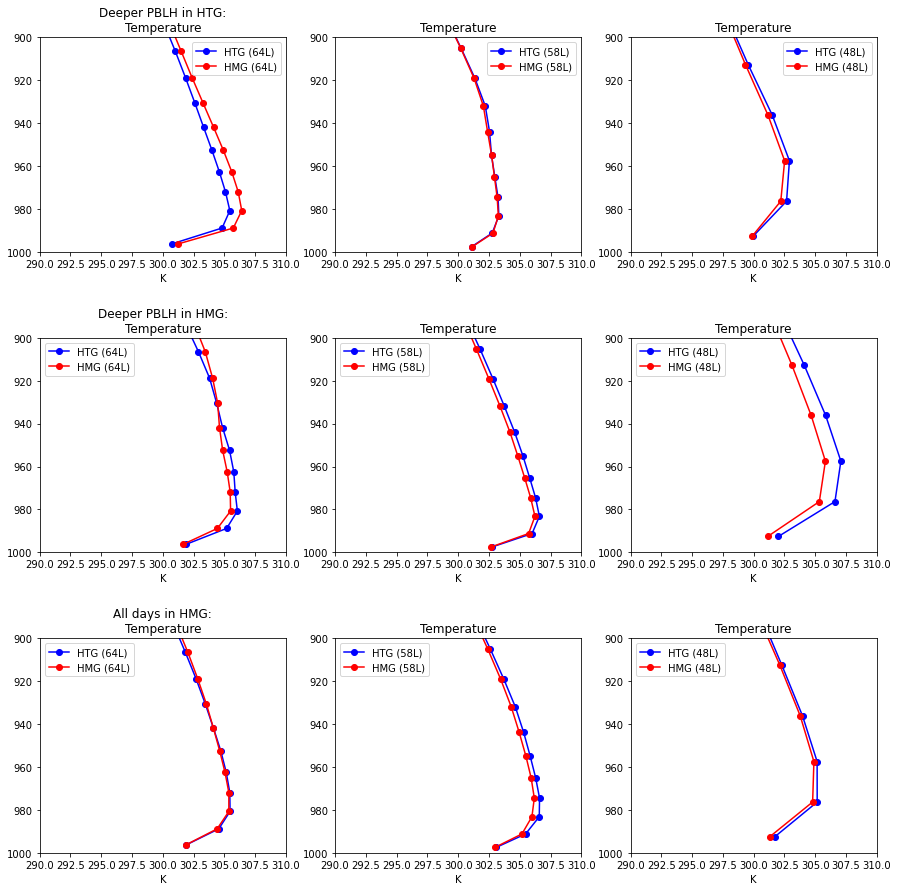

In [42]:
# Set variable of interest 
atmVar = 'T'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([290,310])
axs[1].set_xlim([290,310])
axs[2].set_xlim([290,310])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([290,310])
axs[4].set_xlim([290,310])
axs[5].set_xlim([290,310])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)


##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([290,310])
axs[7].set_xlim([290,310])
axs[8].set_xlim([290,310])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)



Text(0.5, 1.0, 'Specific humidity')

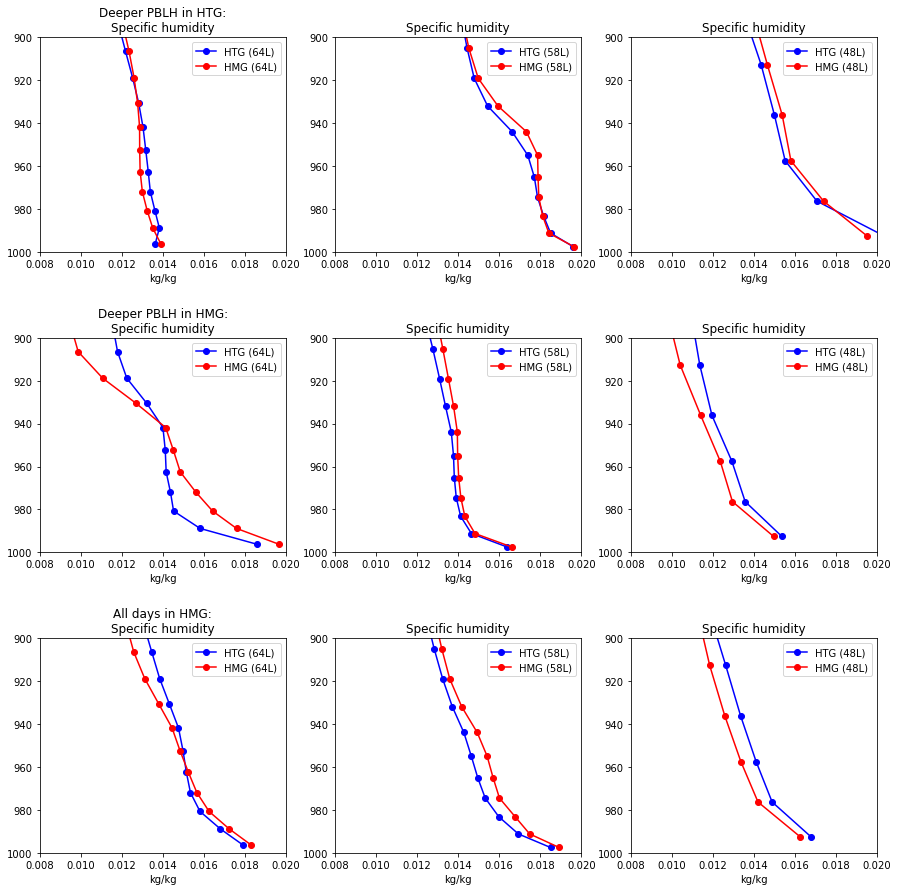

In [43]:
# Set variable of interest 
atmVar = 'Q'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([0.008,0.020])
axs[1].set_xlim([0.008,0.020])
axs[2].set_xlim([0.008,0.020])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([0.008,0.020])
axs[4].set_xlim([0.008,0.020])
axs[5].set_xlim([0.008,0.020])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)


##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([0.008,0.020])
axs[7].set_xlim([0.008,0.020])
axs[8].set_xlim([0.008,0.020])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)



Text(0.5, 1.0, 'Third Moment Vertical Velocity')

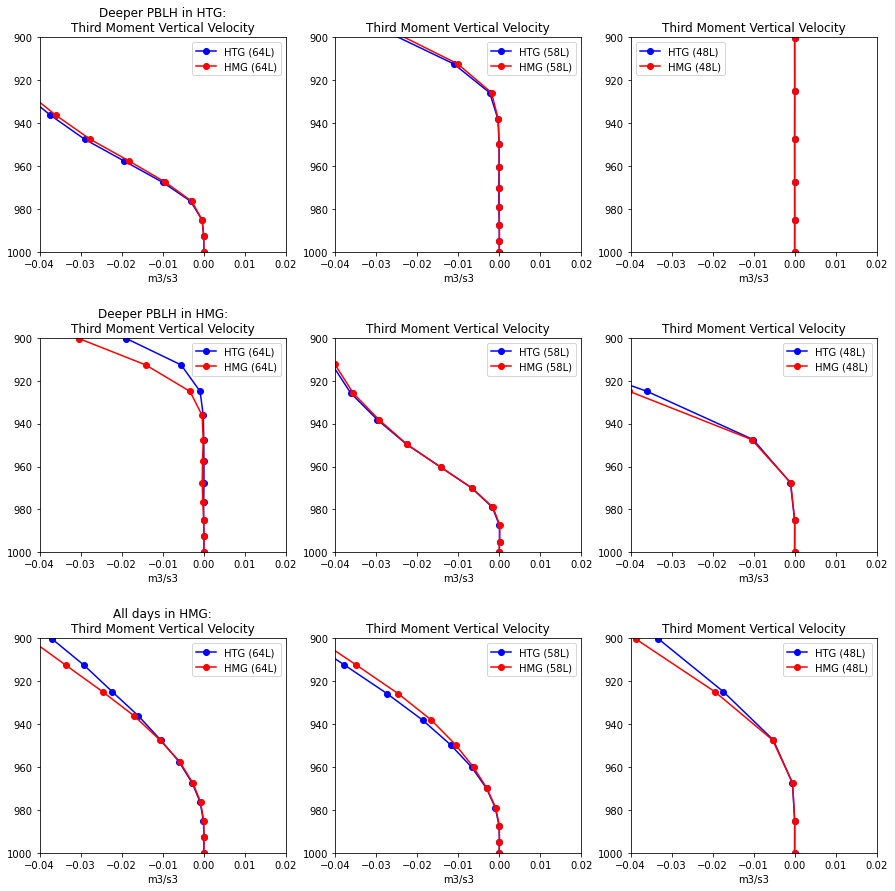

In [45]:
# Set variable of interest 
atmVar = 'WP3_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([-0.04,0.02])
axs[1].set_xlim([-0.04,0.02])
axs[2].set_xlim([-0.04,0.02])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([-0.04,0.02])
axs[4].set_xlim([-0.04,0.02])
axs[5].set_xlim([-0.04,0.02])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)


##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([-0.04,0.02])
axs[7].set_xlim([-0.04,0.02])
axs[8].set_xlim([-0.04,0.02])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)


Text(0.5, 1.0, 'Vertical Velocity Variance')

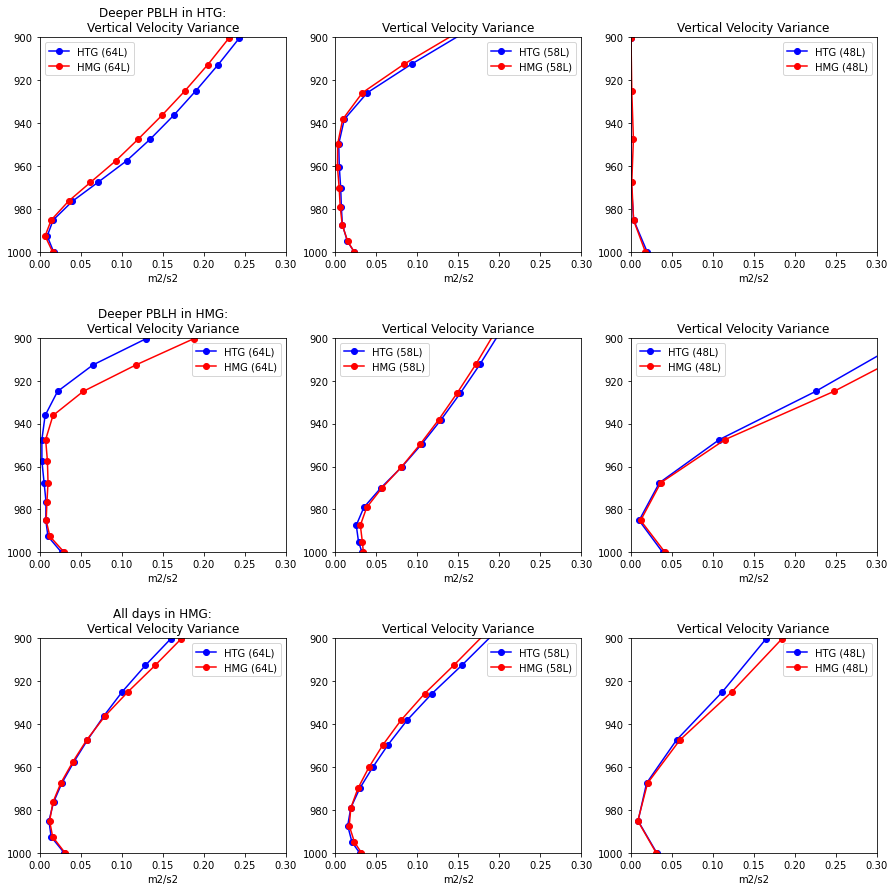

In [46]:
# Set variable of interest 
atmVar = 'WP2_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([0,0.3])
axs[1].set_xlim([0,0.3])
axs[2].set_xlim([0,0.3])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([0,0.3])
axs[4].set_xlim([0,0.3])
axs[5].set_xlim([0,0.3])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)


##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([0,0.3])
axs[7].set_xlim([0,0.3])
axs[8].set_xlim([0,0.3])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)



Text(0.5, 1.0, 'Zonal Velocity Variance')

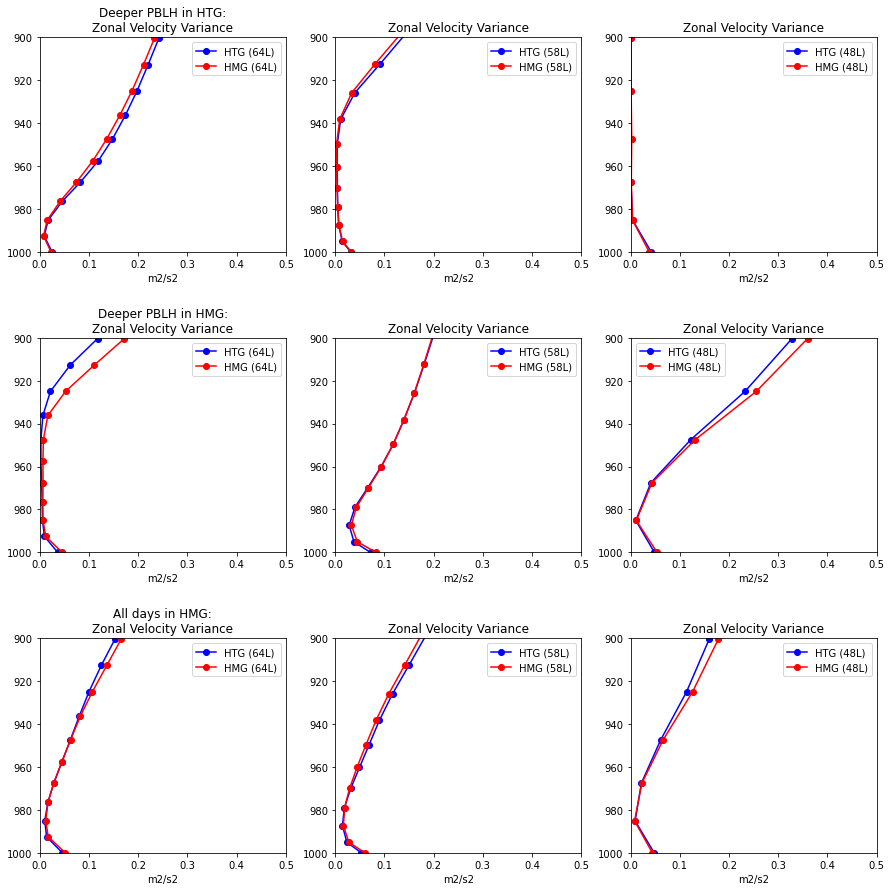

In [47]:
# Set variable of interest 
atmVar = 'UP2_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([0,0.5])
axs[1].set_xlim([0,0.5])
axs[2].set_xlim([0,0.5])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([0,0.5])
axs[4].set_xlim([0,0.5])
axs[5].set_xlim([0,0.5])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)

##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([0,0.5])
axs[7].set_xlim([0,0.5])
axs[8].set_xlim([0,0.5])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)


Text(0.5, 1.0, 'Temperature Variance')

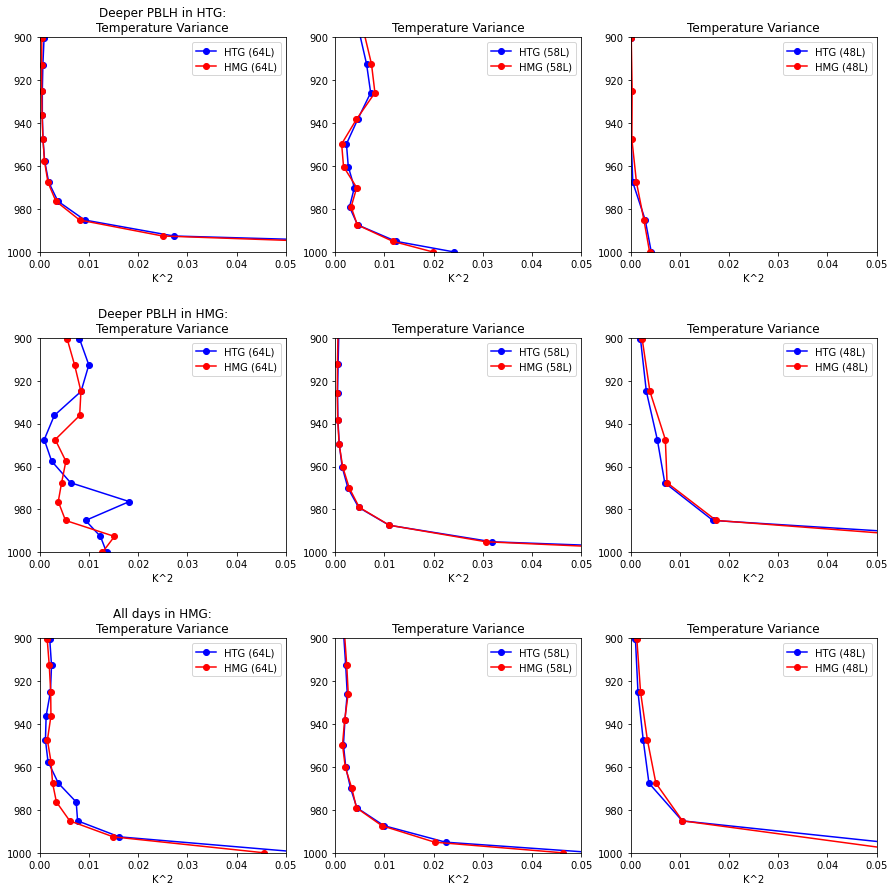

In [48]:
# Set variable of interest 
atmVar = 'THLP2_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([0,0.05])
axs[1].set_xlim([0,0.05])
axs[2].set_xlim([0,0.05])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([0,0.05])
axs[4].set_xlim([0,0.05])
axs[5].set_xlim([0,0.05])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)


##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([0,0.05])
axs[7].set_xlim([0,0.05])
axs[8].set_xlim([0,0.05])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)


Text(0.5, 1.0, 'Moisture Variance')

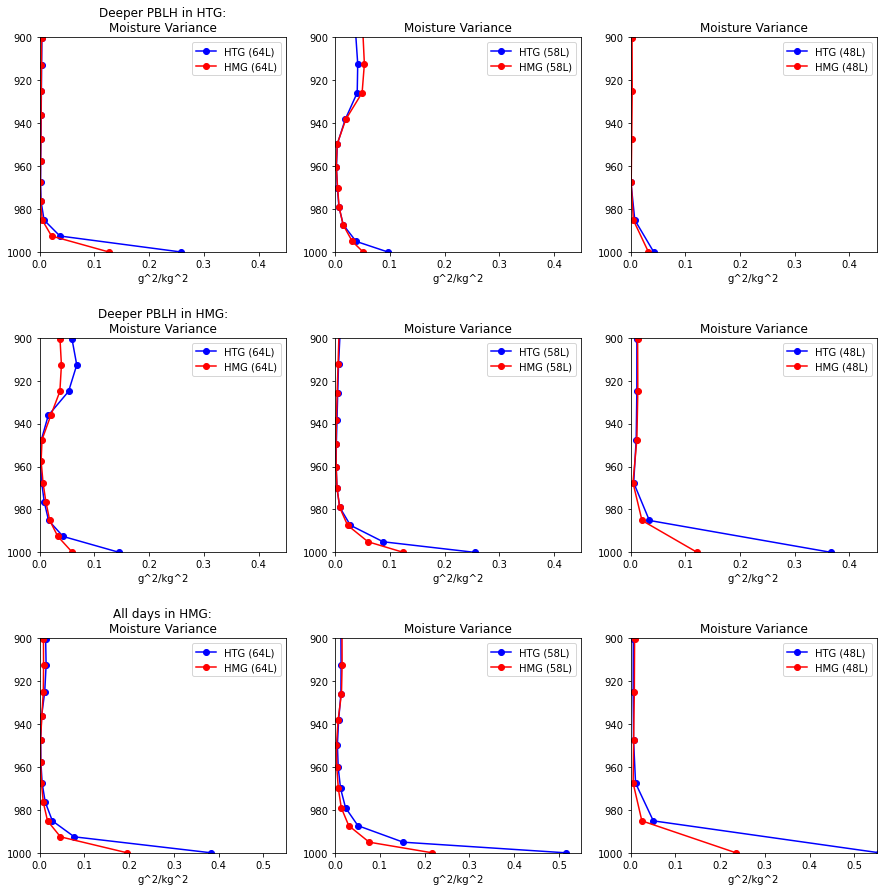

In [53]:
# Set variable of interest 
atmVar = 'RTP2_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([0,0.45])
axs[1].set_xlim([0,0.45])
axs[2].set_xlim([0,0.45])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([0,0.45])
axs[4].set_xlim([0,0.45])
axs[5].set_xlim([0,0.45])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)


##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([0,0.55])
axs[7].set_xlim([0,0.55])
axs[8].set_xlim([0,0.55])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)

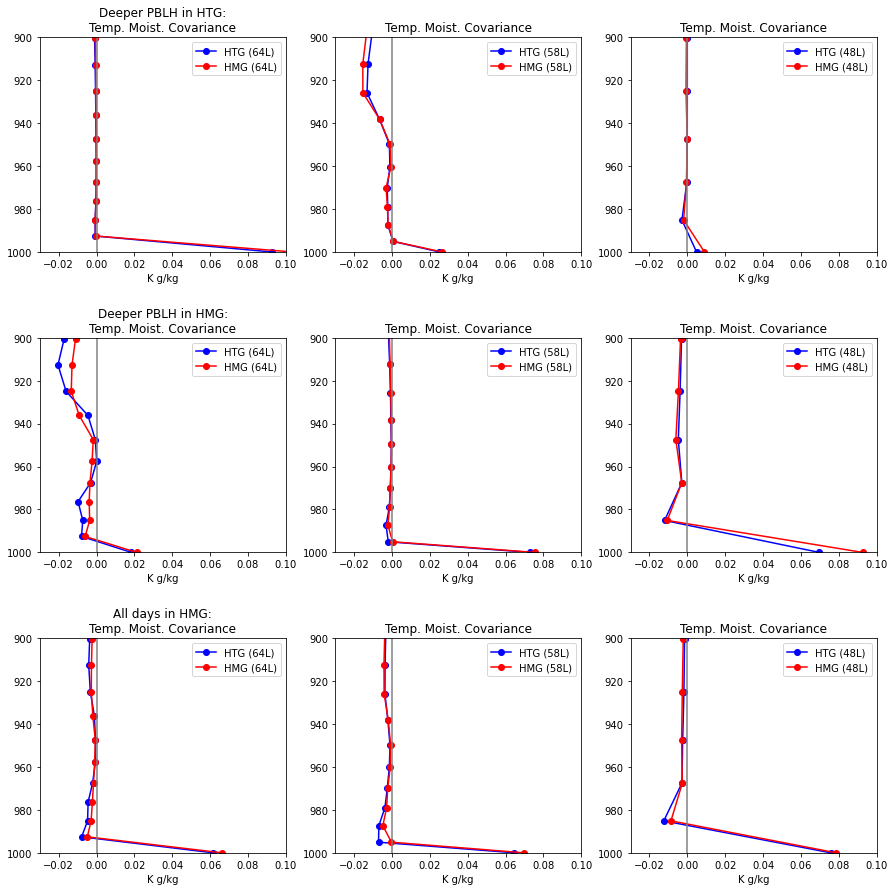

In [56]:
# Set variable of interest 
atmVar = 'RTPTHLP_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([-0.03,0.1])
axs[1].set_xlim([-0.03,0.1])
axs[2].set_xlim([-0.03,0.1])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)

axs[0].axvline(0,color='grey')
axs[1].axvline(0,color='grey')
axs[2].axvline(0,color='grey')

##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([-0.03,0.1])
axs[4].set_xlim([-0.03,0.1])
axs[5].set_xlim([-0.03,0.1])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)

axs[3].axvline(0,color='grey')
axs[4].axvline(0,color='grey')
axs[5].axvline(0,color='grey')


##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([-0.03,0.1])
axs[7].set_xlim([-0.03,0.1])
axs[8].set_xlim([-0.03,0.1])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)

axs[6].axvline(0,color='grey')
axs[7].axvline(0,color='grey')
axs[8].axvline(0,color='grey')



Text(0.5, 1.0, 'Moisture Flux')

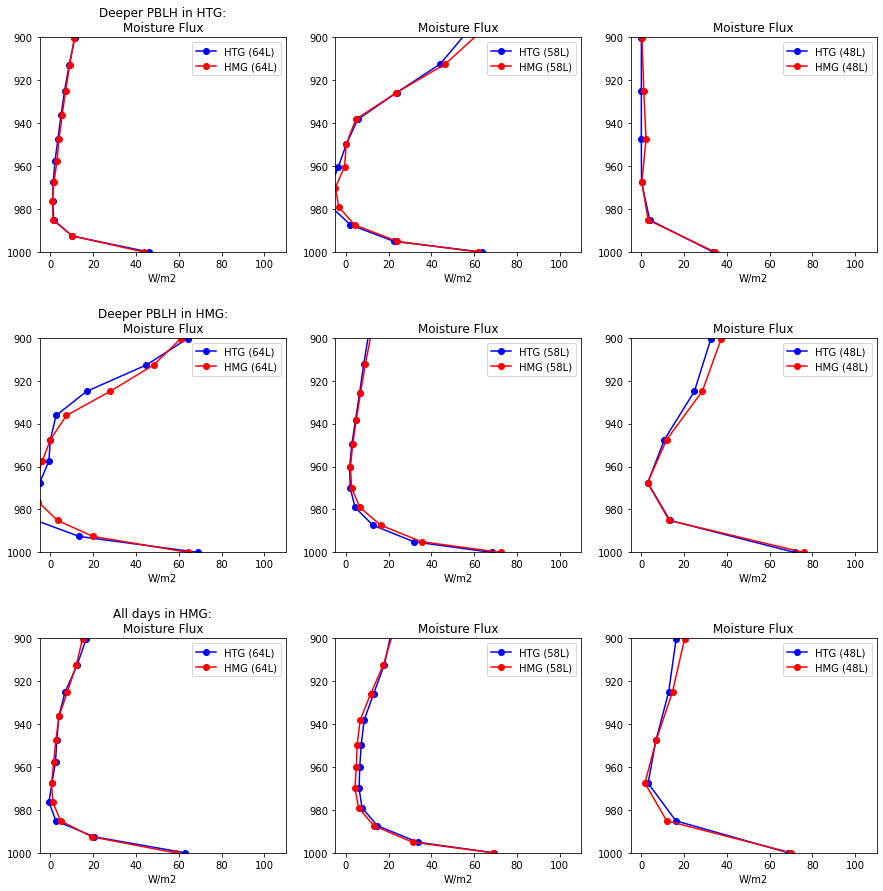

In [57]:
# Set variable of interest 
atmVar = 'WPRTP_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([-5,110])
axs[1].set_xlim([-5,110])
axs[2].set_xlim([-5,110])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([-5,110])
axs[4].set_xlim([-5,110])
axs[5].set_xlim([-5,110])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)


##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([-5,110])
axs[7].set_xlim([-5,110])
axs[8].set_xlim([-5,110])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)



Text(0.5, 1.0, 'Heat Flux')

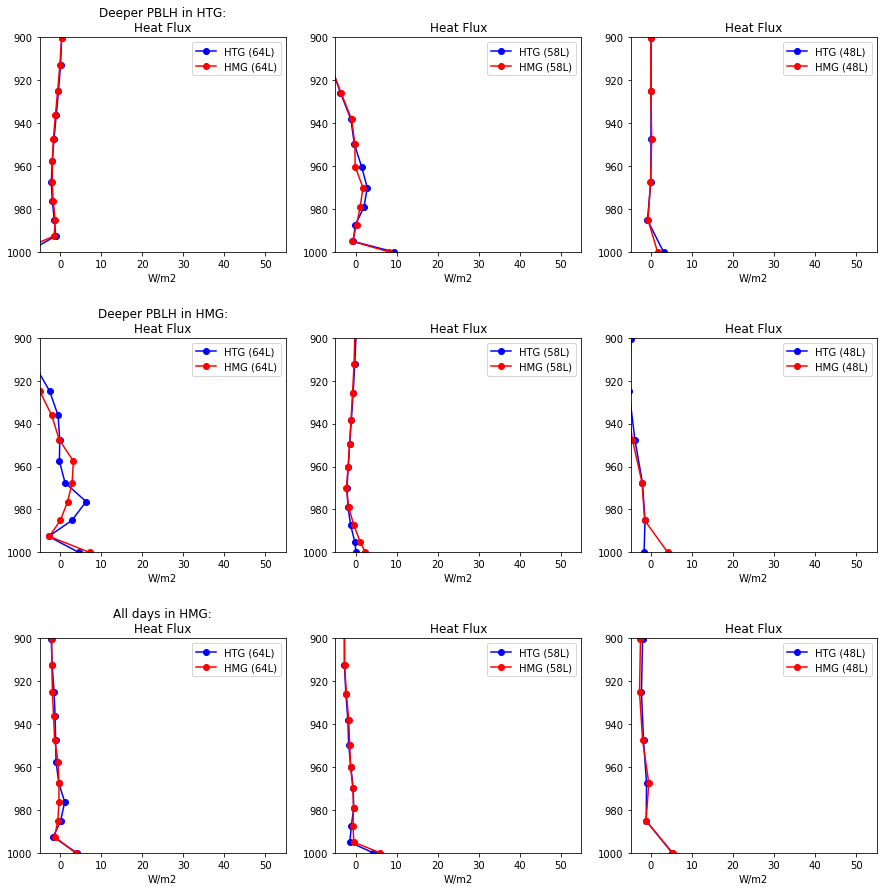

In [58]:
# Set variable of interest 
atmVar = 'WPTHLP_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([-5,55])
axs[1].set_xlim([-5,55])
axs[2].set_xlim([-5,55])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([-5,55])
axs[4].set_xlim([-5,55])
axs[5].set_xlim([-5,55])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)


##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.ilev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.ilev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.ilev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.ilev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.ilev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.ilev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([-5,55])
axs[7].set_xlim([-5,55])
axs[8].set_xlim([-5,55])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)


Text(0.5, 1.0, 'Buoyancy Flux')

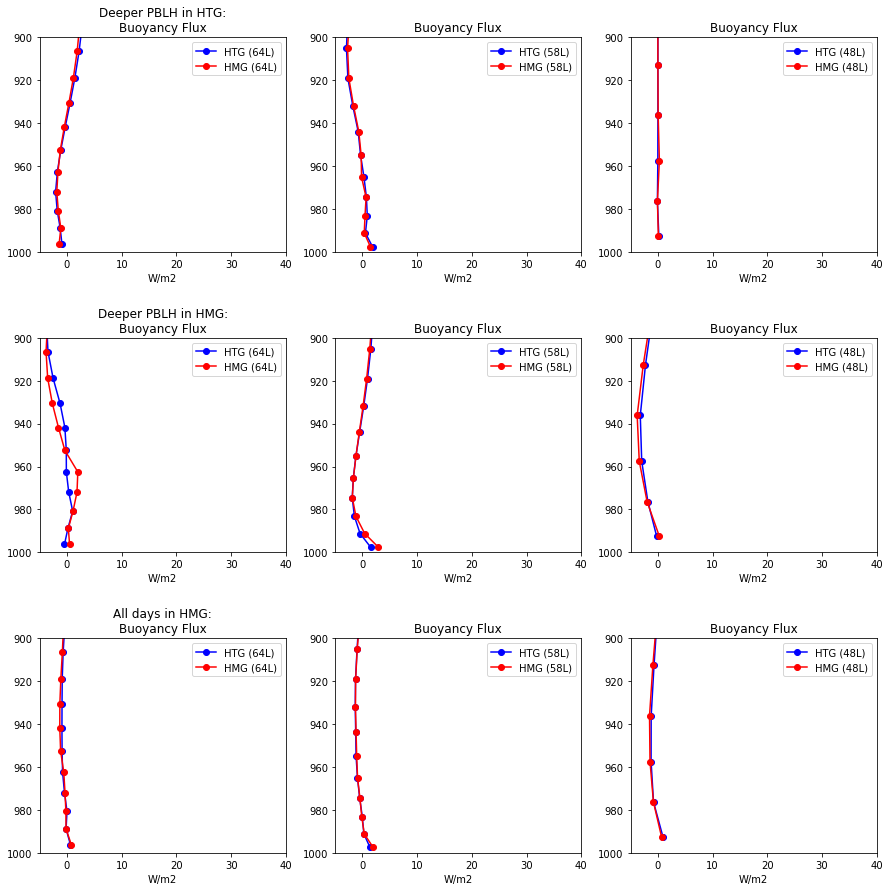

In [59]:
# Set variable of interest 
atmVar = 'WPTHVP_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([-5,40])
axs[1].set_xlim([-5,40])
axs[2].set_xlim([-5,40])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([-5,40])
axs[4].set_xlim([-5,40])
axs[5].set_xlim([-5,40])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)



##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([-5,40])
axs[7].set_xlim([-5,40])
axs[8].set_xlim([-5,40])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)

Text(0.5, 1.0, 'Water vapor tendency')

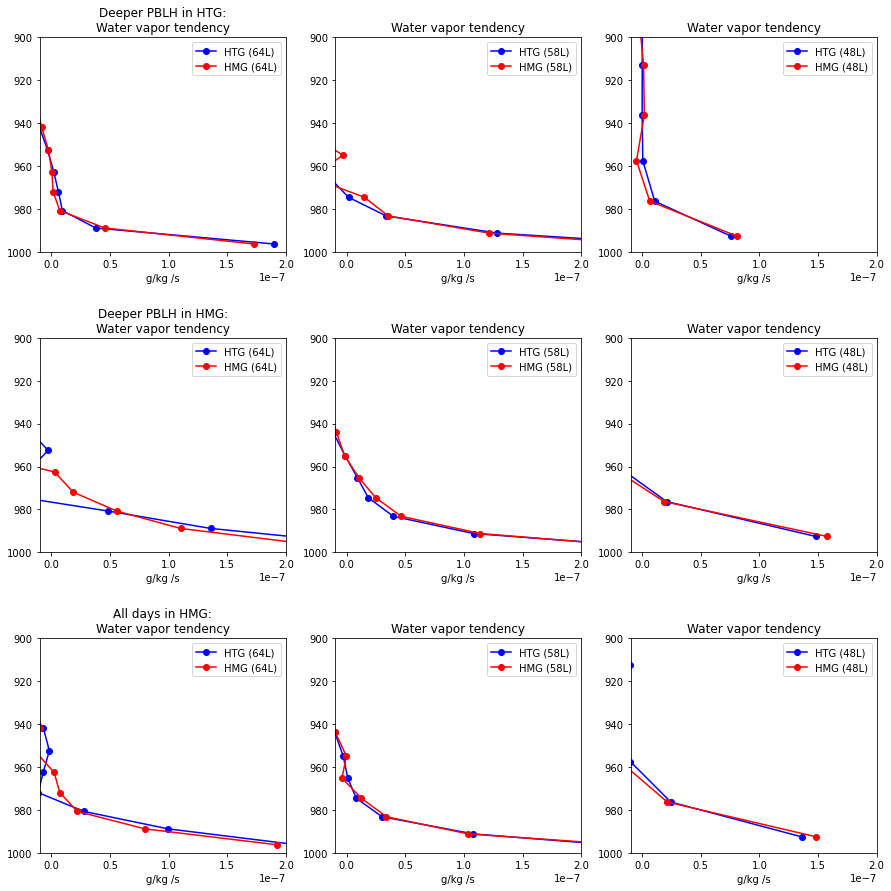

In [60]:
# Set variable of interest 
atmVar = 'RVMTEND_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([-1e-8,2e-7])
axs[1].set_xlim([-1e-8,2e-7])
axs[2].set_xlim([-1e-8,2e-7])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([-1e-8,2e-7])
axs[4].set_xlim([-1e-8,2e-7])
axs[5].set_xlim([-1e-8,2e-7])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)

##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([-1e-8,2e-7])
axs[7].set_xlim([-1e-8,2e-7])
axs[8].set_xlim([-1e-8,2e-7])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)



Text(0.5, 1.0, 'Static energy tendency')

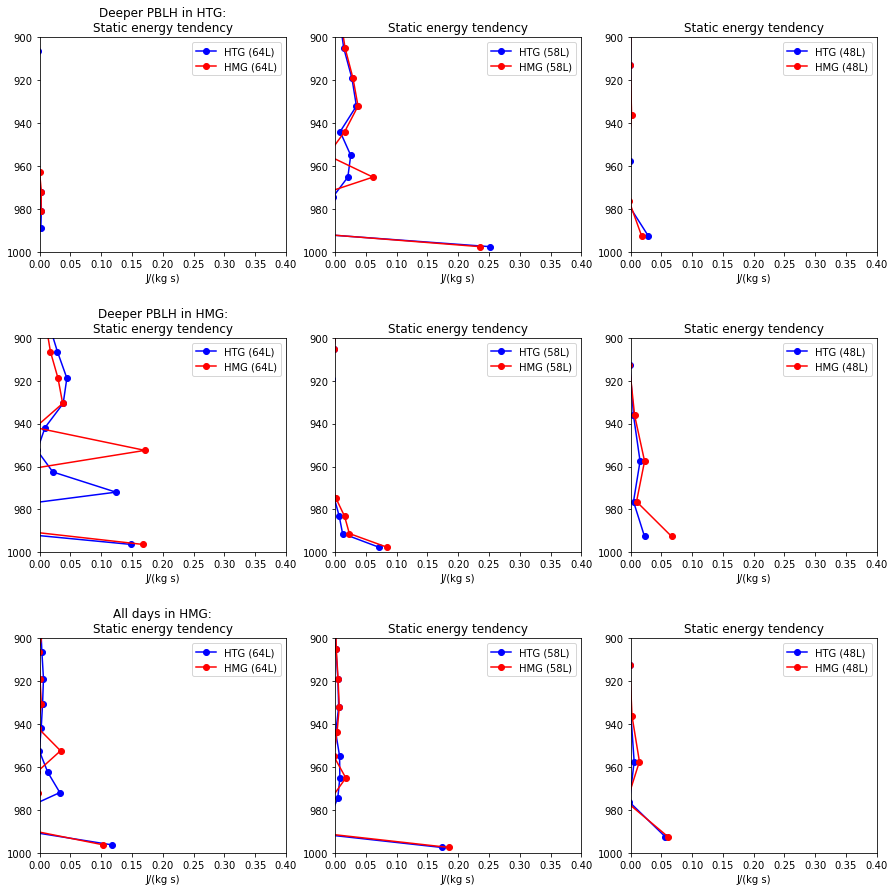

In [61]:
# Set variable of interest 
atmVar = 'STEND_CLUBB'

# Set up plots 
fig,axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.2, hspace=0.4)


##### PBL deeper in HTG #####
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHTG[atmVar].values), HTGdeeper_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[0].plot(np.squeeze(HTGdeeper_64_localMorningHMG[atmVar].values), HTGdeeper_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHTG[atmVar].values), HTGdeeper_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[1].plot(np.squeeze(HTGdeeper_58_localMorningHMG[atmVar].values), HTGdeeper_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHTG[atmVar].values), HTGdeeper_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[2].plot(np.squeeze(HTGdeeper_48_localMorningHMG[atmVar].values), HTGdeeper_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[0].set_xlim([0,0.4])
axs[1].set_xlim([0,0.4])
axs[2].set_xlim([0,0.4])

axs[0].set_ylim([900,1000])
axs[1].set_ylim([900,1000])
axs[2].set_ylim([900,1000])

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[1].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[2].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[0].set_title('Deeper PBLH in HTG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[1].set_title(HTGcamDS_all64[atmVar].long_name)
axs[2].set_title(HTGcamDS_all64[atmVar].long_name)


##### PBL deeper in HMG #####
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHTG[atmVar].values), HMGdeeper_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[3].plot(np.squeeze(HMGdeeper_64_localMorningHMG[atmVar].values), HMGdeeper_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHTG[atmVar].values), HMGdeeper_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[4].plot(np.squeeze(HMGdeeper_58_localMorningHMG[atmVar].values), HMGdeeper_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHTG[atmVar].values), HMGdeeper_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[5].plot(np.squeeze(HMGdeeper_48_localMorningHMG[atmVar].values), HMGdeeper_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[3].set_xlim([0,0.4])
axs[4].set_xlim([0,0.4])
axs[5].set_xlim([0,0.4])

axs[3].set_ylim([900,1000])
axs[4].set_ylim([900,1000])
axs[5].set_ylim([900,1000])

axs[3].invert_yaxis()
axs[4].invert_yaxis()
axs[5].invert_yaxis()

axs[3].legend()
axs[4].legend()
axs[5].legend()

axs[3].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[4].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[5].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[3].set_title('Deeper PBLH in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[4].set_title(HTGcamDS_all64[atmVar].long_name)
axs[5].set_title(HTGcamDS_all64[atmVar].long_name)

##### All days together #####
axs[6].plot(np.squeeze(allDays_64_localMorningHTG[atmVar].values), allDays_64_localMorningHTG.lev.values,
            'b-o', label='HTG (64L)')
axs[6].plot(np.squeeze(allDays_64_localMorningHMG[atmVar].values), allDays_64_localMorningHMG.lev.values,
            'r-o', label='HMG (64L)')


axs[7].plot(np.squeeze(allDays_58_localMorningHTG[atmVar].values), allDays_58_localMorningHTG.lev.values,
            'b-o', label='HTG (58L)')
axs[7].plot(np.squeeze(allDays_58_localMorningHMG[atmVar].values), allDays_58_localMorningHMG.lev.values,
            'r-o', label='HMG (58L)')


axs[8].plot(np.squeeze(allDays_48_localMorningHTG[atmVar].values), allDays_48_localMorningHTG.lev.values,
            'b-o', label='HTG (48L)')
axs[8].plot(np.squeeze(allDays_48_localMorningHMG[atmVar].values), allDays_48_localMorningHMG.lev.values,
            'r-o', label='HMG (48L)')

axs[6].set_xlim([0,0.4])
axs[7].set_xlim([0,0.4])
axs[8].set_xlim([0,0.4])

axs[6].set_ylim([900,1000])
axs[7].set_ylim([900,1000])
axs[8].set_ylim([900,1000])

axs[6].invert_yaxis()
axs[7].invert_yaxis()
axs[8].invert_yaxis()

axs[6].legend()
axs[7].legend()
axs[8].legend()

axs[6].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[7].set_xlabel(HTGcamDS_all64[atmVar].units)
axs[8].set_xlabel(HTGcamDS_all64[atmVar].units)

axs[6].set_title('All days in HMG:\n'+HTGcamDS_all64[atmVar].long_name)
axs[7].set_title(HTGcamDS_all64[atmVar].long_name)
axs[8].set_title(HTGcamDS_all64[atmVar].long_name)


In [198]:
# print('58 levels: \n', HTGcamDS_58.lev.values[-15:-1])
# print('64 levels: \n', HTGcamDS_64.lev.values[-15:-1])

print(' 64L        58L        48L')
print('-----      -----      -----')
for iLev in range(15):
    print('%6.2f     %6.2f     %6.2f' % (HTGcamDS_64.lev.values[-(iLev+1)], 
                                         HTGcamDS_58.lev.values[-(iLev+1)], 
                                         HTGcamDS_48.lev.values[-(iLev+1)]))


 64L        58L        48L
-----      -----      -----
996.28     997.53     992.56
988.83     991.21     976.33
980.72     983.19     957.49
971.93     974.51     936.20
962.51     965.12     912.64
952.46     954.94     887.02
941.82     943.92     859.53
930.58     931.99     820.86
918.80     919.07     766.91
906.48     905.09     712.04
893.67     889.94     662.95
880.37     873.54     617.25
866.63     855.78     574.70
852.44     836.56     535.08
833.11     815.74     498.19
